In [1]:
##################################################################### IMPORT #################################################################################
import pandas as pd
##############################################################################################################################################################



################################################################# HELPER FUNCTIONS ###########################################################################

# Function to find Implied Probability
def decimal_odds(odds):
    implied_probability = round((1 / odds) * 100 ,2)
    return implied_probability

def fractional_odds(numerator,denominator):
    implied_probability = round(denominator / (denominator + numerator) * 100,2)
    return implied_probability

def negative_american_odds(odds):
    implied_probability = round(odds / (odds + 100) * 100 ,2)
    return implied_probability

def positive_ameriacn_odds(odds):
    implied_probability = round((100 / (odds + 100)) * 100,2)
    return implied_probability


# Function to Find Value to get solid wager for long term profit
# NOTE: you can create function based on number of racer 
def predict(jockey,trainer,owner,program_number,horse_age,weather):
    value = (0.40 * jockey) + (0.30 * trainer) + (0.10 * owner) + (0.10 * program_number) + (0.05 * horse_age) + (0.05 * weather)
    return value

def final_predict(j1,j2,j3,j4,j5,j6,j7,t1,t2,t3,t4,t5,t6,t7,o1,o2,o3,o4,o5,o6,o7,a1,a2,a3,a4,a5,a6,a7,w1,w2,w3,w4,w5,w6,w7,p1,p2,p3,p4,p5,p6,p7):
    first = predict(j1,t1,o1,a1,w1,p1)
    second = predict(j2,t2,o2,a2,w2,p2)
    third = predict(j3,t3,o3,a3,w3,p3)
    fourth = predict(j4,t4,o4,a4,w4,p4)
    fifth = predict(j5,t5,o5,a5,w5,p5)
    sixth = predict(j6,t6,o6,a6,w6,p6)
    seven = predict(j7,t7,o7,a7,w7,p7)

    total = first + second + third + fourth + fifth + sixth + seven

    first_final = round((first / total) * 100,2)
    second_final = round((second / total) * 100,2)
    third_final = round((third / total) * 100,2)
    fourth_final = round((fourth / total) * 100,2)
    fifth_final = round((fifth / total) * 100,2)  
    sixth_final = round((sixth / total) * 100,2) 
    seven_final = round((seven / total) * 100,2) 

    return [[first_final], [second_final], [third_final], [fourth_final], [fifth_final], [sixth_final], [seven_final]]
##############################################################################################################################################################



##################################################################### LOAD ###################################################################################
ddf = pd.read_csv("/users/kushtrivedi/Desktop/NYRA/new_nyra_2019_complete.csv", low_memory=False)
ddf['race_date']  = pd.to_datetime(ddf["race_date"], format='%Y-%m-%d')
ddf['year'] = ddf["race_date"].dt.year
ddf['month'] = ddf["race_date"].dt.month
ddf['month_name'] = ddf["race_date"].dt.month_name()
ddf['day'] = ddf["race_date"].dt.day
ddf['day_name'] = ddf["race_date"].dt.day_name()
ddf['season'] = ddf['month_name'].map(
    { 
        'January' : 'Winter', 
        'February' : 'Winter', 
        'March' : 'Winter',
        'April' : 'Spring',
        'May' : 'Spring',
        'June' : 'Spring',
        'July' : 'Summer',
        'August' : 'Summer',
        'September' : 'Summer',
        'October' : 'Autumn',
        'November' : 'Autumn',
        'December' : 'Autumn'
    }
)
display(basicSummary(ddf))
##############################################################################################################################################################



#################################################################### JOCKEY ##################################################################################
jockey = pd.DataFrame({'Frequency': ddf.groupby(['race_date','jockey'])['jockey'].nunique()}).reset_index()
jockey_count = pd.DataFrame({'Total_Race_Jockey' : jockey.jockey.value_counts()}).reset_index()
jockey_count.rename(columns={'index': 'jockey'}, inplace=True)
jockey_rating = pd.DataFrame({'Frequency': ddf.groupby(['jockey','rating'])['rating'].nunique()}).reset_index()
jockey_sum = pd.DataFrame({'jockey_rating':jockey_rating.groupby('jockey')['rating'].median().round().astype(int)}).reset_index()
display(basicSummary(jockey_sum))
##############################################################################################################################################################



##################################################################### HORSE ##################################################################################
horse = pd.DataFrame({'Frequency': ddf.groupby(['race_date','horse_name'])['horse_name'].nunique()}).reset_index()
horse_count = pd.DataFrame({'Total_Race_Horse' : horse.horse_name.value_counts()}).reset_index()
horse_count.rename(columns={'index': 'horse_name'}, inplace=True)
horse_rating = pd.DataFrame({'Frequency': ddf.groupby(['horse_name','rating'])['rating'].nunique()}).reset_index()
horse_sum = pd.DataFrame({'horse_rating':horse_rating.groupby('horse_name')['rating'].median().round().astype(int)}).reset_index()
display(basicSummary(horse_sum))
##############################################################################################################################################################



This Datset consists of  29 Features & 5228430 Samples.           



Feature       Data Type  Num of Nulls  Num of Unique  \
0              track_id          object             0              3   
1             race_date  datetime64[ns]             0            217   
2           race_number           int64             0             13   
3        program_number          object             0             20   
4          trakus_index           int64             0           1062   
5              latitude         float64             0        5224784   
6             longitude         float64             0        5224799   
7           course_type          object             0              5   
8       track_condition          object             0              7   
9       run_up_distance           int64             0            127   
10            race_type          object             0             12   
11                purse           int64             0             70   
12            post_time           int64             0            360   
13       weight_carried           int64             0             35   
14               jockey          object             0            178   
15        american_odds           int64             0            656   
16      finishing_place           int64             0             14   
17           horse_name          object             0           4638   
18             furlongs         float64             0             20   
19             new_odds          object             0            617   
20  implied_probability         float64             0            517   
21  average_temperature         float64             0            100   
22               rating           int64             0             10   
23                 year           int64             0              1   
24                month           int64             0             12   
25           month_name          object             0             12   
26                  day           int64             0             31   
27             day_name          object             0              7   
28               season          object             0              4   

                First Value             Second Value              Third Value  \
0                       AQU                      AQU                      AQU   
1       2019-01-01 00:00:00      2019-01-01 00:00:00      2019-01-01 00:00:00   
2                         9                        9                        9   
3                       6                        6                        6     
4                        72                       73                       74   
5                 40.672902                40.672946                 40.67299   
6                -73.827607               -73.827587               -73.827568   
7                         D                        D                        D   
8                       GD                       GD                       GD    
9                        48                       48                       48   
10                      CLM                      CLM                      CLM   
11                    25000                    25000                    25000   
12                      420                      420                      420   
13                      120                      120                      120   
14  Andre Shivnarine Worrie  Andre Shivnarine Worrie  Andre Shivnarine Worrie   
15                     2090                     2090                     2090   
16                        8                        8                        8   
17          Crafty Concorde          Crafty Concorde          Crafty Concorde   
18                      6.0                      6.0                      6.0   
19                   20.9-1                   20.9-1                   20.9-1   
20                     4.57                     4.57                     4.57   
21                     50.0                     50.0                     


This Datset consists of  2 Features & 178 Samples.           



Feature Data Type  Num of Nulls  Num of Unique   First Value  \
0         jockey    object             0            178  Abner Adorno   
1  jockey_rating     int64             0             10             4   

     Second Value  Third Value   Fourth Value   Fifth Value  
0  Adam Beschizza  Adam Bowman  Adrian Flores  Alex Cintron  
1               6            7              7             9


This Datset consists of  2 Features & 4638 Samples.           



Feature Data Type  Num of Nulls  Num of Unique       First Value  \
0    horse_name    object             0           4638  A Bridge too Far   
1  horse_rating     int64             0             10                10   

        Second Value      Third Value     Fourth Value     Fifth Value  
0  A Different Style  A Dixie Twister  A Freud of Mama  A I Initiative  
1                  6                8                8               4

In [2]:
temp_ddf = ddf[['race_date','track_id','month','day','race_number','race_type','jockey','horse_name']]

In [3]:
new_temp = temp_ddf.drop_duplicates().reset_index(drop=True)

In [4]:
total_runners = pd.DataFrame({'total_runners': new_temp.groupby(['race_date','track_id','month','day','race_number','race_type'])['race_type'].size()}).reset_index()

In [5]:
new_ddf_1 = pd.merge(ddf,horse_sum,on=['horse_name'])

In [6]:
new_ddf_2 = pd.merge(new_ddf_1,jockey_sum,on=['jockey'])

In [7]:
new_ddf = pd.merge(new_ddf_2,total_runners,on=['race_date', 'track_id', 'month', 'day', 'race_number', 'race_type'])

In [8]:
display(basicSummary(new_ddf))


This Datset consists of  32 Features & 5228430 Samples.           



Feature       Data Type  Num of Nulls  Num of Unique  \
0              track_id          object             0              3   
1             race_date  datetime64[ns]             0            217   
2           race_number           int64             0             13   
3        program_number          object             0             20   
4          trakus_index           int64             0           1062   
5              latitude         float64             0        5224784   
6             longitude         float64             0        5224799   
7           course_type          object             0              5   
8       track_condition          object             0              7   
9       run_up_distance           int64             0            127   
10            race_type          object             0             12   
11                purse           int64             0             70   
12            post_time           int64             0            360   
13       weight_carried           int64             0             35   
14               jockey          object             0            178   
15        american_odds           int64             0            656   
16      finishing_place           int64             0             14   
17           horse_name          object             0           4638   
18             furlongs         float64             0             20   
19             new_odds          object             0            617   
20  implied_probability         float64             0            517   
21  average_temperature         float64             0            100   
22               rating           int64             0             10   
23                 year           int64             0              1   
24                month           int64             0             12   
25           month_name          object             0             12   
26                  day           int64             0             31   
27             day_name          object             0              7   
28               season          object             0              4   
29         horse_rating           int64             0             10   
30        jockey_rating           int64             0             10   
31        total_runners           int64             0             12   

                First Value             Second Value              Third Value  \
0                       AQU                      AQU                      AQU   
1       2019-01-01 00:00:00      2019-01-01 00:00:00      2019-01-01 00:00:00   
2                         9                        9                        9   
3                       6                        6                        6     
4                        72                       73                       74   
5                 40.672902                40.672946                 40.67299   
6                -73.827607               -73.827587               -73.827568   
7                         D                        D                        D   
8                       GD                       GD                       GD    
9                        48                       48                       48   
10                      CLM                      CLM                      CLM   
11                    25000                    25000                    25000   
12                      420                      420                      420   
13                      120                      120                      120   
14  Andre Shivnarine Worrie  Andre Shivnarine Worrie  Andre Shivnarine Worrie   
15                     2090                     2090                     2090   
16                        8                        8                        8   
17          Crafty Concorde          Crafty Concorde          Crafty Concorde   
18                      6.0                      6.0                      6.0   
19                 

In [9]:
new_ddf.drop(new_ddf[new_ddf['finishing_place'] == 13].index, inplace = True)
new_ddf.drop(new_ddf[new_ddf['finishing_place'] == 14].index, inplace = True)

In [10]:
first_place = new_ddf[(new_ddf.finishing_place == 1)].reset_index(drop=True)
first_place_df = first_place[[
    'track_id','jockey','race_type','furlongs',
    'course_type','track_condition','american_odds','rating','finishing_place'
]]
first_place_df_final = first_place_df.drop_duplicates().reset_index(drop=True)

In [11]:
first_place_df_final

track_id              jockey race_type  furlongs course_type  \
0         AQU  Benjamin Hernandez       CLM       6.0           D   
1         AQU        Rajiv Maragh       ALW       7.0           D   
2         AQU     Reylu Gutierrez       MCL       6.0           D   
3         AQU        Jose Lezcano       MCL       6.0           D   
4         AQU     Reylu Gutierrez       MCL       6.0           D   
...       ...                 ...       ...       ...         ...   
1990      SAR       Thomas Garner       STK      16.5           M   
1991      SAR         Barry Foley       STK      16.5           M   
1992      SAR    William McCarthy       ALW      16.5           M   
1993      BEL    William McCarthy       STK      18.0           M   
1994      SAR       Thomas Garner       STK      16.5           M   

     track_condition  american_odds  rating  finishing_place  
0                GD             110      10                1  
1                MY             305      10                1  
2                MY             340      10                1  
3                FT              75      10                1  
4                MY             105      10                1  
...              ...            ...     ...              ...  
1990             FM             335      10                1  
1991             FM             940      10                1  
1992             FM             600      10                1  
1993             FM              55      10                1  
1994             GD             325      10                1  

[1995 rows x 9 columns]

In [12]:
first_place_df_final.jockey.value_counts()

Manuel Franco       210
Jose Lezcano        207
Junior Alvarado     161
Irad Ortiz Jr.      151
Jose L. Ortiz       136
                   ... 
Jevian Toledo         1
Alex Cintron          1
Jamie P. Spencer      1
Tyler Conner          1
Barry Foley           1
Name: jockey, Length: 67, dtype: int64

In [13]:
first_place_df_final.jockey.value_counts()

Manuel Franco       210
Jose Lezcano        207
Junior Alvarado     161
Irad Ortiz Jr.      151
Jose L. Ortiz       136
                   ... 
Jevian Toledo         1
Alex Cintron          1
Jamie P. Spencer      1
Tyler Conner          1
Barry Foley           1
Name: jockey, Length: 67, dtype: int64

In [14]:
three_runners_df = new_ddf[(new_ddf.total_runners == 3)].reset_index(drop=True)
four_runners_df = new_ddf[(new_ddf.total_runners == 4)].reset_index(drop=True)
five_runners_df = new_ddf[(new_ddf.total_runners == 5)].reset_index(drop=True)
six_runners_df = new_ddf[(new_ddf.total_runners == 6)].reset_index(drop=True)
seven_runners_df = new_ddf[(new_ddf.total_runners == 7)].reset_index(drop=True)
eight_runners_df = new_ddf[(new_ddf.total_runners == 8)].reset_index(drop=True)
nine_runners_df = new_ddf[(new_ddf.total_runners == 9)].reset_index(drop=True)
ten_runners_df = new_ddf[(new_ddf.total_runners == 10)].reset_index(drop=True)
eleven_runners_df = new_ddf[(new_ddf.total_runners == 11)].reset_index(drop=True)
twelve_runners_df = new_ddf[(new_ddf.total_runners == 12)].reset_index(drop=True)
# thirteen_runners_df = new_ddf[(new_ddf.total_runners == 13)].reset_index(drop=True)
# fourteen_runners_df = new_ddf[(new_ddf.total_runners == 14)].reset_index(drop=True)

In [15]:
# winter_ddf = ddf[ddf.season=='Winter']
# spring_ddf = ddf[ddf.season=='Spring']
# summer_ddf = ddf[ddf.season=='Summer']
# autumn_ddf = ddf[ddf.season=='Autumn']

In [16]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.lineplot(y=ddf.average_temperature,
#              x=ddf.day,hue=ddf.month_name,
#              data=ddf)
# plt.show()

# sns.lineplot(y=winter_ddf.average_temperature,
#              x=winter_ddf.day,hue=winter_ddf.month_name,
#              data=winter_ddf)
# plt.show()

# sns.lineplot(y=spring_ddf.average_temperature,
#              x=spring_ddf.day,hue=spring_ddf.month_name,
#              data=spring_ddf)
# plt.show()

# sns.lineplot(y=summer_ddf.average_temperature,
#              x=summer_ddf.day,hue=summer_ddf.month_name,
#              data=summer_ddf)
# plt.show()

# sns.lineplot(y=autumn_ddf.average_temperature,
#              x=autumn_ddf.day,hue=autumn_ddf.month_name,
#              data=autumn_ddf)
# plt.show()

In [2]:

# fractional_odds(9,2)
# negative_american_odds(500)
# positive_ameriacn_odds(2090)

In [18]:
# from fractions import Fraction
# def american_odds_to_fractional(odds):
#     decimal_value = odds / 100
#     fractional_value = Fraction(decimal_value).limit_denominator().as_integer_ratio()
    
#     return fractional_value

# american_odds_to_fractional(2090)

In [19]:
# from fractions import Fraction
# def money_line_calculator(bet,odds):
#     decimal_value = odds / 100
#     fractional_value = [Fraction(decimal_value).limit_denominator()]
#     implied_probability = round(100 / (odds + 100) * 100,2)
#     profit = (fractional_value[0] * bet) / fractional_value[1]
#     payout = (decimal_value * bet) + bet
#     return decimal_value, fractional_value, implied_probability, profit, payout

# money_line_calculator(10,400)

In [20]:
# Abner_Adorno = 4
# Adam_Beschizza = 5
# Adam_Bowman = 7
# Adrian_Flores = 7
# Alex_Cintron = 9

# A_Bridge_too_Far = 10
# A_Different_Style = 6
# A_Dixie_Twister = 8
# A_Freud_of_Mama = 8
# A_I_Initiative = 4

# def predict(jockey,horse):
#     value = (0.5 * jockey) + (0.5 * horse)
#     return value


# A_Bridge_too_Far = predict(Abner_Adorno,A_Bridge_too_Far)
# A_Different_Style = predict(Adam_Beschizza,A_Different_Style)
# A_Dixie_Twister = predict(Adam_Bowman,A_Dixie_Twister)
# A_Freud_of_Mama = predict(Adrian_Flores,A_Freud_of_Mama)
# A_I_Initiative = predict(Alex_Cintron,A_I_Initiative)

# total = A_Bridge_too_Far + A_Different_Style + A_Dixie_Twister + A_Freud_of_Mama + A_I_Initiative

# first = round((A_Bridge_too_Far / total) * 100,2)
# second = round((A_Different_Style / total) * 100,2)
# third = round((A_Dixie_Twister / total) * 100,2)
# fourth = round((A_Freud_of_Mama / total) * 100,2)
# fifth = round((A_I_Initiative / total) * 100,2)

# print('\033[1;31;32m',first,  '%\033[0;0m chance of winning - \033[1;30;34mA Bridge too Far')
# print('\033[1;31;32m',second, '%\033[0;0m chance of winning - \033[1;30;34mA Different Style')
# print('\033[1;31;32m',third,  '%\033[0;0m chance of winning - \033[1;30;34mA Dixie Twister')
# print('\033[1;31;32m',fourth, '%\033[0;0m chance of winning - \033[1;30;34mA Freud of Mama')
# print('\033[1;31;32m',fifth,  '%\033[0;0m chance of winning - \033[1;30;34mA I Initiative')

In [21]:
# final_predict(4,5,7,7,9,10,6,8,8,4)

In [22]:
# best_jockey = jockey_sum.to_csv('jockey.csv')
# best_horse = horse_sum.to_csv('horse.csv')

In [23]:
three_runners_df_for_model = three_runners_df[[
    'track_id','jockey','race_type','furlongs',
    'course_type','track_condition','american_odds','rating','finishing_place'
]]
new_three_runners_df_for_model = three_runners_df_for_model.drop_duplicates().reset_index(drop=True)

four_runners_df_for_model = four_runners_df[[
    'track_id','jockey','race_type','furlongs',
    'course_type','track_condition','american_odds','rating','finishing_place'
]]
new_four_runners_df_for_model = four_runners_df_for_model.drop_duplicates().reset_index(drop=True)

five_runners_df_for_model = five_runners_df[[
    'track_id','jockey','race_type','furlongs',
    'course_type','track_condition','american_odds','rating','finishing_place'
]]
new_five_runners_df_for_model = five_runners_df_for_model.drop_duplicates().reset_index(drop=True)


six_runners_df_for_model = six_runners_df[[
    'track_id','jockey','race_type','furlongs',
    'course_type','track_condition','american_odds','rating','finishing_place'
]]
new_six_runners_df_for_model = six_runners_df_for_model.drop_duplicates().reset_index(drop=True)


seven_runners_df_for_model = six_runners_df[[
    'track_id','jockey','race_type','furlongs',
    'course_type','track_condition','american_odds','rating','finishing_place'
]]
new_seven_runners_df_for_model = seven_runners_df_for_model.drop_duplicates().reset_index(drop=True)


eight_runners_df_for_model = eight_runners_df[[
    'track_id','jockey','race_type','furlongs',
    'course_type','track_condition','american_odds','rating','finishing_place'
]]
new_eight_runners_df_for_model = eight_runners_df_for_model.drop_duplicates().reset_index(drop=True)


nine_runners_df_for_model = nine_runners_df[[
    'track_id','jockey','race_type','furlongs',
    'course_type','track_condition','american_odds','rating','finishing_place'
]]
new_nine_runners_df_for_model = nine_runners_df_for_model.drop_duplicates().reset_index(drop=True)


ten_runners_df_for_model = ten_runners_df[[
    'track_id','jockey','race_type','furlongs',
    'course_type','track_condition','american_odds','rating','finishing_place'
]]
new_ten_runners_df_for_model = ten_runners_df_for_model.drop_duplicates().reset_index(drop=True)


whole_df_for_model = new_ddf[[
   'track_id','jockey','race_type','furlongs',
    'course_type','track_condition','american_odds','rating','finishing_place'
]]
new_whole_df_for_model = whole_df_for_model.drop_duplicates().reset_index(drop=True)

new_whole_df_for_model.drop(new_whole_df_for_model[new_whole_df_for_model['finishing_place'] == 13].index, inplace = True)
new_whole_df_for_model.drop(new_whole_df_for_model[new_whole_df_for_model['finishing_place'] == 14].index, inplace = True)

In [24]:
new_five_runners_df_for_model.head(10)

track_id                   jockey race_type  furlongs course_type  \
0      SAR  Andre Shivnarine Worrie       AOC       9.0           D   
1      SAR             Joel Rosario       AOC       9.0           D   
2      SAR                Luis Saez       AOC       9.0           D   
3      SAR            Jose L. Ortiz       AOC       9.0           D   
4      SAR             Edwin Rivera       AOC       9.0           D   
5      AQU  Andre Shivnarine Worrie       CLM       7.0           D   
6      AQU            Manuel Franco       CLM       7.0           D   
7      AQU            Luis R. Reyes       CLM       7.0           D   
8      AQU       Benjamin Hernandez       CLM       7.0           D   
9      AQU              Dylan Davis       CLM       7.0           D   

  track_condition  american_odds  rating  finishing_place  
0             FT            1400       7                4  
1             FT             135       8                3  
2             FT             155       6                5  
3             FT             680       9                2  
4             FT             430      10                1  
5             SY            1250       6                5  
6             SY              35      10                1  
7             SY             560       7                4  
8             SY             590       9                2  
9             SY             870       8                3

#############################################################################
                                CatBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  CatBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  99.94 %


 Confusion Matrix: 


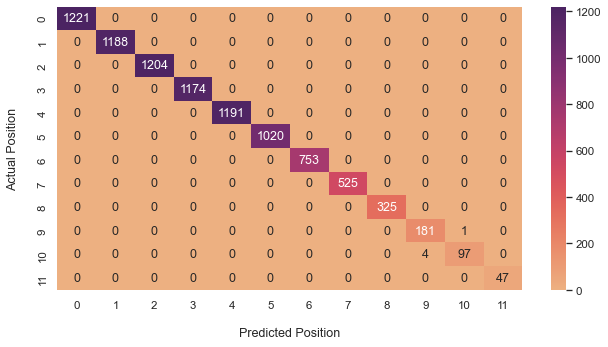


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1221
           2       1.00      1.00      1.00      1188
           3       1.00      1.00      1.00      1204
           4       1.00      1.00      1.00      1174
           5       1.00      1.00      1.00      1191
           6       1.00      1.00      1.00      1020
           7       1.00      1.00      1.00       753
           8       1.00      1.00      1.00       525
           9       1.00      1.00      1.00       325
          10       0.98      0.99      0.99       182
          11       0.99      0.96      0.97       101
          12       1.00      1.00      1.00        47

    accuracy                           1.00      8931
   macro avg       1.00      1.00      1.00      8931
weighted avg       1.00      1.00      1.00      8931

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




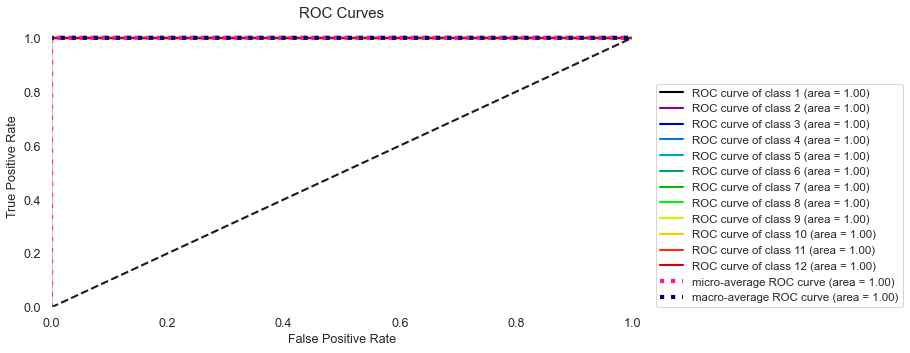

*=*=*=*=*=*=*=*=  CatBoost Validation  Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  98.39 %


 Confusion Matrix: 


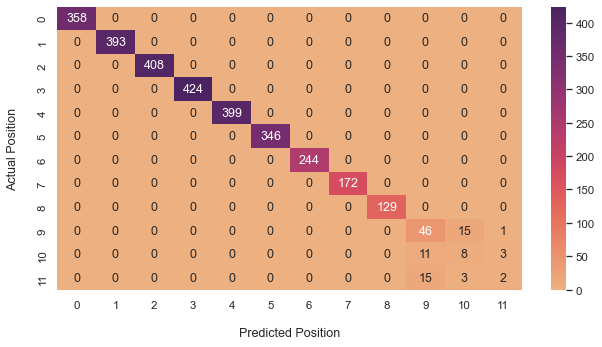


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       358
           2       1.00      1.00      1.00       393
           3       1.00      1.00      1.00       408
           4       1.00      1.00      1.00       424
           5       1.00      1.00      1.00       399
           6       1.00      1.00      1.00       346
           7       1.00      1.00      1.00       244
           8       1.00      1.00      1.00       172
           9       1.00      1.00      1.00       129
          10       0.64      0.74      0.69        62
          11       0.31      0.36      0.33        22
          12       0.33      0.10      0.15        20

    accuracy                           0.98      2977
   macro avg       0.86      0.85      0.85      2977
weighted avg       0.98      0.98      0.98      2977

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




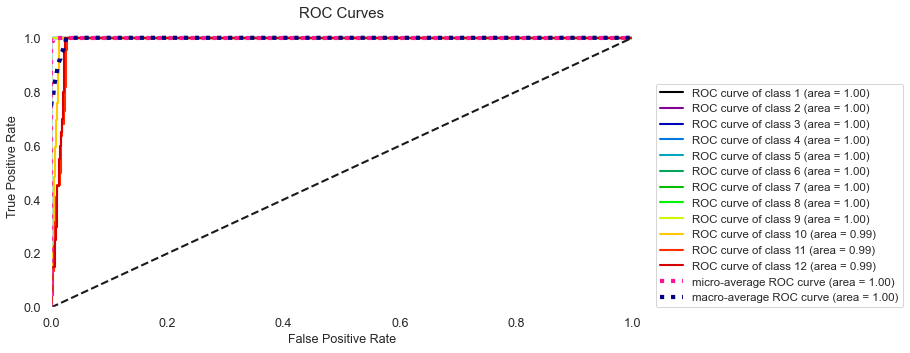

*=*=*=*=*=*=*=*=*=  CatBoost Test Dataset Evaluation:  *=*=*=*=*=*=*=*=*=*= 

==>  Accuracy:  97.85 %


 Confusion Matrix: 


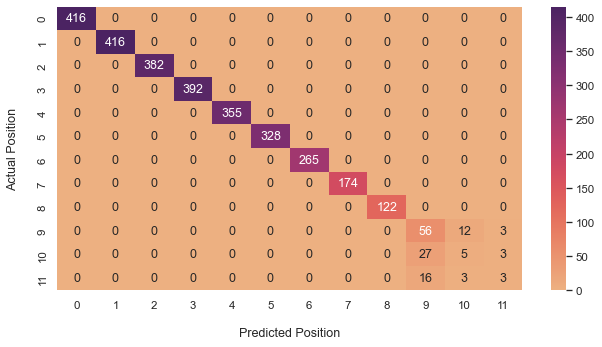


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       416
           2       1.00      1.00      1.00       416
           3       1.00      1.00      1.00       382
           4       1.00      1.00      1.00       392
           5       1.00      1.00      1.00       355
           6       1.00      1.00      1.00       328
           7       1.00      1.00      1.00       265
           8       1.00      1.00      1.00       174
           9       1.00      1.00      1.00       122
          10       0.57      0.79      0.66        71
          11       0.25      0.14      0.18        35
          12       0.33      0.14      0.19        22

    accuracy                           0.98      2978
   macro avg       0.85      0.84      0.84      2978
weighted avg       0.98      0.98      0.98      2978

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




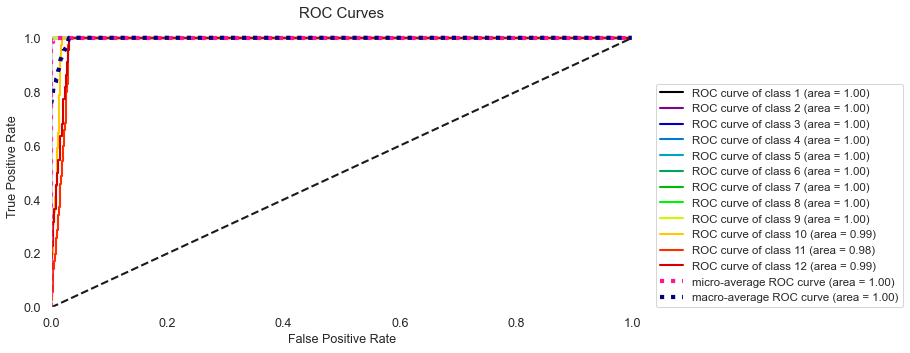

#############################################################################
                             Gradient Boosting Classifier                             
#############################################################################

*=*=*=*=*=*=  Gradient Boosting Training  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  99.25 %


 Confusion Matrix: 


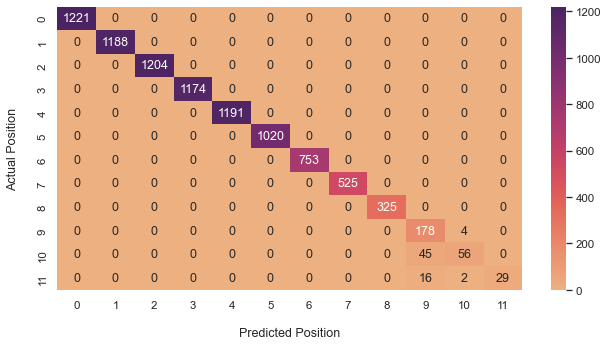


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1221
           2       1.00      1.00      1.00      1188
           3       1.00      1.00      1.00      1204
           4       1.00      1.00      1.00      1174
           5       1.00      1.00      1.00      1191
           6       1.00      1.00      1.00      1020
           7       1.00      1.00      1.00       753
           8       1.00      1.00      1.00       525
           9       1.00      1.00      1.00       325
          10       0.74      0.98      0.85       182
          11       0.90      0.55      0.69       101
          12       1.00      0.62      0.76        47

    accuracy                           0.99      8931
   macro avg       0.97      0.93      0.94      8931
weighted avg       0.99      0.99      0.99      8931

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




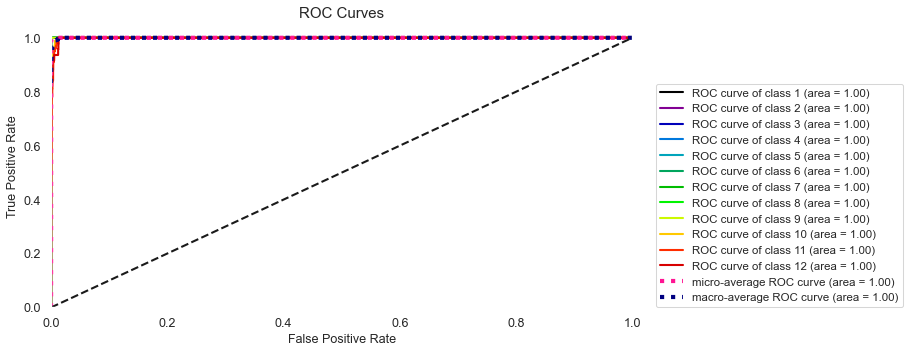

*=*=*=*=*= Gradient Boosting  Validation  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  98.25 %


 Confusion Matrix: 


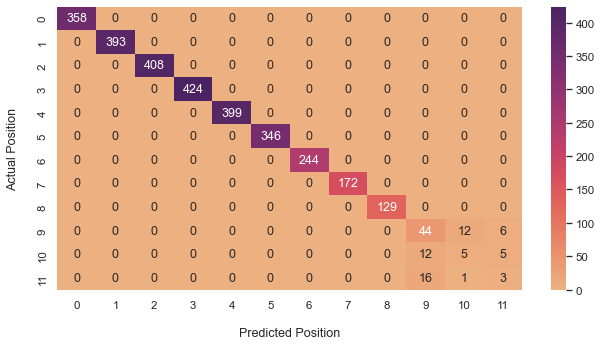


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       358
           2       1.00      1.00      1.00       393
           3       1.00      1.00      1.00       408
           4       1.00      1.00      1.00       424
           5       1.00      1.00      1.00       399
           6       1.00      1.00      1.00       346
           7       1.00      1.00      1.00       244
           8       1.00      1.00      1.00       172
           9       1.00      1.00      1.00       129
          10       0.61      0.71      0.66        62
          11       0.28      0.23      0.25        22
          12       0.21      0.15      0.18        20

    accuracy                           0.98      2977
   macro avg       0.84      0.84      0.84      2977
weighted avg       0.98      0.98      0.98      2977

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




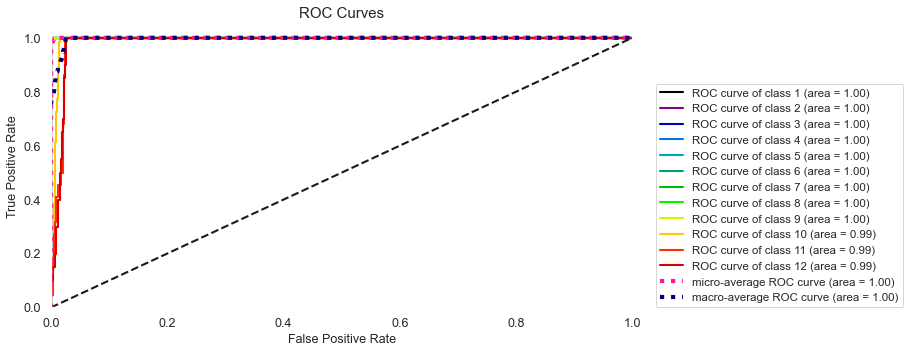

*=*=*=*=*=*=  Gradient Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  98.02 %


 Confusion Matrix: 


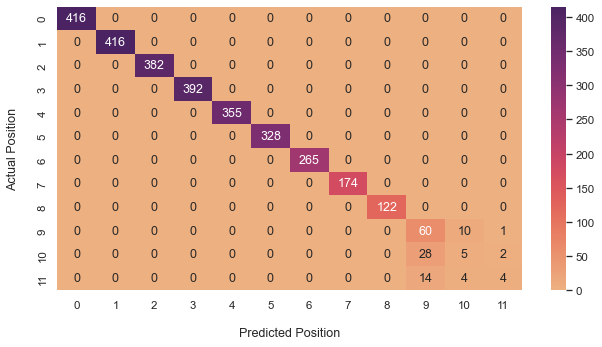


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       416
           2       1.00      1.00      1.00       416
           3       1.00      1.00      1.00       382
           4       1.00      1.00      1.00       392
           5       1.00      1.00      1.00       355
           6       1.00      1.00      1.00       328
           7       1.00      1.00      1.00       265
           8       1.00      1.00      1.00       174
           9       1.00      1.00      1.00       122
          10       0.59      0.85      0.69        71
          11       0.26      0.14      0.19        35
          12       0.57      0.18      0.28        22

    accuracy                           0.98      2978
   macro avg       0.87      0.85      0.85      2978
weighted avg       0.98      0.98      0.98      2978

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




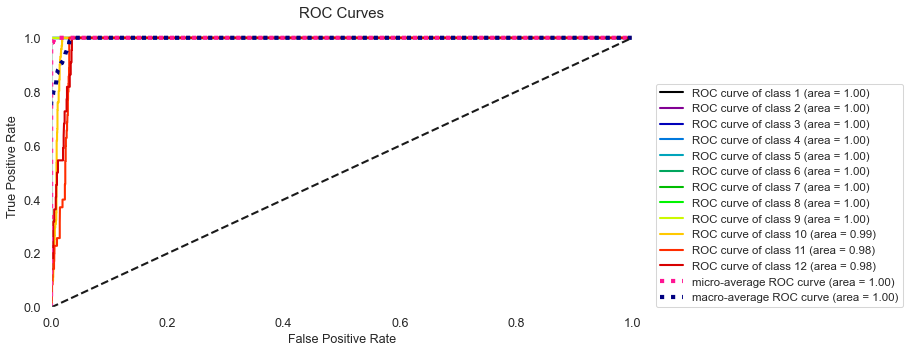

#############################################################################
                                XGBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  XGBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  98.84 %


 Confusion Matrix: 


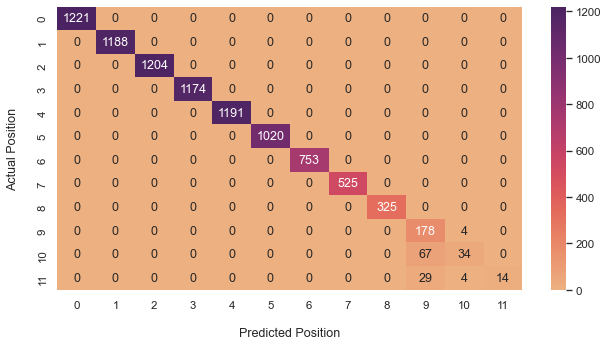


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1221
           2       1.00      1.00      1.00      1188
           3       1.00      1.00      1.00      1204
           4       1.00      1.00      1.00      1174
           5       1.00      1.00      1.00      1191
           6       1.00      1.00      1.00      1020
           7       1.00      1.00      1.00       753
           8       1.00      1.00      1.00       525
           9       1.00      1.00      1.00       325
          10       0.65      0.98      0.78       182
          11       0.81      0.34      0.48       101
          12       1.00      0.30      0.46        47

    accuracy                           0.99      8931
   macro avg       0.95      0.88      0.89      8931
weighted avg       0.99      0.99      0.99      8931

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




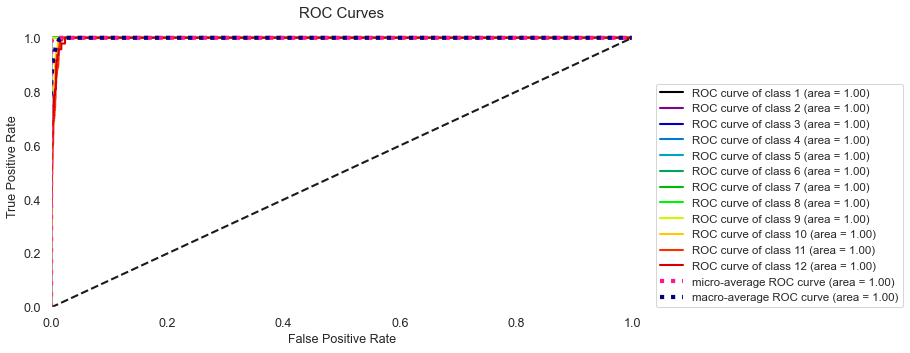

*=*=*=*=*=*=*=*=  XGBoost Validation  Dataset  Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  98.45 %


 Confusion Matrix: 


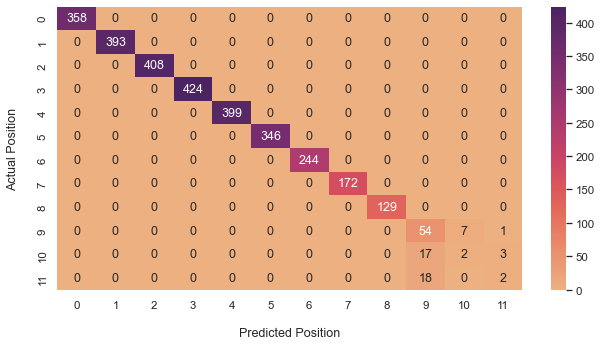


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       358
           2       1.00      1.00      1.00       393
           3       1.00      1.00      1.00       408
           4       1.00      1.00      1.00       424
           5       1.00      1.00      1.00       399
           6       1.00      1.00      1.00       346
           7       1.00      1.00      1.00       244
           8       1.00      1.00      1.00       172
           9       1.00      1.00      1.00       129
          10       0.61      0.87      0.72        62
          11       0.22      0.09      0.13        22
          12       0.33      0.10      0.15        20

    accuracy                           0.98      2977
   macro avg       0.85      0.84      0.83      2977
weighted avg       0.98      0.98      0.98      2977

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




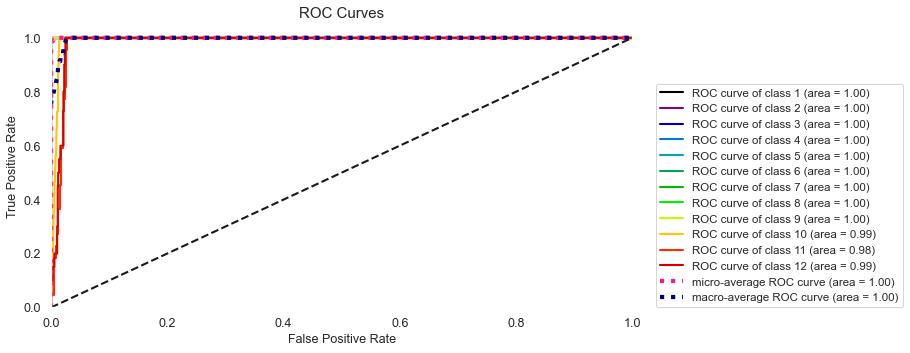

*=*=*=*=*=*=*=*=  XGBoost Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*= 

==>  Accuracy:  98.05 %


 Confusion Matrix: 


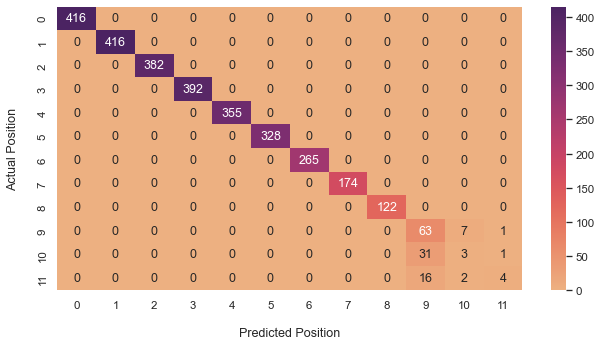


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       416
           2       1.00      1.00      1.00       416
           3       1.00      1.00      1.00       382
           4       1.00      1.00      1.00       392
           5       1.00      1.00      1.00       355
           6       1.00      1.00      1.00       328
           7       1.00      1.00      1.00       265
           8       1.00      1.00      1.00       174
           9       1.00      1.00      1.00       122
          10       0.57      0.89      0.70        71
          11       0.25      0.09      0.13        35
          12       0.67      0.18      0.29        22

    accuracy                           0.98      2978
   macro avg       0.87      0.85      0.84      2978
weighted avg       0.98      0.98      0.98      2978

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




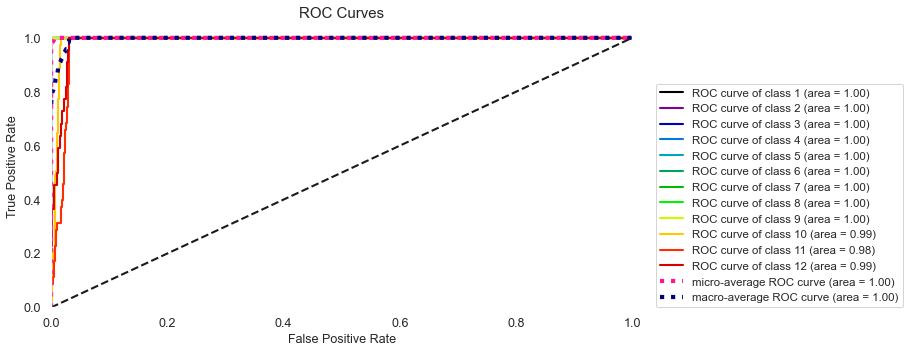

In [25]:
# Import Library
import numpy as np
import seaborn as sns
import scikitplot as skplt
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder 
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
 
from xgboost import XGBClassifier    
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, classification_report

plt.rcParams['figure.dpi'] = 75
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})


# Helper Function
def print_evaluate(true, predicted):
    acc = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    print(
        colored("==>",attrs=["bold"]),
        colored(" Accuracy: ","green",attrs=["bold"]),
        colored("{0:.2f} %".format(np.mean(acc)*100),attrs=['bold']) 
    )
    print(colored("\n\n Confusion Matrix: ","blue",attrs=["bold",'reverse', 'blink']))
    ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap='flare')
    ax.set_xlabel('\nPredicted Position')
    ax.set_ylabel('Actual Position\n')
    plt.show()
    print(colored("\n Classification Report: ","red",attrs=["bold",'reverse', 'blink']),'\n')
    print(colored(report,'yellow',attrs=['bold']))
    print(colored(38 *'*=',attrs=['bold']))
    # print('ROC-AUC score:',roc_auc_score(true, predicted))
    print('\n')
    
    

# Separate target from predictors
X = new_whole_df_for_model.drop(['finishing_place'], axis=1)
y = new_whole_df_for_model['finishing_place']


# Divide data into training, validation, and Testing subsets
# In the first step we will split the data in training and remaining dataset
X_train_full, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid_full, X_test_full, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [
    cname for cname in X_train_full.columns
    if X_train_full[cname].dtype == "object"
]


# Select numerical columns
numerical_cols = [
    cname for cname in X_train_full.columns 
    if X_train_full[cname].dtype in ['int64', 'float64']
]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


# Handle Imbalance OverSampling
smote = SMOTE(random_state=1)


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Preprocessing for numerical data
numerical_transformer = Pipeline([
    ('std_scaler', PowerTransformer())
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


##############################################################################################################################################################
#                                                                        CatBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
cat_boost = CatBoostClassifier(silent=True)


# Create Pipeline
cat_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('over',smote),
    ('model', cat_boost)
])

# Preprocessing of training data, fit model 
cat_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_cat_boost = cat_boost_pipeline.predict(X_train)
train_proba_cat_boost = cat_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_cat_boost = cat_boost_pipeline.predict(X_valid)
valid_proba_cat_boost = cat_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_cat_boost = cat_boost_pipeline.predict(X_test)
test_proba_cat_boost = cat_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m CatBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_cat_boost)
train_roc = roc_auc_score(y_train, train_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Validation  Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_cat_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(9 *'*=',attrs=['bold']),
    colored(' CatBoost Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(10 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_cat_boost)
test_roc = roc_auc_score(y_test, test_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                Gradient Boosting Classifier Classifier
##############################################################################################################################################################

# Simple Model Creation
gradient_boosting = GradientBoostingClassifier()


# Create Pipeline
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('over',smote),
    ('model', gradient_boosting)
])

# Preprocessing of training data, fit model 
gradient_boosting_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_train)
train_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_valid)
valid_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)
test_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(27*' ', "\033[1;30;34m Gradient Boosting Classifier \033[0;0m", 27*" ")
print(77*'#')
print('')

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_gradient_boosting)
train_roc = roc_auc_score(y_train, train_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(5 *'*=',attrs=['bold']),
    colored('Gradient Boosting  Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_gradient_boosting)
valid_roc = roc_auc_score(y_valid, valid_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_gradient_boosting)
test_roc = roc_auc_score(y_test, test_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                     XGBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
xg_boost = XGBClassifier()


# Create Pipeline
xg_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('over',smote),
    ('model', xg_boost)
])

# Preprocessing of training data, fit model 
xg_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_xg_boost = xg_boost_pipeline.predict(X_train)
train_proba_xg_boost = xg_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_xg_boost = xg_boost_pipeline.predict(X_valid)
valid_proba_xg_boost = xg_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_xg_boost = xg_boost_pipeline.predict(X_test)
test_proba_xg_boost = xg_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m XGBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_xg_boost)
train_roc = roc_auc_score(y_train, train_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_xg_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(7 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_xg_boost)
test_roc = roc_auc_score(y_test, test_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

#############################################################################
                                CatBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  CatBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


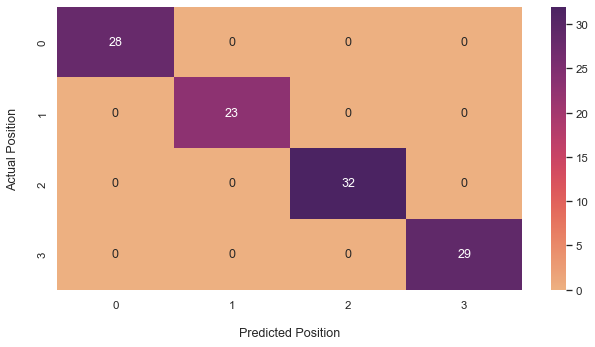


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        29

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




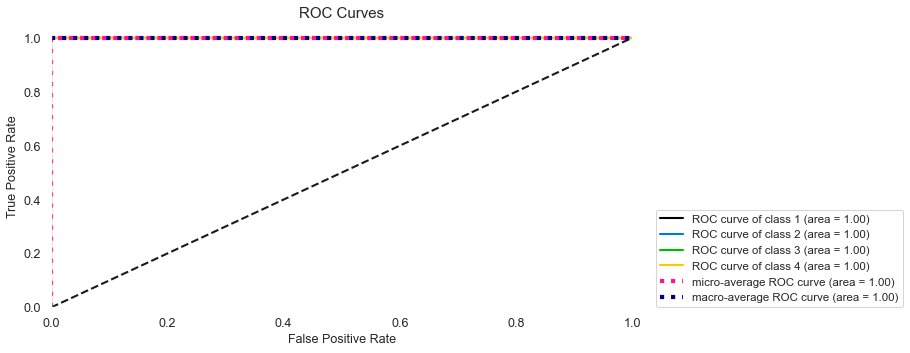

*=*=*=*=*=*=*=*=  CatBoost Validation  Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


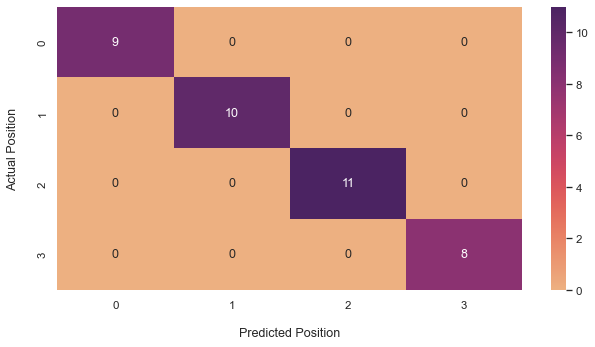


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




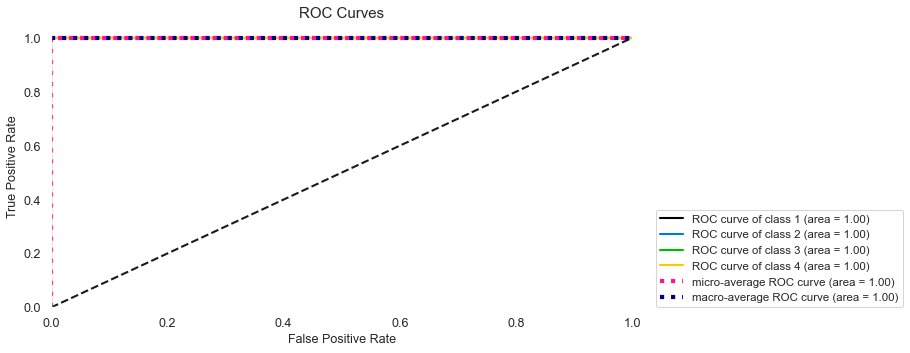

*=*=*=*=*=*=*=*=*=  CatBoost Test Dataset Evaluation:  *=*=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


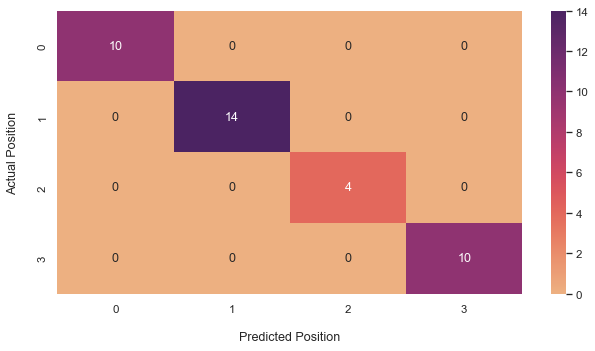


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




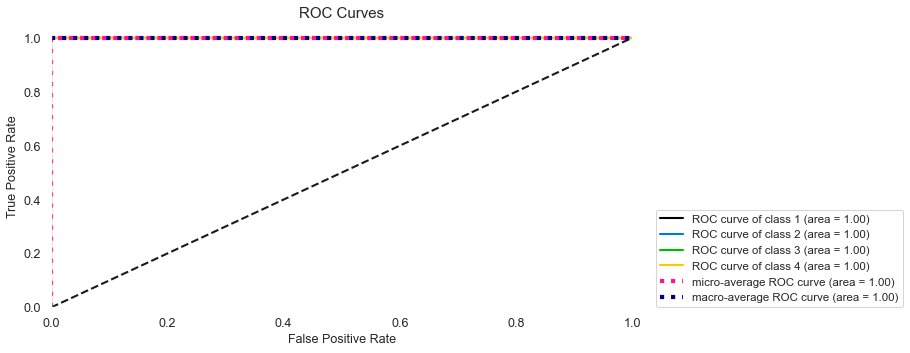

#############################################################################
                             Gradient Boosting Classifier                             
#############################################################################

*=*=*=*=*=*=  Gradient Boosting Training  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


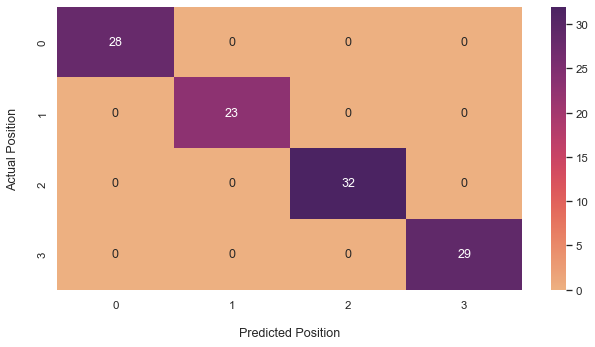


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        29

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




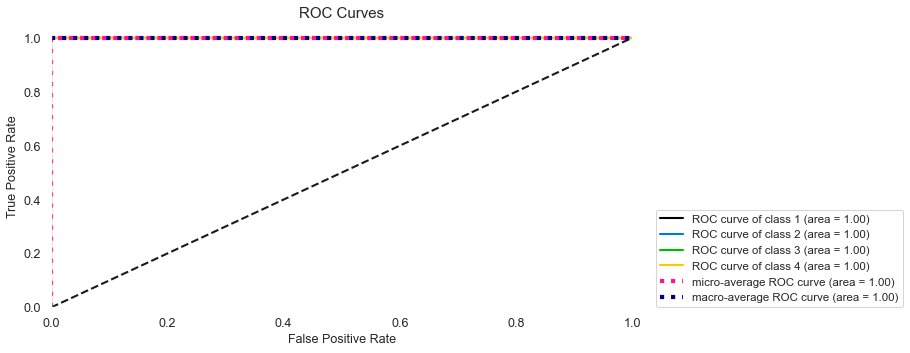

*=*=*=*=*= Gradient Boosting  Validation  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


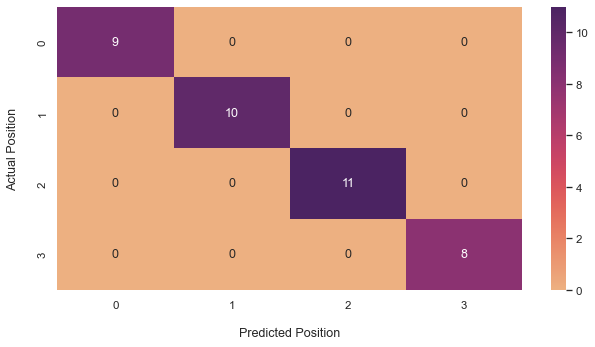


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




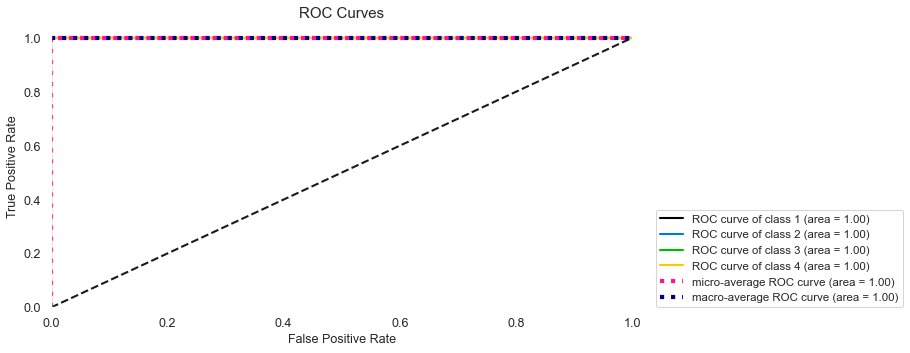

*=*=*=*=*=*=  Gradient Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


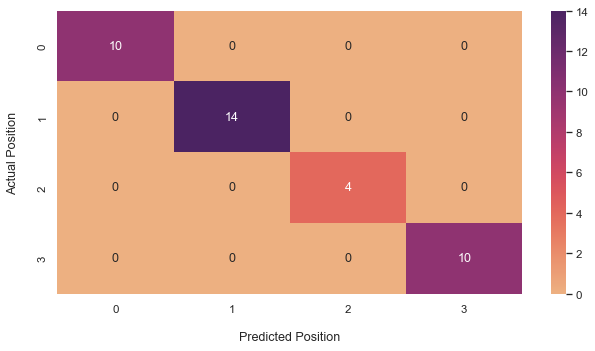


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




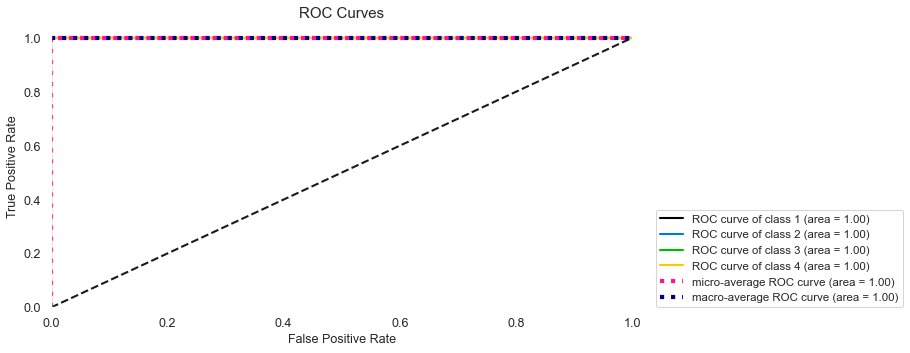

#############################################################################
                                XGBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  XGBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


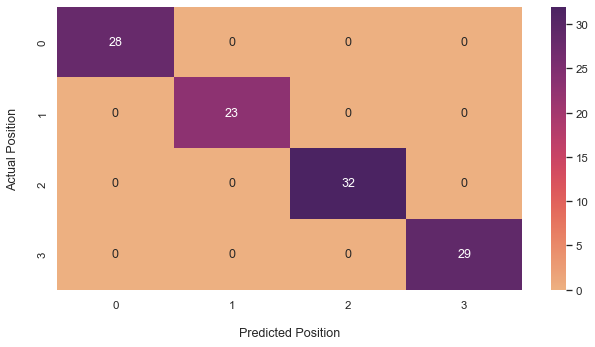


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        29

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




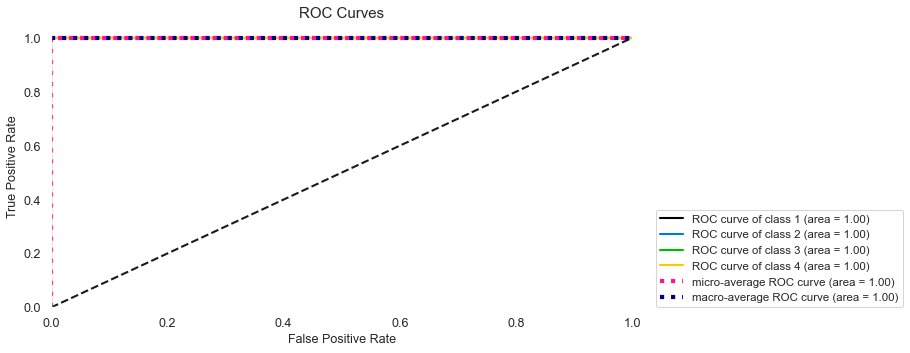

*=*=*=*=*=*=*=*=  XGBoost Validation  Dataset  Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


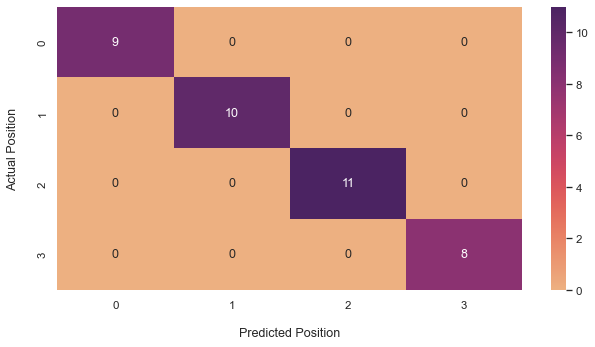


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




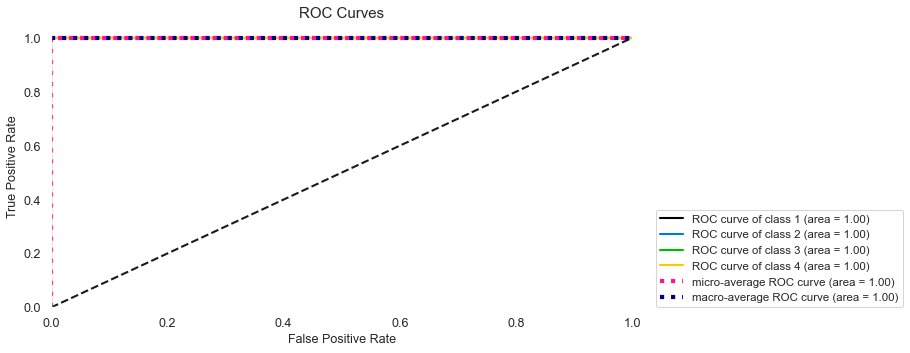

*=*=*=*=*=*=*=*=  XGBoost Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


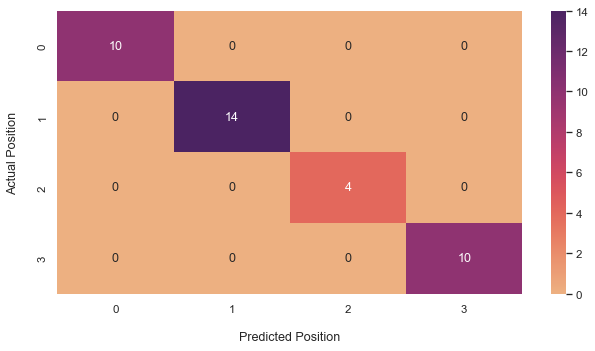


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




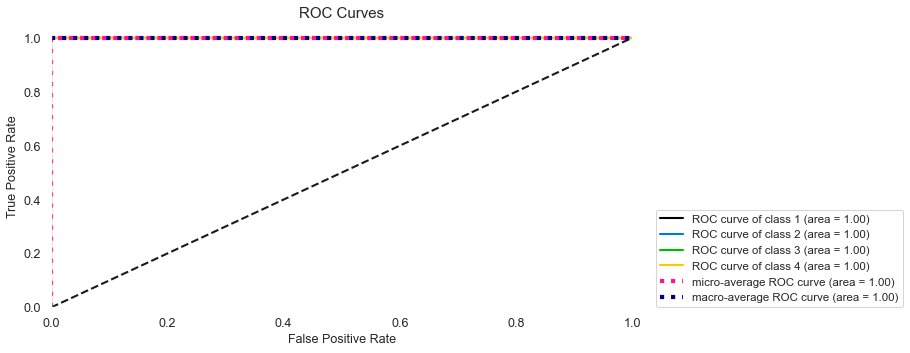

In [26]:
# Import Library
import numpy as np
import seaborn as sns
import scikitplot as skplt
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder 
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
 
from xgboost import XGBClassifier    
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, classification_report

plt.rcParams['figure.dpi'] = 75
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})


# Helper Function
def print_evaluate(true, predicted):
    acc = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    print(
        colored("==>",attrs=["bold"]),
        colored(" Accuracy: ","green",attrs=["bold"]),
        colored("{0:.2f} %".format(np.mean(acc)*100),attrs=['bold']) 
    )
    print(colored("\n\n Confusion Matrix: ","blue",attrs=["bold",'reverse', 'blink']))
    ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap='flare')
    ax.set_xlabel('\nPredicted Position')
    ax.set_ylabel('Actual Position\n')
    plt.show()
    print(colored("\n Classification Report: ","red",attrs=["bold",'reverse', 'blink']),'\n')
    print(colored(report,'yellow',attrs=['bold']))
    print(colored(38 *'*=',attrs=['bold']))
    # print('ROC-AUC score:',roc_auc_score(true, predicted))
    print('\n')
    
    

# Separate target from predictors
X = new_four_runners_df_for_model.drop(['finishing_place'], axis=1)
y = new_four_runners_df_for_model['finishing_place']


# Divide data into training, validation, and Testing subsets
# In the first step we will split the data in training and remaining dataset
X_train_full, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid_full, X_test_full, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [
    cname for cname in X_train_full.columns
    if X_train_full[cname].dtype == "object"
]


# Select numerical columns
numerical_cols = [
    cname for cname in X_train_full.columns 
    if X_train_full[cname].dtype in ['int64', 'float64']
]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


# Handle Imbalance OverSampling
smote = SMOTE(random_state=1)


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Preprocessing for numerical data
numerical_transformer = Pipeline([
    ('std_scaler', PowerTransformer())
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


##############################################################################################################################################################
#                                                                        CatBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
cat_boost = CatBoostClassifier(silent=True)


# Create Pipeline
cat_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', cat_boost)
])

# Preprocessing of training data, fit model 
cat_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_cat_boost = cat_boost_pipeline.predict(X_train)
train_proba_cat_boost = cat_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_cat_boost = cat_boost_pipeline.predict(X_valid)
valid_proba_cat_boost = cat_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_cat_boost = cat_boost_pipeline.predict(X_test)
test_proba_cat_boost = cat_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m CatBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_cat_boost)
train_roc = roc_auc_score(y_train, train_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Validation  Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_cat_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(9 *'*=',attrs=['bold']),
    colored(' CatBoost Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(10 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_cat_boost)
test_roc = roc_auc_score(y_test, test_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                Gradient Boosting Classifier Classifier
##############################################################################################################################################################

# Simple Model Creation
gradient_boosting = GradientBoostingClassifier()


# Create Pipeline
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', gradient_boosting)
])

# Preprocessing of training data, fit model 
gradient_boosting_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_train)
train_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_valid)
valid_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)
test_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(27*' ', "\033[1;30;34m Gradient Boosting Classifier \033[0;0m", 27*" ")
print(77*'#')
print('')

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_gradient_boosting)
train_roc = roc_auc_score(y_train, train_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(5 *'*=',attrs=['bold']),
    colored('Gradient Boosting  Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_gradient_boosting)
valid_roc = roc_auc_score(y_valid, valid_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_gradient_boosting)
test_roc = roc_auc_score(y_test, test_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                     XGBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
xg_boost = XGBClassifier()


# Create Pipeline
xg_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', xg_boost)
])

# Preprocessing of training data, fit model 
xg_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_xg_boost = xg_boost_pipeline.predict(X_train)
train_proba_xg_boost = xg_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_xg_boost = xg_boost_pipeline.predict(X_valid)
valid_proba_xg_boost = xg_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_xg_boost = xg_boost_pipeline.predict(X_test)
test_proba_xg_boost = xg_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m XGBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_xg_boost)
train_roc = roc_auc_score(y_train, train_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_xg_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(7 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_xg_boost)
test_roc = roc_auc_score(y_test, test_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

#############################################################################
                                CatBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  CatBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


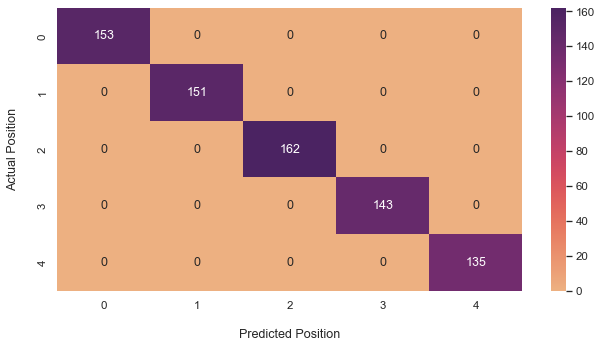


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00       162
           4       1.00      1.00      1.00       143
           5       1.00      1.00      1.00       135

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




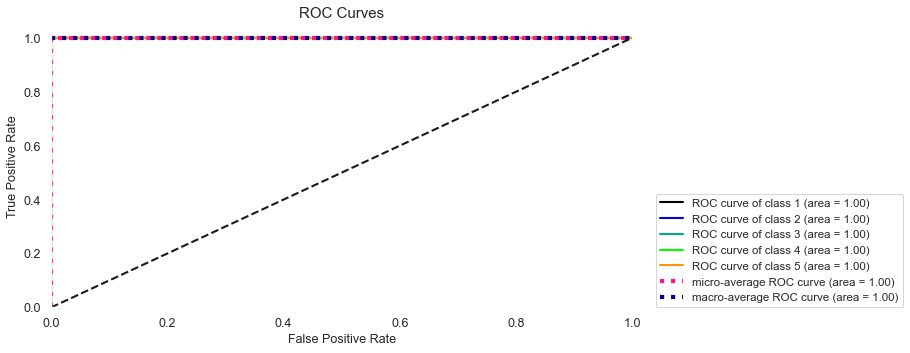

*=*=*=*=*=*=*=*=  CatBoost Validation  Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


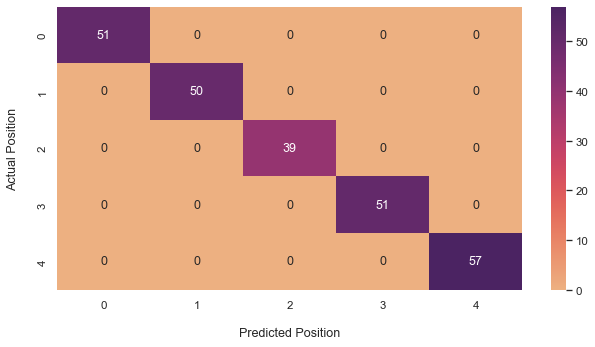


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        51
           5       1.00      1.00      1.00        57

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




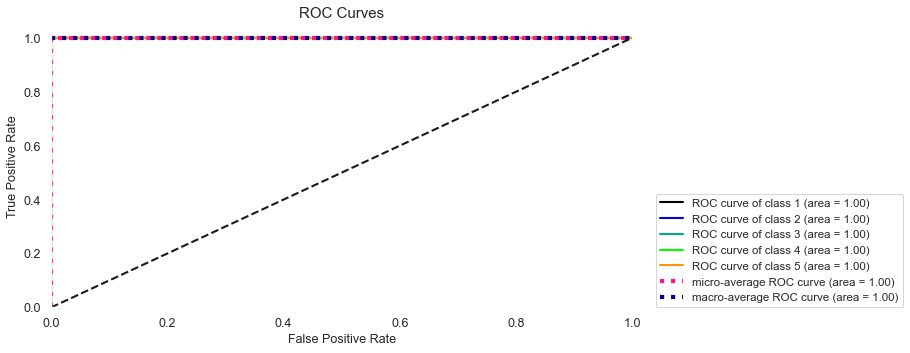

*=*=*=*=*=*=*=*=*=  CatBoost Test Dataset Evaluation:  *=*=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


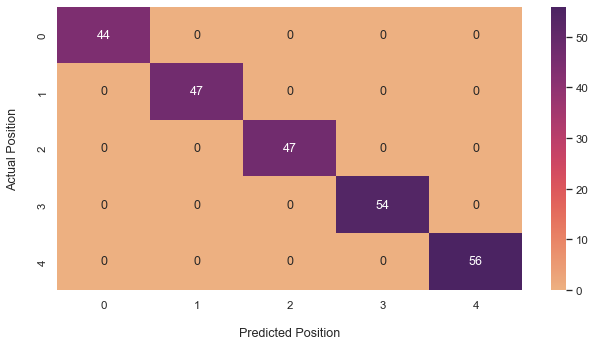


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        56

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




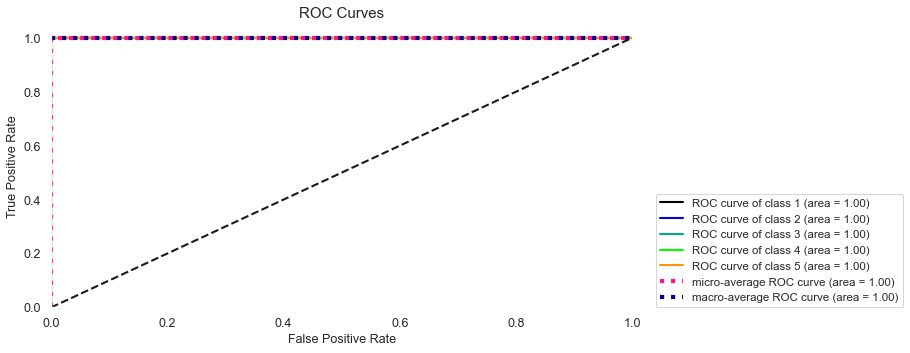

#############################################################################
                             Gradient Boosting Classifier                             
#############################################################################

*=*=*=*=*=*=  Gradient Boosting Training  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


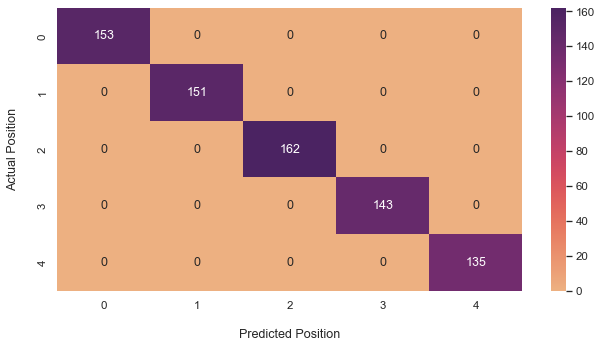


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00       162
           4       1.00      1.00      1.00       143
           5       1.00      1.00      1.00       135

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




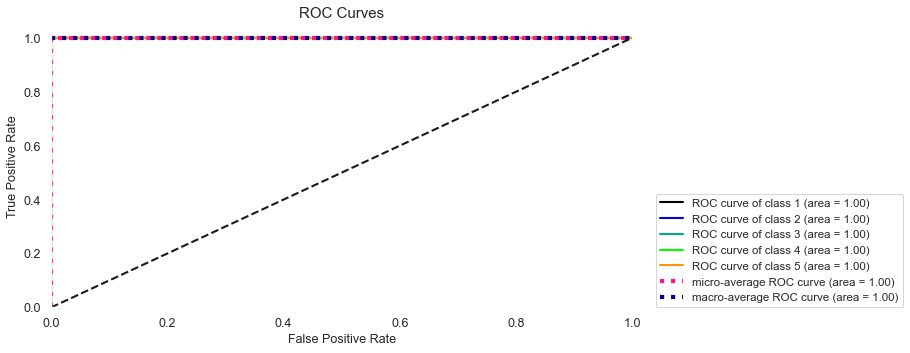

*=*=*=*=*= Gradient Boosting  Validation  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


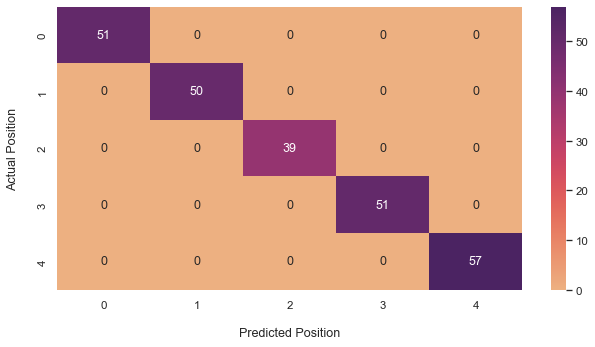


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        51
           5       1.00      1.00      1.00        57

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




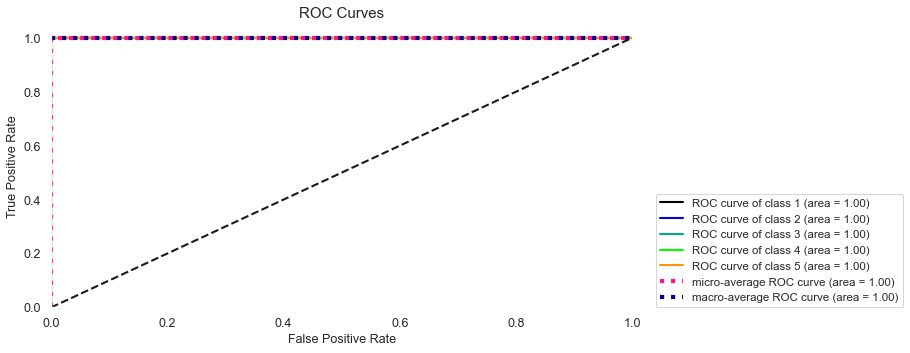

*=*=*=*=*=*=  Gradient Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


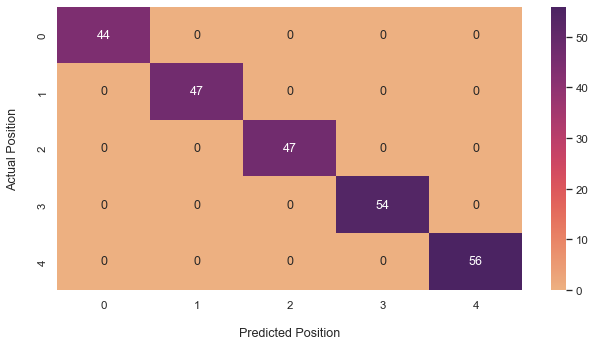


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        56

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




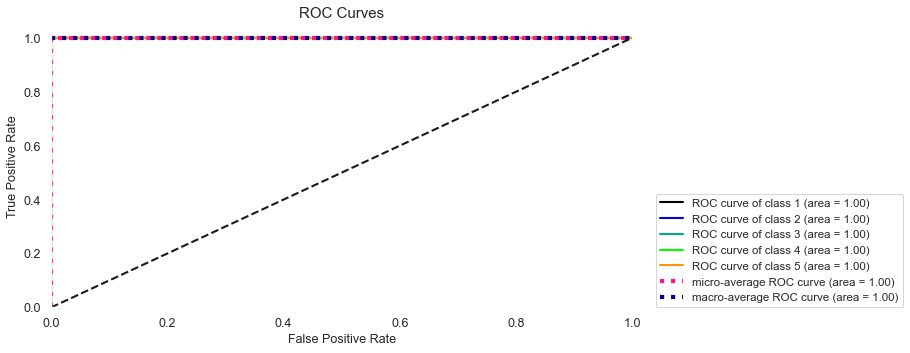

#############################################################################
                                XGBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  XGBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


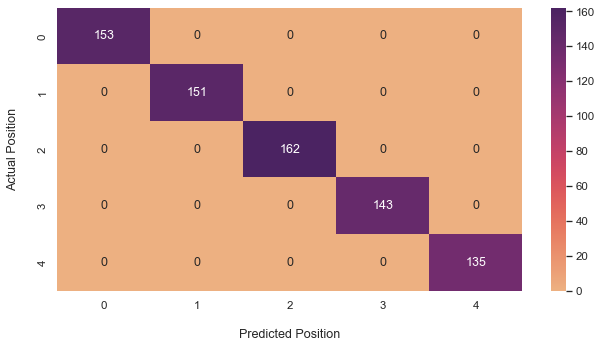


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00       162
           4       1.00      1.00      1.00       143
           5       1.00      1.00      1.00       135

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




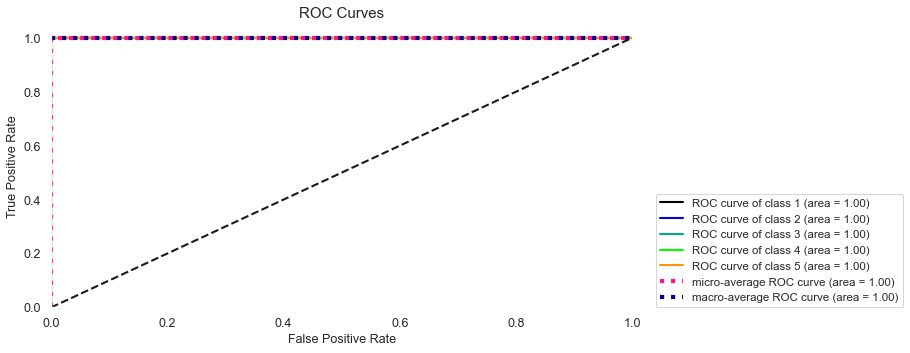

*=*=*=*=*=*=*=*=  XGBoost Validation  Dataset  Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


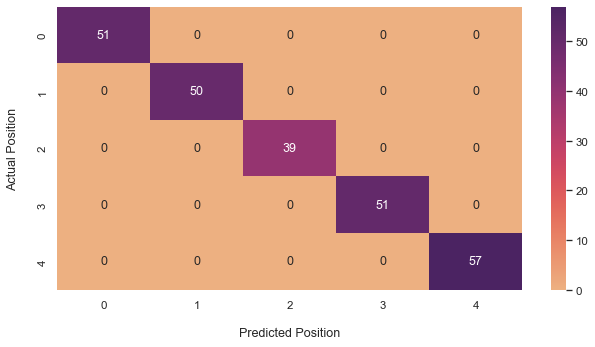


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        51
           5       1.00      1.00      1.00        57

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




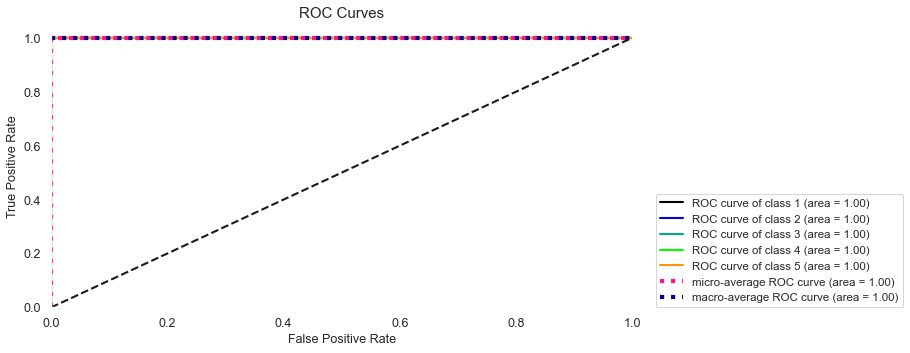

*=*=*=*=*=*=*=*=  XGBoost Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


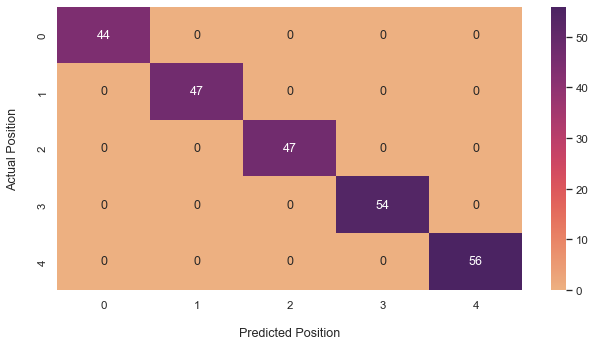


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        56

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




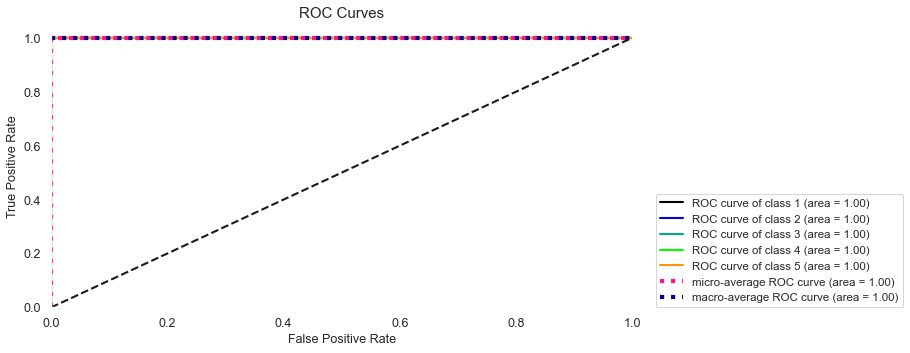

In [27]:
# Import Library
import numpy as np
import seaborn as sns
import scikitplot as skplt
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder 
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
 
from xgboost import XGBClassifier    
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, classification_report

plt.rcParams['figure.dpi'] = 75
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})


# Helper Function
def print_evaluate(true, predicted):
    acc = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    print(
        colored("==>",attrs=["bold"]),
        colored(" Accuracy: ","green",attrs=["bold"]),
        colored("{0:.2f} %".format(np.mean(acc)*100),attrs=['bold']) 
    )
    print(colored("\n\n Confusion Matrix: ","blue",attrs=["bold",'reverse', 'blink']))
    ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap='flare')
    ax.set_xlabel('\nPredicted Position')
    ax.set_ylabel('Actual Position\n')
    plt.show()
    print(colored("\n Classification Report: ","red",attrs=["bold",'reverse', 'blink']),'\n')
    print(colored(report,'yellow',attrs=['bold']))
    print(colored(38 *'*=',attrs=['bold']))
    # print('ROC-AUC score:',roc_auc_score(true, predicted))
    print('\n')
    
    

# Separate target from predictors
X = new_five_runners_df_for_model.drop(['finishing_place'], axis=1)
y = new_five_runners_df_for_model['finishing_place']


# Divide data into training, validation, and Testing subsets
# In the first step we will split the data in training and remaining dataset
X_train_full, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid_full, X_test_full, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [
    cname for cname in X_train_full.columns
    if X_train_full[cname].dtype == "object"
]


# Select numerical columns
numerical_cols = [
    cname for cname in X_train_full.columns 
    if X_train_full[cname].dtype in ['int64', 'float64']
]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


# Handle Imbalance OverSampling
smote = SMOTE(random_state=1)


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Preprocessing for numerical data
numerical_transformer = Pipeline([
    ('std_scaler', PowerTransformer())
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


##############################################################################################################################################################
#                                                                        CatBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
cat_boost = CatBoostClassifier(silent=True)


# Create Pipeline
cat_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', cat_boost)
])

# Preprocessing of training data, fit model 
cat_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_cat_boost = cat_boost_pipeline.predict(X_train)
train_proba_cat_boost = cat_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_cat_boost = cat_boost_pipeline.predict(X_valid)
valid_proba_cat_boost = cat_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_cat_boost = cat_boost_pipeline.predict(X_test)
test_proba_cat_boost = cat_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m CatBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_cat_boost)
train_roc = roc_auc_score(y_train, train_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Validation  Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_cat_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(9 *'*=',attrs=['bold']),
    colored(' CatBoost Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(10 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_cat_boost)
test_roc = roc_auc_score(y_test, test_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                Gradient Boosting Classifier Classifier
##############################################################################################################################################################

# Simple Model Creation
gradient_boosting = GradientBoostingClassifier()


# Create Pipeline
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', gradient_boosting)
])

# Preprocessing of training data, fit model 
gradient_boosting_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_train)
train_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_valid)
valid_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)
test_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(27*' ', "\033[1;30;34m Gradient Boosting Classifier \033[0;0m", 27*" ")
print(77*'#')
print('')

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_gradient_boosting)
train_roc = roc_auc_score(y_train, train_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(5 *'*=',attrs=['bold']),
    colored('Gradient Boosting  Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_gradient_boosting)
valid_roc = roc_auc_score(y_valid, valid_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_gradient_boosting)
test_roc = roc_auc_score(y_test, test_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                     XGBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
xg_boost = XGBClassifier()


# Create Pipeline
xg_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', xg_boost)
])

# Preprocessing of training data, fit model 
xg_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_xg_boost = xg_boost_pipeline.predict(X_train)
train_proba_xg_boost = xg_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_xg_boost = xg_boost_pipeline.predict(X_valid)
valid_proba_xg_boost = xg_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_xg_boost = xg_boost_pipeline.predict(X_test)
test_proba_xg_boost = xg_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m XGBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_xg_boost)
train_roc = roc_auc_score(y_train, train_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_xg_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(7 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_xg_boost)
test_roc = roc_auc_score(y_test, test_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

#############################################################################
                                CatBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  CatBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


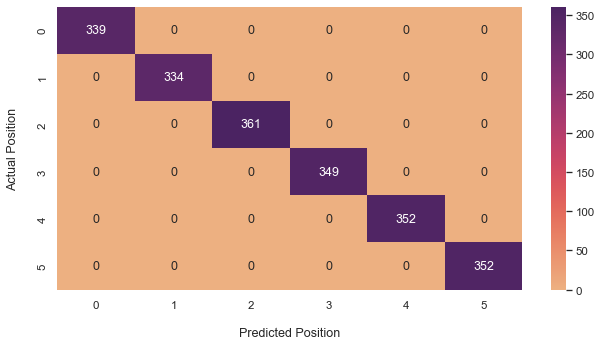


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       339
           2       1.00      1.00      1.00       334
           3       1.00      1.00      1.00       361
           4       1.00      1.00      1.00       349
           5       1.00      1.00      1.00       352
           6       1.00      1.00      1.00       352

    accuracy                           1.00      2087
   macro avg       1.00      1.00      1.00      2087
weighted avg       1.00      1.00      1.00      2087

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




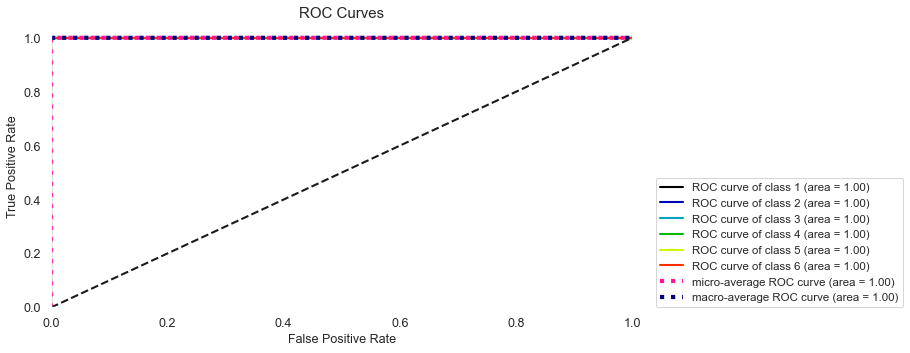

*=*=*=*=*=*=*=*=  CatBoost Validation  Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


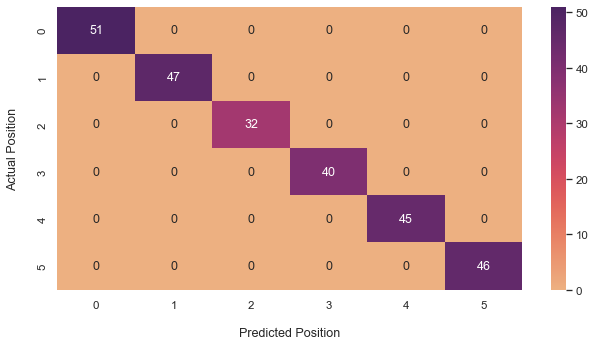


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        46

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




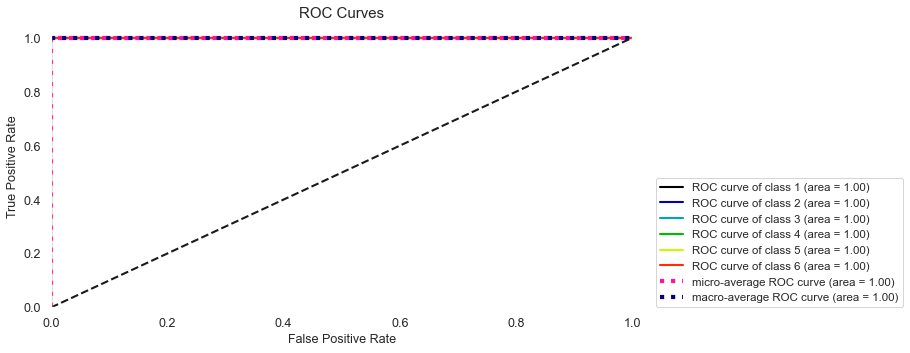

*=*=*=*=*=*=*=*=*=  CatBoost Test Dataset Evaluation:  *=*=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


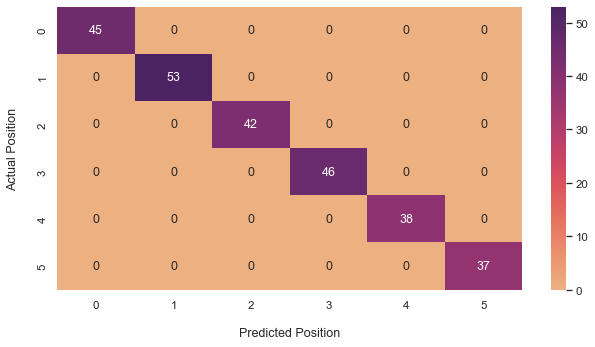


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        37

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




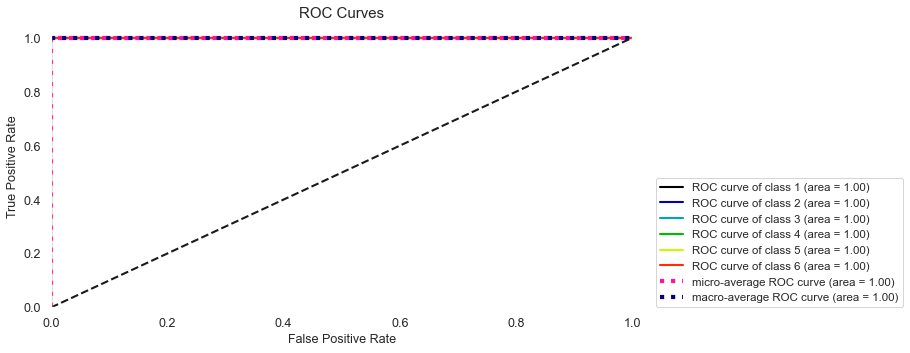

#############################################################################
                             Gradient Boosting Classifier                             
#############################################################################

*=*=*=*=*=*=  Gradient Boosting Training  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


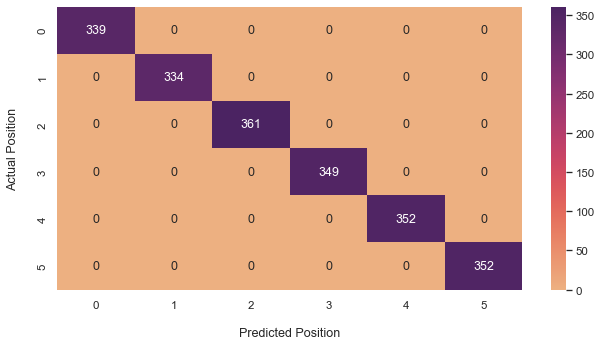


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       339
           2       1.00      1.00      1.00       334
           3       1.00      1.00      1.00       361
           4       1.00      1.00      1.00       349
           5       1.00      1.00      1.00       352
           6       1.00      1.00      1.00       352

    accuracy                           1.00      2087
   macro avg       1.00      1.00      1.00      2087
weighted avg       1.00      1.00      1.00      2087

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




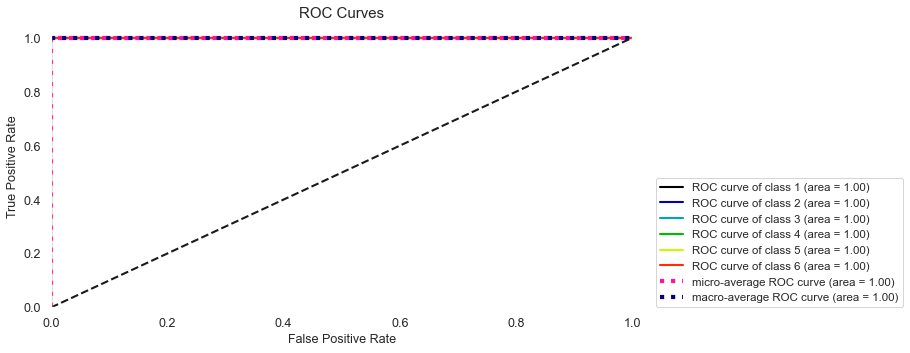

*=*=*=*=*= Gradient Boosting  Validation  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


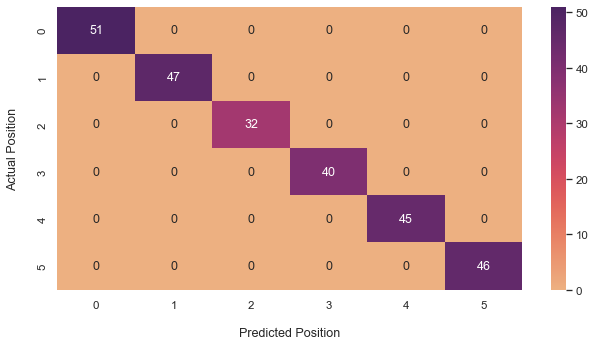


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        46

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




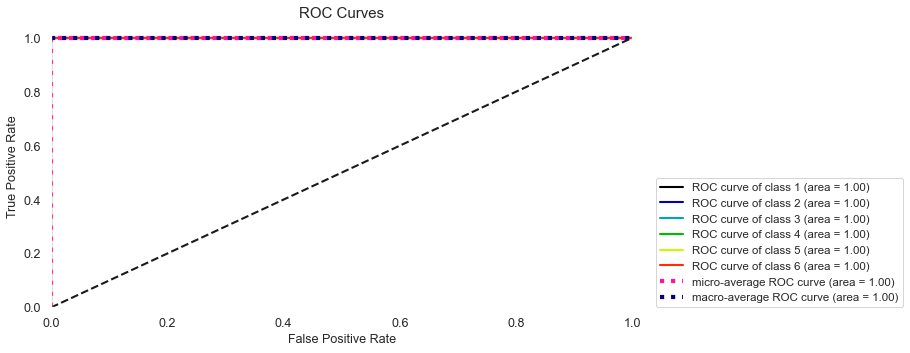

*=*=*=*=*=*=  Gradient Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


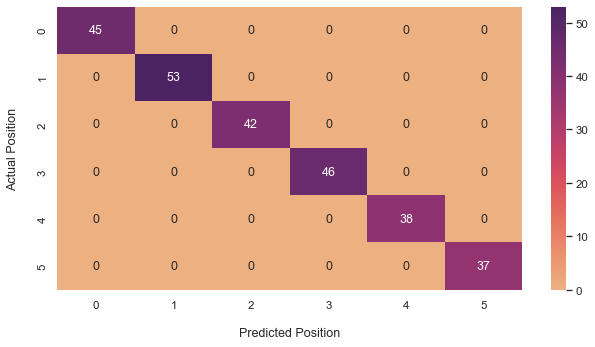


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        37

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




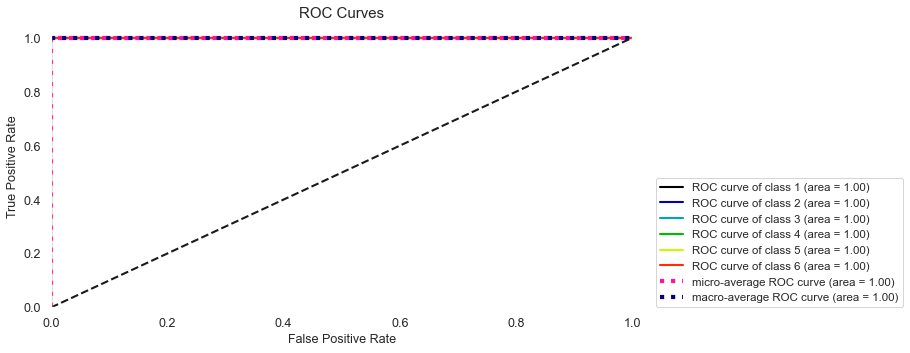

#############################################################################
                                XGBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  XGBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


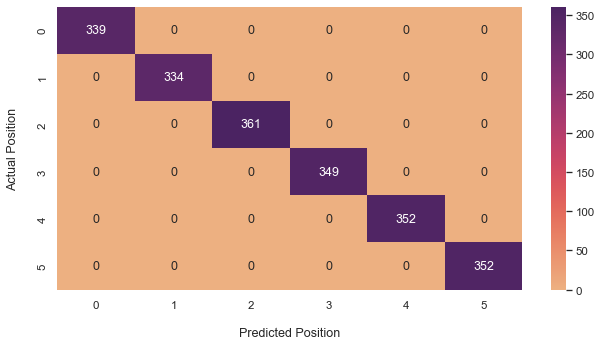


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       339
           2       1.00      1.00      1.00       334
           3       1.00      1.00      1.00       361
           4       1.00      1.00      1.00       349
           5       1.00      1.00      1.00       352
           6       1.00      1.00      1.00       352

    accuracy                           1.00      2087
   macro avg       1.00      1.00      1.00      2087
weighted avg       1.00      1.00      1.00      2087

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




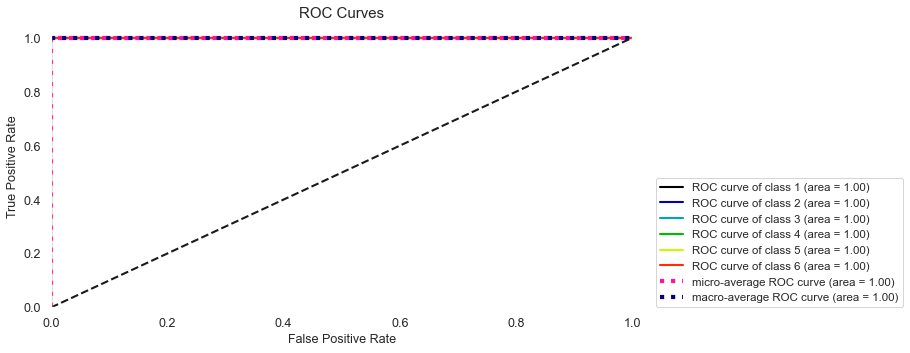

*=*=*=*=*=*=*=*=  XGBoost Validation  Dataset  Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


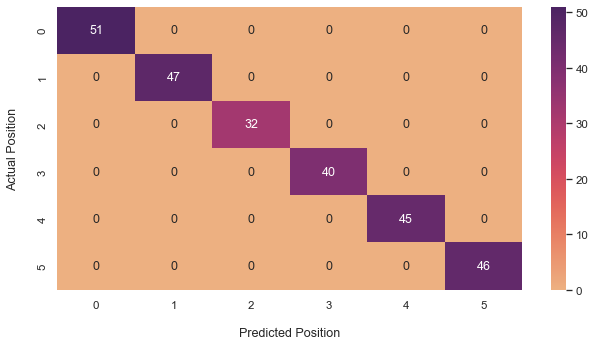


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        46

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




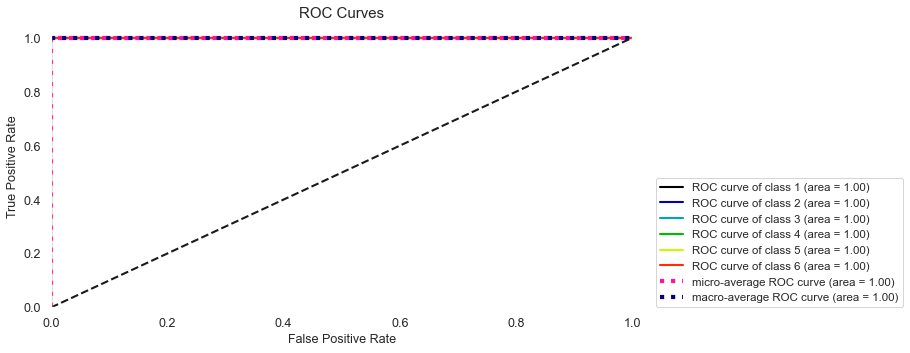

*=*=*=*=*=*=*=*=  XGBoost Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


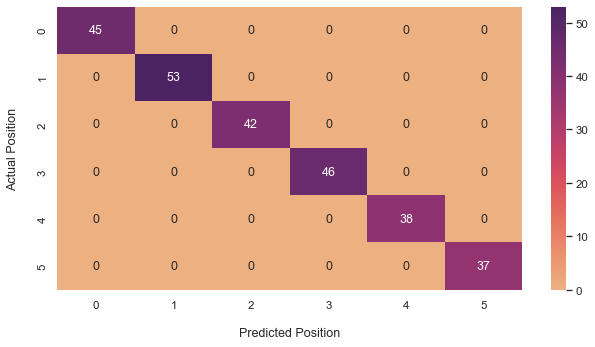


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        37

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




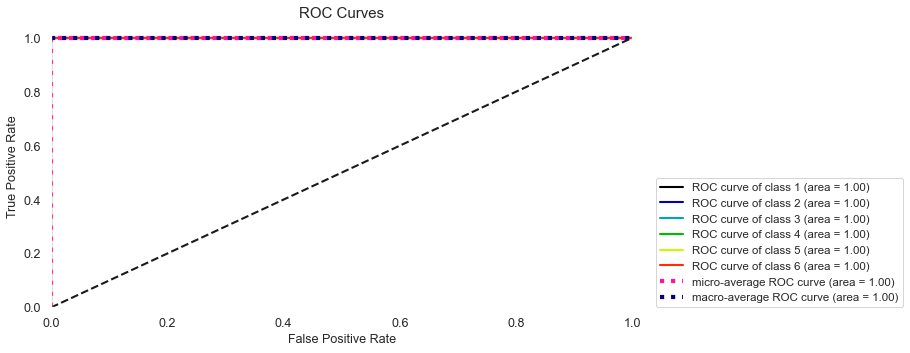

In [28]:
# Import Library
import numpy as np
import seaborn as sns
import scikitplot as skplt
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder 
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
 
from xgboost import XGBClassifier    
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, classification_report

plt.rcParams['figure.dpi'] = 75
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})


# Helper Function
def print_evaluate(true, predicted):
    acc = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    print(
        colored("==>",attrs=["bold"]),
        colored(" Accuracy: ","green",attrs=["bold"]),
        colored("{0:.2f} %".format(np.mean(acc)*100),attrs=['bold']) 
    )
    print(colored("\n\n Confusion Matrix: ","blue",attrs=["bold",'reverse', 'blink']))
    ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap='flare')
    ax.set_xlabel('\nPredicted Position')
    ax.set_ylabel('Actual Position\n')
    plt.show()
    print(colored("\n Classification Report: ","red",attrs=["bold",'reverse', 'blink']),'\n')
    print(colored(report,'yellow',attrs=['bold']))
    print(colored(38 *'*=',attrs=['bold']))
    # print('ROC-AUC score:',roc_auc_score(true, predicted))
    print('\n')
    
    

# Separate target from predictors
X = new_six_runners_df_for_model.drop(['finishing_place'], axis=1)
y = new_six_runners_df_for_model['finishing_place']


# Divide data into training, validation, and Testing subsets
# In the first step we will split the data in training and remaining dataset
X_train_full, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid_full, X_test_full, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [
    cname for cname in X_train_full.columns
    if X_train_full[cname].dtype == "object"
]


# Select numerical columns
numerical_cols = [
    cname for cname in X_train_full.columns 
    if X_train_full[cname].dtype in ['int64', 'float64']
]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


# Handle Imbalance OverSampling
smote = SMOTE(random_state=1)


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Preprocessing for numerical data
numerical_transformer = Pipeline([
    ('std_scaler', PowerTransformer())
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


##############################################################################################################################################################
#                                                                        CatBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
cat_boost = CatBoostClassifier(silent=True)


# Create Pipeline
cat_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', cat_boost)
])

# Preprocessing of training data, fit model 
cat_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_cat_boost = cat_boost_pipeline.predict(X_train)
train_proba_cat_boost = cat_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_cat_boost = cat_boost_pipeline.predict(X_valid)
valid_proba_cat_boost = cat_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_cat_boost = cat_boost_pipeline.predict(X_test)
test_proba_cat_boost = cat_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m CatBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_cat_boost)
train_roc = roc_auc_score(y_train, train_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Validation  Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_cat_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(9 *'*=',attrs=['bold']),
    colored(' CatBoost Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(10 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_cat_boost)
test_roc = roc_auc_score(y_test, test_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                Gradient Boosting Classifier Classifier
##############################################################################################################################################################

# Simple Model Creation
gradient_boosting = GradientBoostingClassifier()


# Create Pipeline
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', gradient_boosting)
])

# Preprocessing of training data, fit model 
gradient_boosting_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_train)
train_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_valid)
valid_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)
test_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(27*' ', "\033[1;30;34m Gradient Boosting Classifier \033[0;0m", 27*" ")
print(77*'#')
print('')

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_gradient_boosting)
train_roc = roc_auc_score(y_train, train_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(5 *'*=',attrs=['bold']),
    colored('Gradient Boosting  Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_gradient_boosting)
valid_roc = roc_auc_score(y_valid, valid_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_gradient_boosting)
test_roc = roc_auc_score(y_test, test_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                     XGBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
xg_boost = XGBClassifier()


# Create Pipeline
xg_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', xg_boost)
])

# Preprocessing of training data, fit model 
xg_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_xg_boost = xg_boost_pipeline.predict(X_train)
train_proba_xg_boost = xg_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_xg_boost = xg_boost_pipeline.predict(X_valid)
valid_proba_xg_boost = xg_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_xg_boost = xg_boost_pipeline.predict(X_test)
test_proba_xg_boost = xg_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m XGBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_xg_boost)
train_roc = roc_auc_score(y_train, train_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_xg_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(7 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_xg_boost)
test_roc = roc_auc_score(y_test, test_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

#############################################################################
                                CatBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  CatBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


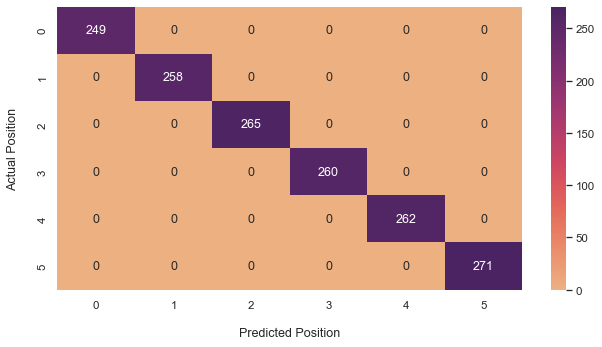


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       249
           2       1.00      1.00      1.00       258
           3       1.00      1.00      1.00       265
           4       1.00      1.00      1.00       260
           5       1.00      1.00      1.00       262
           6       1.00      1.00      1.00       271

    accuracy                           1.00      1565
   macro avg       1.00      1.00      1.00      1565
weighted avg       1.00      1.00      1.00      1565

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




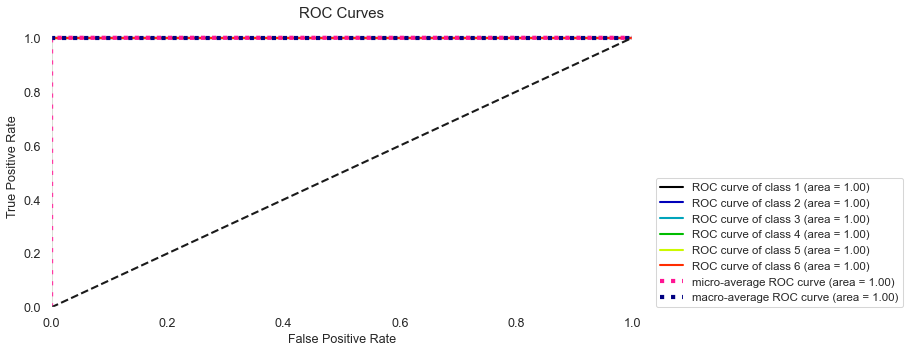

*=*=*=*=*=*=*=*=  CatBoost Validation  Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


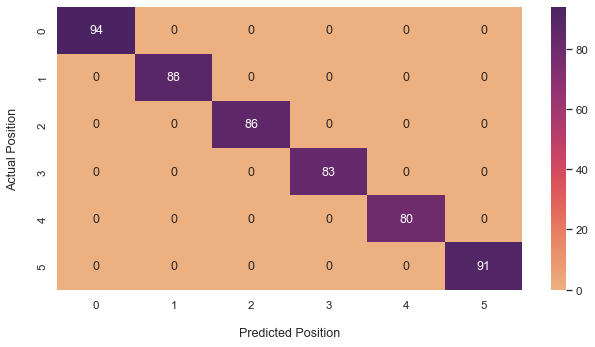


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        88
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        83
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        91

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




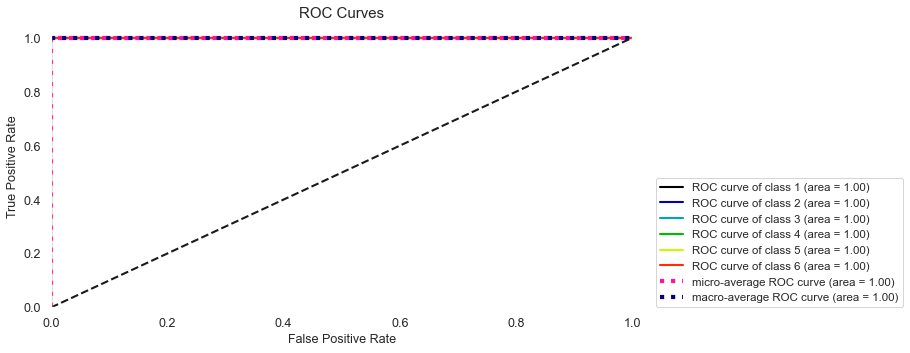

*=*=*=*=*=*=*=*=*=  CatBoost Test Dataset Evaluation:  *=*=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


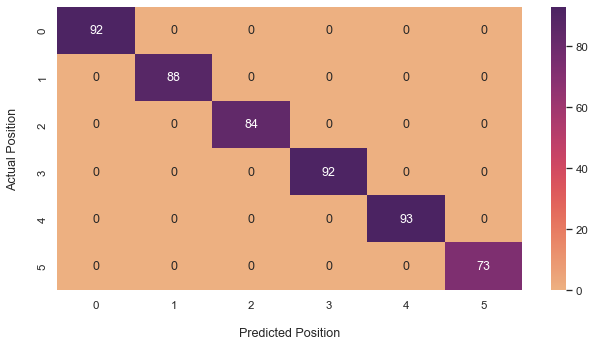


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        88
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        92
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        73

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




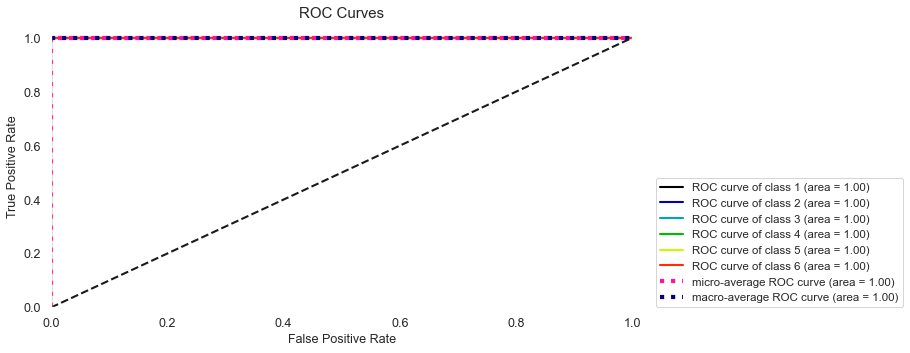

#############################################################################
                             Gradient Boosting Classifier                             
#############################################################################

*=*=*=*=*=*=  Gradient Boosting Training  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


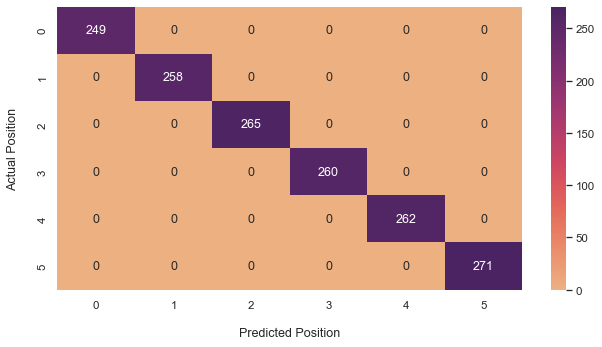


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       249
           2       1.00      1.00      1.00       258
           3       1.00      1.00      1.00       265
           4       1.00      1.00      1.00       260
           5       1.00      1.00      1.00       262
           6       1.00      1.00      1.00       271

    accuracy                           1.00      1565
   macro avg       1.00      1.00      1.00      1565
weighted avg       1.00      1.00      1.00      1565

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




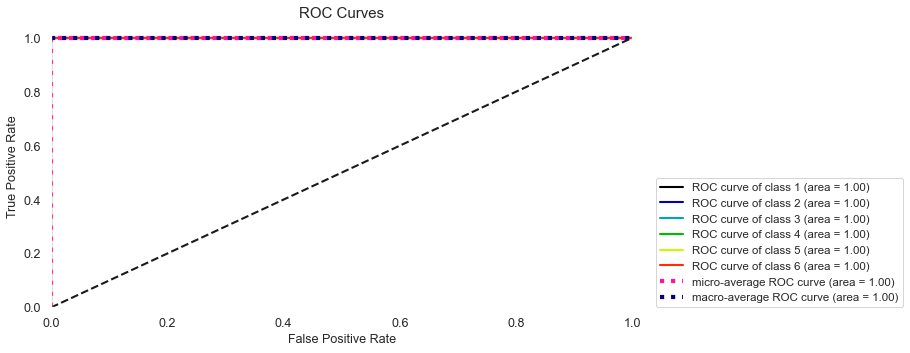

*=*=*=*=*= Gradient Boosting  Validation  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


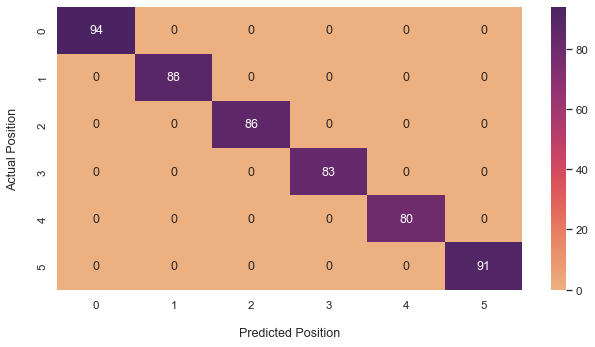


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        88
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        83
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        91

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




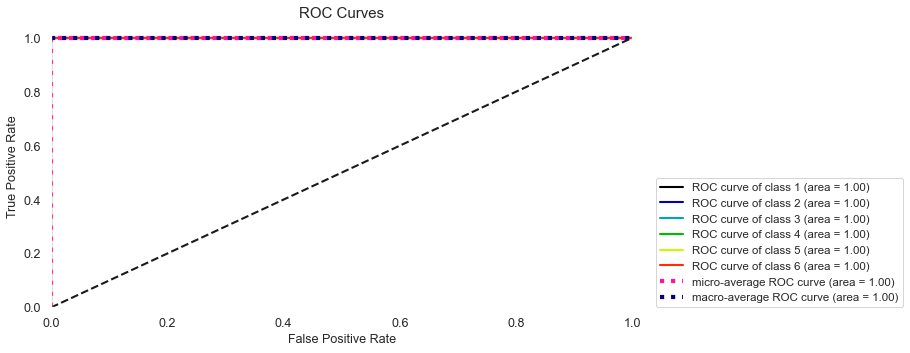

*=*=*=*=*=*=  Gradient Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


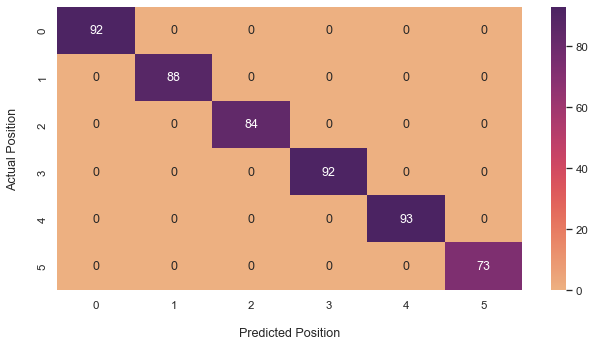


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        88
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        92
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        73

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




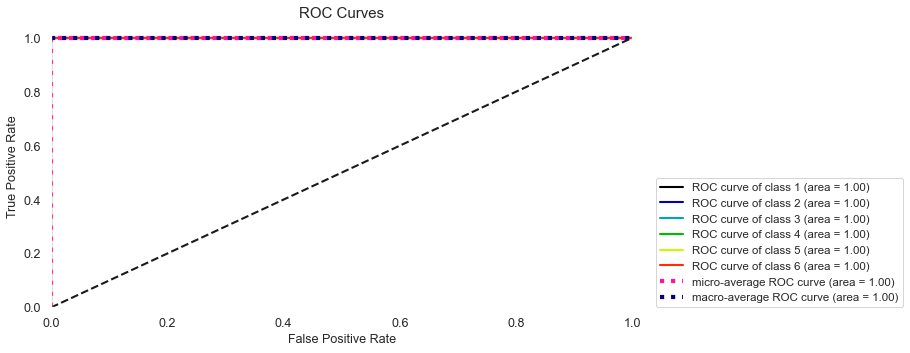

#############################################################################
                                XGBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  XGBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


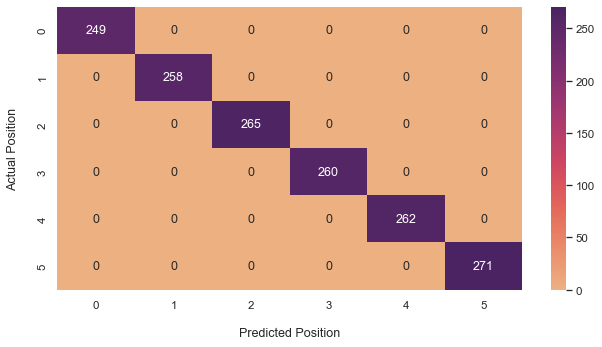


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       249
           2       1.00      1.00      1.00       258
           3       1.00      1.00      1.00       265
           4       1.00      1.00      1.00       260
           5       1.00      1.00      1.00       262
           6       1.00      1.00      1.00       271

    accuracy                           1.00      1565
   macro avg       1.00      1.00      1.00      1565
weighted avg       1.00      1.00      1.00      1565

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




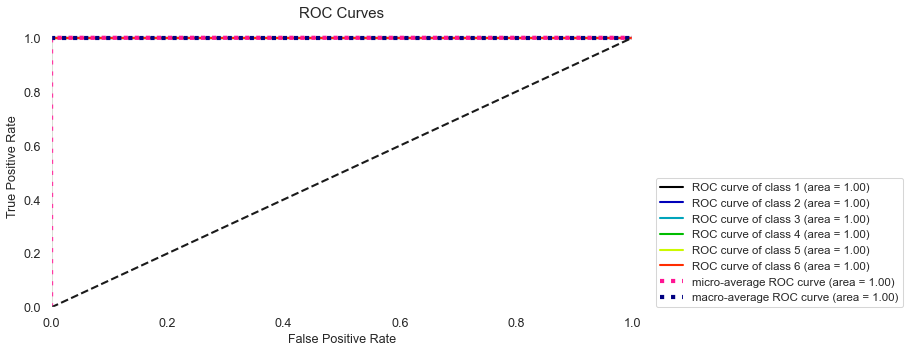

*=*=*=*=*=*=*=*=  XGBoost Validation  Dataset  Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


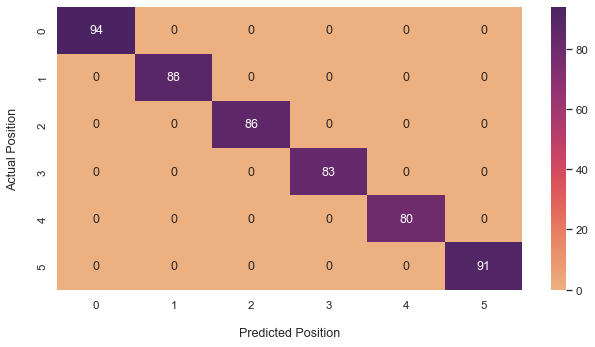


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        88
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        83
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        91

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




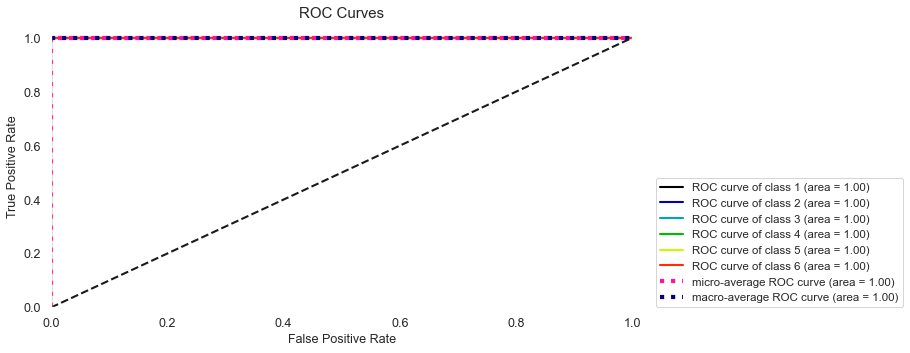

*=*=*=*=*=*=*=*=  XGBoost Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


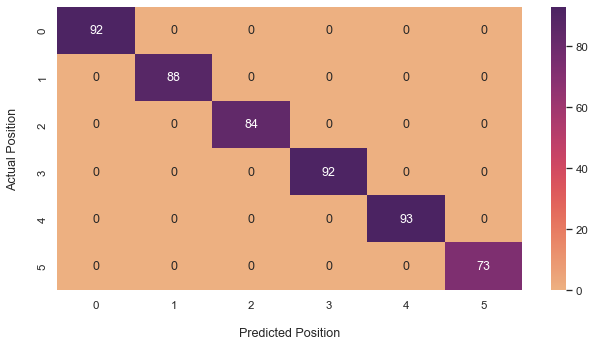


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        88
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        92
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        73

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




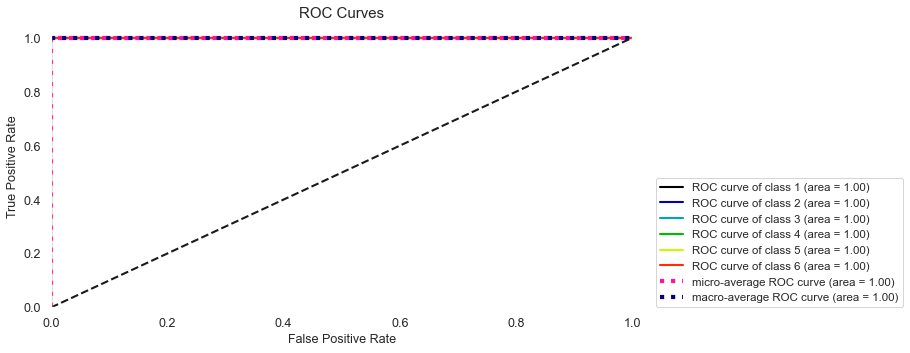

In [29]:
# Import Library
import numpy as np
import seaborn as sns
import scikitplot as skplt
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder 
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
 
from xgboost import XGBClassifier    
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, classification_report

plt.rcParams['figure.dpi'] = 75
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})


# Helper Function
def print_evaluate(true, predicted):
    acc = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    print(
        colored("==>",attrs=["bold"]),
        colored(" Accuracy: ","green",attrs=["bold"]),
        colored("{0:.2f} %".format(np.mean(acc)*100),attrs=['bold']) 
    )
    print(colored("\n\n Confusion Matrix: ","blue",attrs=["bold",'reverse', 'blink']))
    ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap='flare')
    ax.set_xlabel('\nPredicted Position')
    ax.set_ylabel('Actual Position\n')
    plt.show()
    print(colored("\n Classification Report: ","red",attrs=["bold",'reverse', 'blink']),'\n')
    print(colored(report,'yellow',attrs=['bold']))
    print(colored(38 *'*=',attrs=['bold']))
    # print('ROC-AUC score:',roc_auc_score(true, predicted))
    print('\n')
    
    

# Separate target from predictors
X = new_seven_runners_df_for_model.drop(['finishing_place'], axis=1)
y = new_seven_runners_df_for_model['finishing_place']


# Divide data into training, validation, and Testing subsets
# In the first step we will split the data in training and remaining dataset
X_train_full, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid_full, X_test_full, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [
    cname for cname in X_train_full.columns
    if X_train_full[cname].dtype == "object"
]


# Select numerical columns
numerical_cols = [
    cname for cname in X_train_full.columns 
    if X_train_full[cname].dtype in ['int64', 'float64']
]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


# Handle Imbalance OverSampling
smote = SMOTE(random_state=1)


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Preprocessing for numerical data
numerical_transformer = Pipeline([
    ('std_scaler', PowerTransformer())
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


##############################################################################################################################################################
#                                                                        CatBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
cat_boost = CatBoostClassifier(silent=True)


# Create Pipeline
cat_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', cat_boost)
])

# Preprocessing of training data, fit model 
cat_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_cat_boost = cat_boost_pipeline.predict(X_train)
train_proba_cat_boost = cat_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_cat_boost = cat_boost_pipeline.predict(X_valid)
valid_proba_cat_boost = cat_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_cat_boost = cat_boost_pipeline.predict(X_test)
test_proba_cat_boost = cat_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m CatBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_cat_boost)
train_roc = roc_auc_score(y_train, train_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Validation  Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_cat_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(9 *'*=',attrs=['bold']),
    colored(' CatBoost Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(10 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_cat_boost)
test_roc = roc_auc_score(y_test, test_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                Gradient Boosting Classifier Classifier
##############################################################################################################################################################

# Simple Model Creation
gradient_boosting = GradientBoostingClassifier()


# Create Pipeline
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', gradient_boosting)
])

# Preprocessing of training data, fit model 
gradient_boosting_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_train)
train_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_valid)
valid_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)
test_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(27*' ', "\033[1;30;34m Gradient Boosting Classifier \033[0;0m", 27*" ")
print(77*'#')
print('')

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_gradient_boosting)
train_roc = roc_auc_score(y_train, train_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(5 *'*=',attrs=['bold']),
    colored('Gradient Boosting  Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_gradient_boosting)
valid_roc = roc_auc_score(y_valid, valid_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_gradient_boosting)
test_roc = roc_auc_score(y_test, test_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                     XGBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
xg_boost = XGBClassifier()


# Create Pipeline
xg_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', xg_boost)
])

# Preprocessing of training data, fit model 
xg_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_xg_boost = xg_boost_pipeline.predict(X_train)
train_proba_xg_boost = xg_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_xg_boost = xg_boost_pipeline.predict(X_valid)
valid_proba_xg_boost = xg_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_xg_boost = xg_boost_pipeline.predict(X_test)
test_proba_xg_boost = xg_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m XGBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_xg_boost)
train_roc = roc_auc_score(y_train, train_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_xg_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(7 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_xg_boost)
test_roc = roc_auc_score(y_test, test_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

#############################################################################
                                CatBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  CatBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


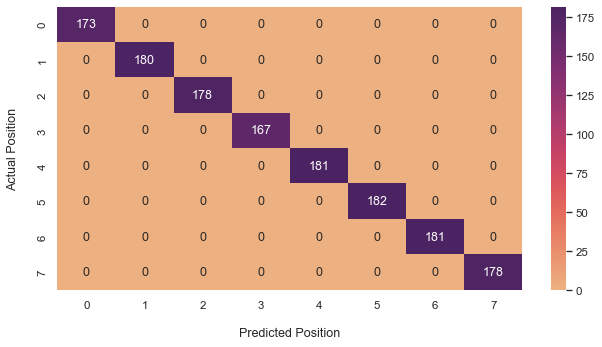


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       173
           2       1.00      1.00      1.00       180
           3       1.00      1.00      1.00       178
           4       1.00      1.00      1.00       167
           5       1.00      1.00      1.00       181
           6       1.00      1.00      1.00       182
           7       1.00      1.00      1.00       181
           8       1.00      1.00      1.00       178

    accuracy                           1.00      1420
   macro avg       1.00      1.00      1.00      1420
weighted avg       1.00      1.00      1.00      1420

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




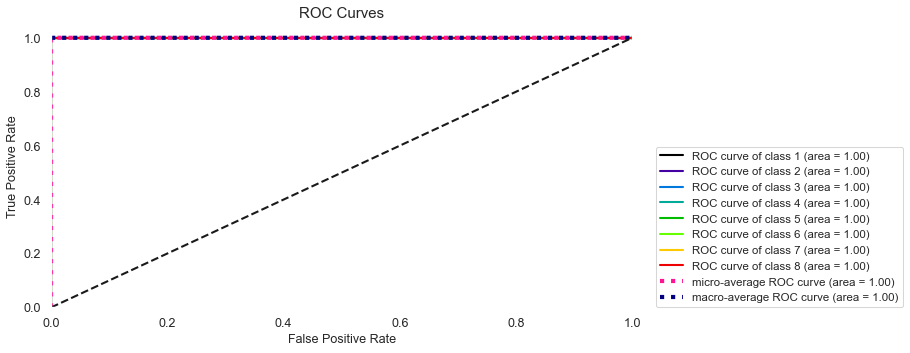

*=*=*=*=*=*=*=*=  CatBoost Validation  Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


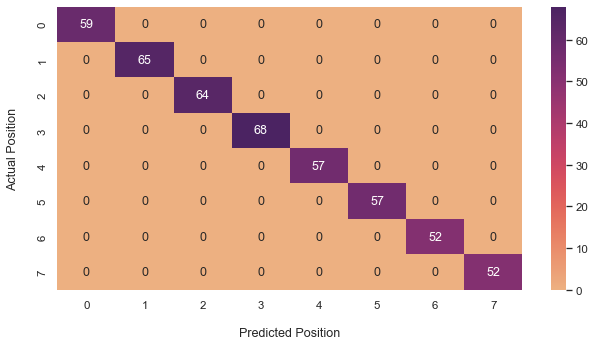


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        68
           5       1.00      1.00      1.00        57
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        52
           8       1.00      1.00      1.00        52

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




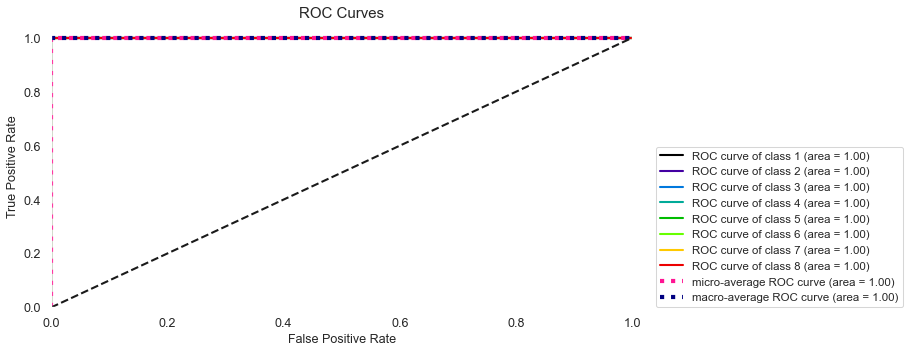

*=*=*=*=*=*=*=*=*=  CatBoost Test Dataset Evaluation:  *=*=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


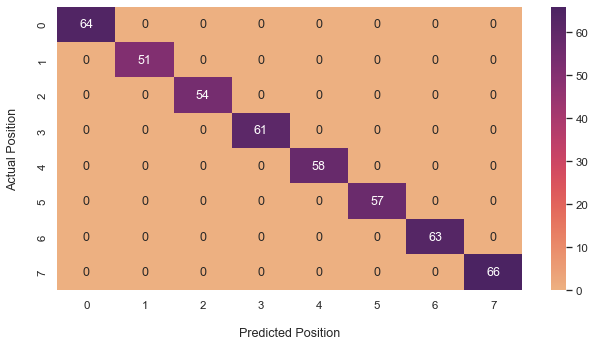


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        58
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63
           8       1.00      1.00      1.00        66

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




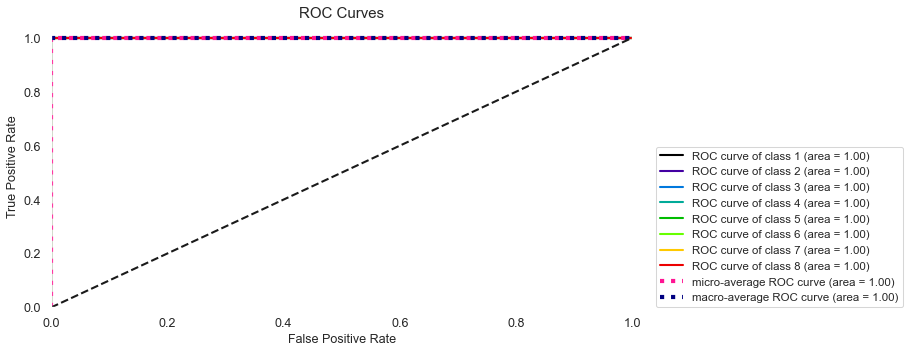

#############################################################################
                             Gradient Boosting Classifier                             
#############################################################################

*=*=*=*=*=*=  Gradient Boosting Training  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


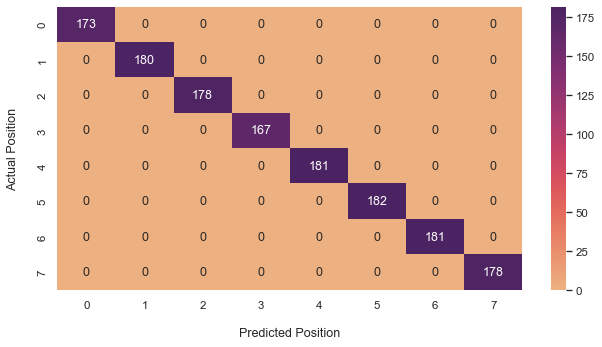


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       173
           2       1.00      1.00      1.00       180
           3       1.00      1.00      1.00       178
           4       1.00      1.00      1.00       167
           5       1.00      1.00      1.00       181
           6       1.00      1.00      1.00       182
           7       1.00      1.00      1.00       181
           8       1.00      1.00      1.00       178

    accuracy                           1.00      1420
   macro avg       1.00      1.00      1.00      1420
weighted avg       1.00      1.00      1.00      1420

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




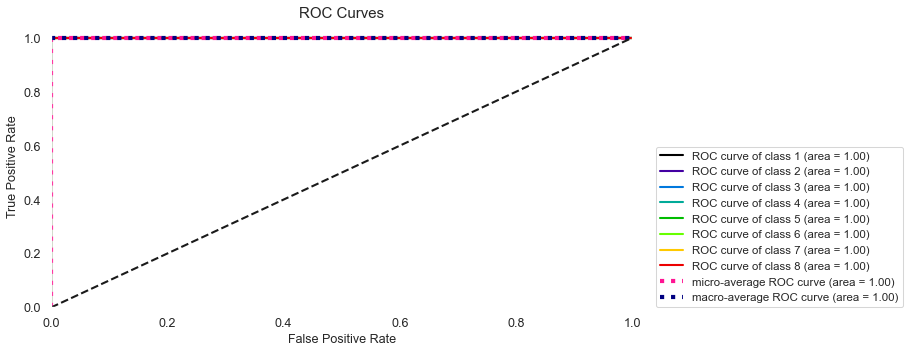

*=*=*=*=*= Gradient Boosting  Validation  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


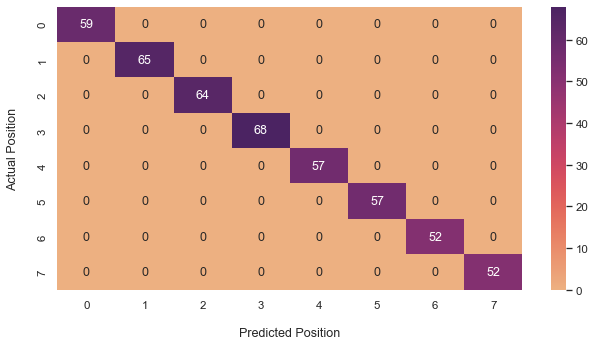


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        68
           5       1.00      1.00      1.00        57
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        52
           8       1.00      1.00      1.00        52

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




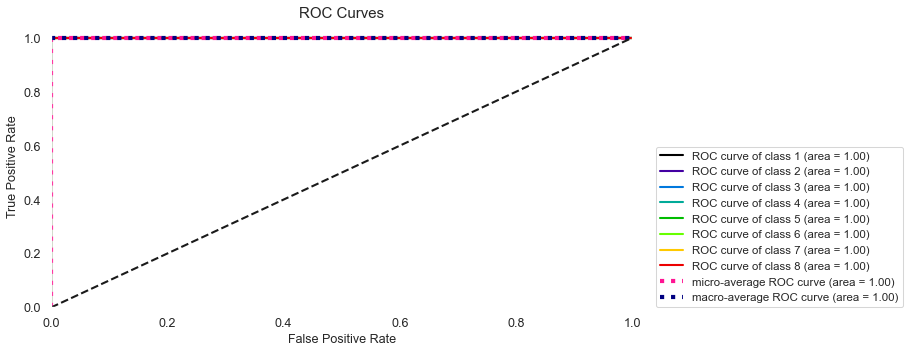

*=*=*=*=*=*=  Gradient Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


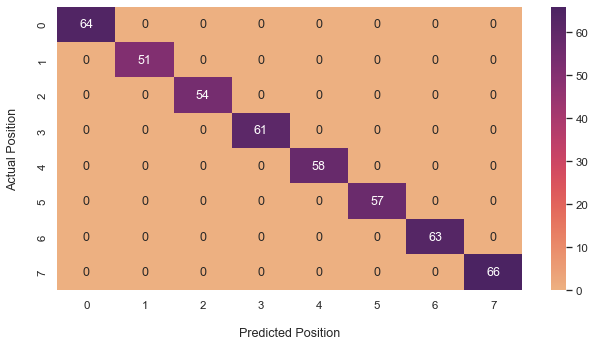


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        58
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63
           8       1.00      1.00      1.00        66

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




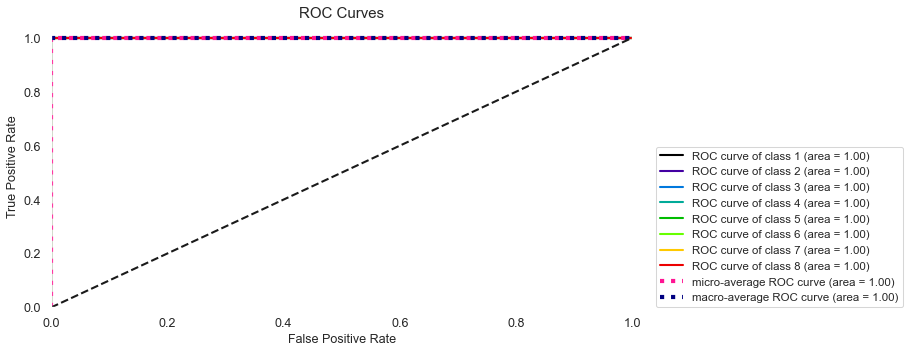

#############################################################################
                                XGBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  XGBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


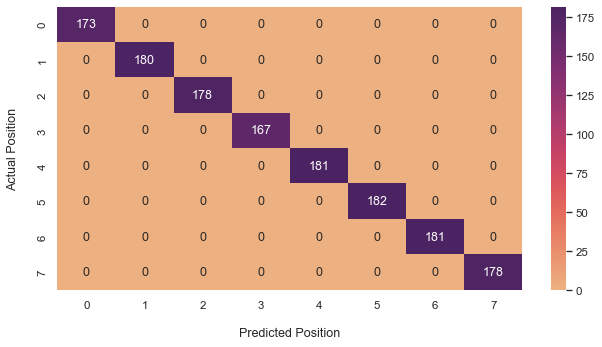


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       173
           2       1.00      1.00      1.00       180
           3       1.00      1.00      1.00       178
           4       1.00      1.00      1.00       167
           5       1.00      1.00      1.00       181
           6       1.00      1.00      1.00       182
           7       1.00      1.00      1.00       181
           8       1.00      1.00      1.00       178

    accuracy                           1.00      1420
   macro avg       1.00      1.00      1.00      1420
weighted avg       1.00      1.00      1.00      1420

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




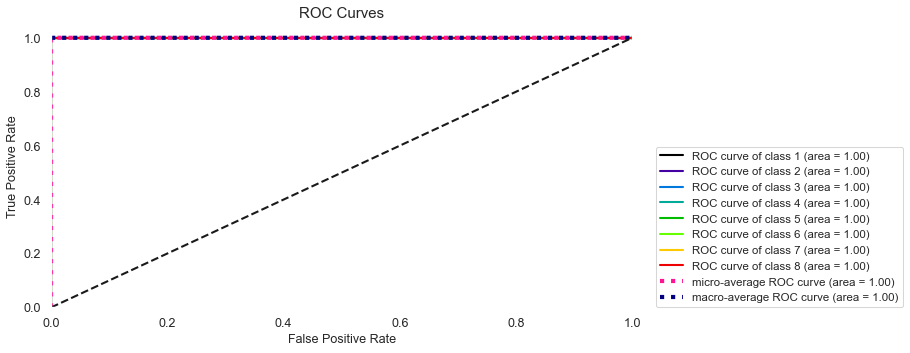

*=*=*=*=*=*=*=*=  XGBoost Validation  Dataset  Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


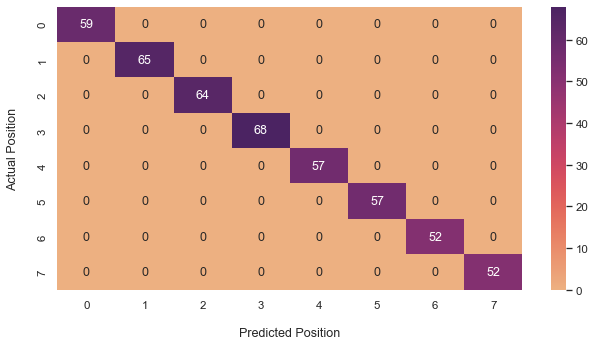


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        68
           5       1.00      1.00      1.00        57
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        52
           8       1.00      1.00      1.00        52

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




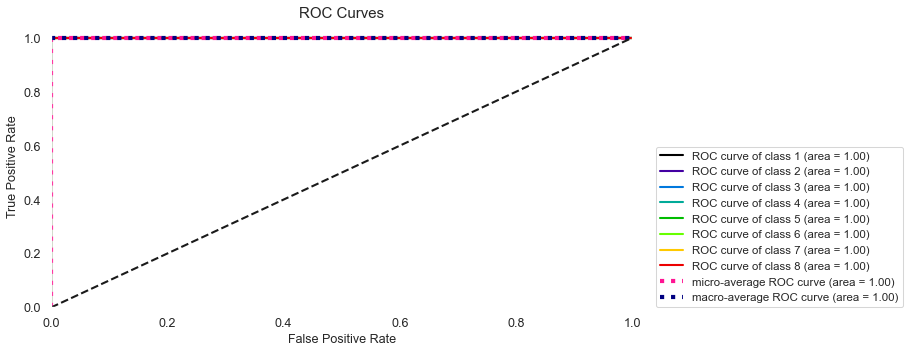

*=*=*=*=*=*=*=*=  XGBoost Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


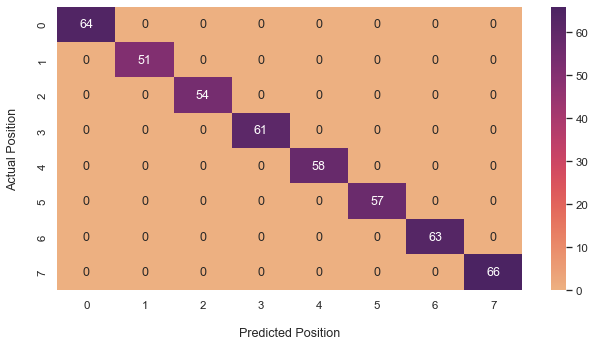


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        58
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63
           8       1.00      1.00      1.00        66

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




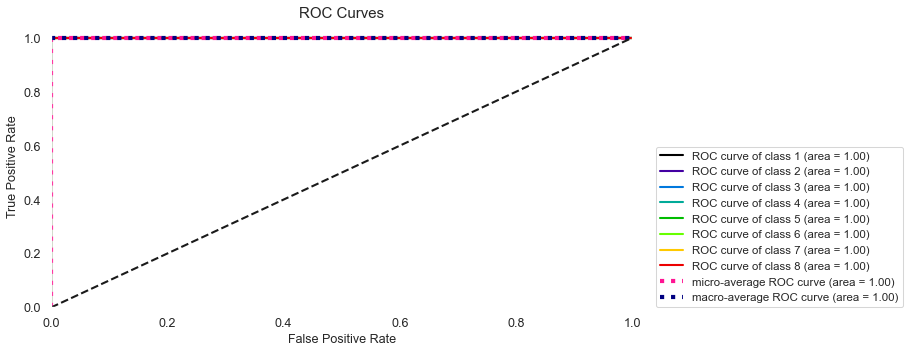

In [30]:
# Import Library
import numpy as np
import seaborn as sns
import scikitplot as skplt
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder 
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
 
from xgboost import XGBClassifier    
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, classification_report

plt.rcParams['figure.dpi'] = 75
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})


# Helper Function
def print_evaluate(true, predicted):
    acc = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    print(
        colored("==>",attrs=["bold"]),
        colored(" Accuracy: ","green",attrs=["bold"]),
        colored("{0:.2f} %".format(np.mean(acc)*100),attrs=['bold']) 
    )
    print(colored("\n\n Confusion Matrix: ","blue",attrs=["bold",'reverse', 'blink']))
    ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap='flare')
    ax.set_xlabel('\nPredicted Position')
    ax.set_ylabel('Actual Position\n')
    plt.show()
    print(colored("\n Classification Report: ","red",attrs=["bold",'reverse', 'blink']),'\n')
    print(colored(report,'yellow',attrs=['bold']))
    print(colored(38 *'*=',attrs=['bold']))
    # print('ROC-AUC score:',roc_auc_score(true, predicted))
    print('\n')
    
    

# Separate target from predictors
X = new_eight_runners_df_for_model.drop(['finishing_place'], axis=1)
y = new_eight_runners_df_for_model['finishing_place']


# Divide data into training, validation, and Testing subsets
# In the first step we will split the data in training and remaining dataset
X_train_full, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid_full, X_test_full, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [
    cname for cname in X_train_full.columns
    if X_train_full[cname].dtype == "object"
]


# Select numerical columns
numerical_cols = [
    cname for cname in X_train_full.columns 
    if X_train_full[cname].dtype in ['int64', 'float64']
]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


# Handle Imbalance OverSampling
smote = SMOTE(random_state=1)


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Preprocessing for numerical data
numerical_transformer = Pipeline([
    ('std_scaler', PowerTransformer())
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


##############################################################################################################################################################
#                                                                        CatBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
cat_boost = CatBoostClassifier(silent=True)


# Create Pipeline
cat_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', cat_boost)
])

# Preprocessing of training data, fit model 
cat_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_cat_boost = cat_boost_pipeline.predict(X_train)
train_proba_cat_boost = cat_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_cat_boost = cat_boost_pipeline.predict(X_valid)
valid_proba_cat_boost = cat_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_cat_boost = cat_boost_pipeline.predict(X_test)
test_proba_cat_boost = cat_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m CatBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_cat_boost)
train_roc = roc_auc_score(y_train, train_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Validation  Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_cat_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(9 *'*=',attrs=['bold']),
    colored(' CatBoost Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(10 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_cat_boost)
test_roc = roc_auc_score(y_test, test_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                Gradient Boosting Classifier Classifier
##############################################################################################################################################################

# Simple Model Creation
gradient_boosting = GradientBoostingClassifier()


# Create Pipeline
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', gradient_boosting)
])

# Preprocessing of training data, fit model 
gradient_boosting_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_train)
train_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_valid)
valid_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)
test_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(27*' ', "\033[1;30;34m Gradient Boosting Classifier \033[0;0m", 27*" ")
print(77*'#')
print('')

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_gradient_boosting)
train_roc = roc_auc_score(y_train, train_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(5 *'*=',attrs=['bold']),
    colored('Gradient Boosting  Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_gradient_boosting)
valid_roc = roc_auc_score(y_valid, valid_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_gradient_boosting)
test_roc = roc_auc_score(y_test, test_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                     XGBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
xg_boost = XGBClassifier()


# Create Pipeline
xg_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', xg_boost)
])

# Preprocessing of training data, fit model 
xg_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_xg_boost = xg_boost_pipeline.predict(X_train)
train_proba_xg_boost = xg_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_xg_boost = xg_boost_pipeline.predict(X_valid)
valid_proba_xg_boost = xg_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_xg_boost = xg_boost_pipeline.predict(X_test)
test_proba_xg_boost = xg_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m XGBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_xg_boost)
train_roc = roc_auc_score(y_train, train_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_xg_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(7 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_xg_boost)
test_roc = roc_auc_score(y_test, test_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

#############################################################################
                                CatBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  CatBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


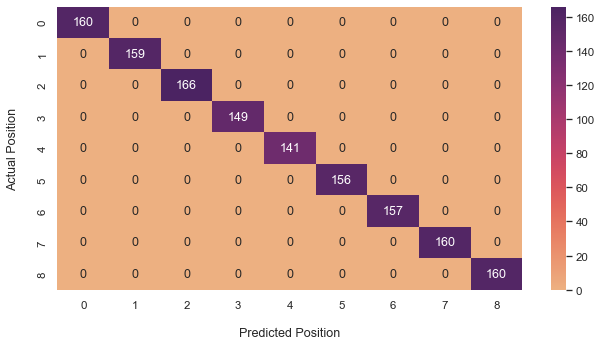


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       159
           3       1.00      1.00      1.00       166
           4       1.00      1.00      1.00       149
           5       1.00      1.00      1.00       141
           6       1.00      1.00      1.00       156
           7       1.00      1.00      1.00       157
           8       1.00      1.00      1.00       160
           9       1.00      1.00      1.00       160

    accuracy                           1.00      1408
   macro avg       1.00      1.00      1.00      1408
weighted avg       1.00      1.00      1.00      1408

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




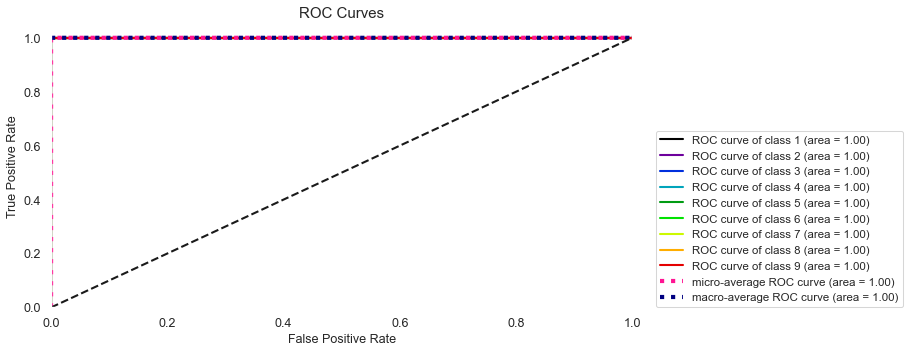

*=*=*=*=*=*=*=*=  CatBoost Validation  Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


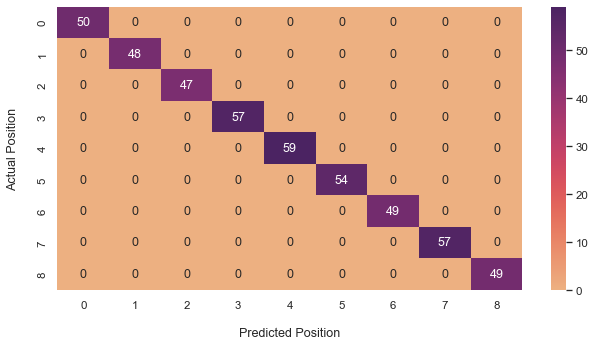


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        57
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        49
           8       1.00      1.00      1.00        57
           9       1.00      1.00      1.00        49

    accuracy                           1.00       470
   macro avg       1.00      1.00      1.00       470
weighted avg       1.00      1.00      1.00       470

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




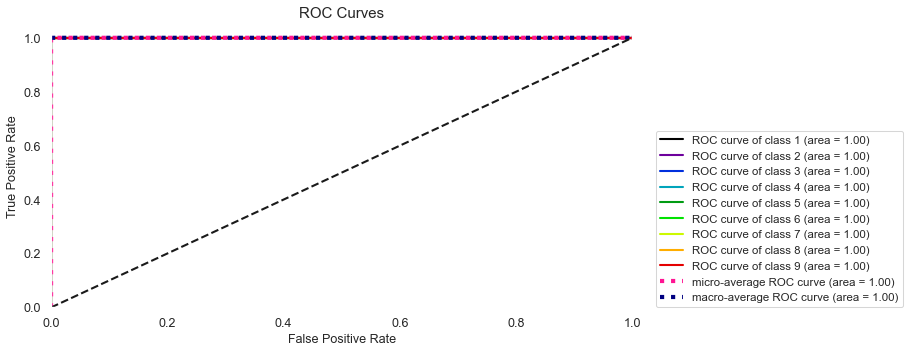

*=*=*=*=*=*=*=*=*=  CatBoost Test Dataset Evaluation:  *=*=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


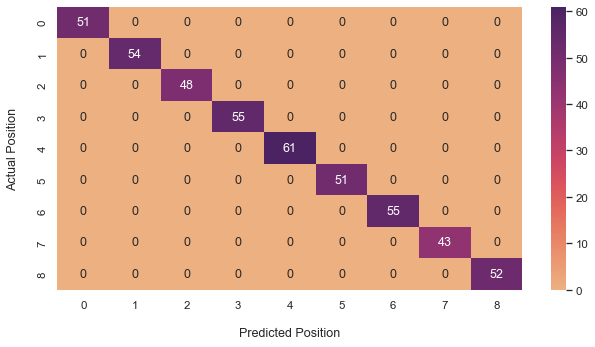


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        55
           5       1.00      1.00      1.00        61
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       1.00      1.00      1.00        52

    accuracy                           1.00       470
   macro avg       1.00      1.00      1.00       470
weighted avg       1.00      1.00      1.00       470

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




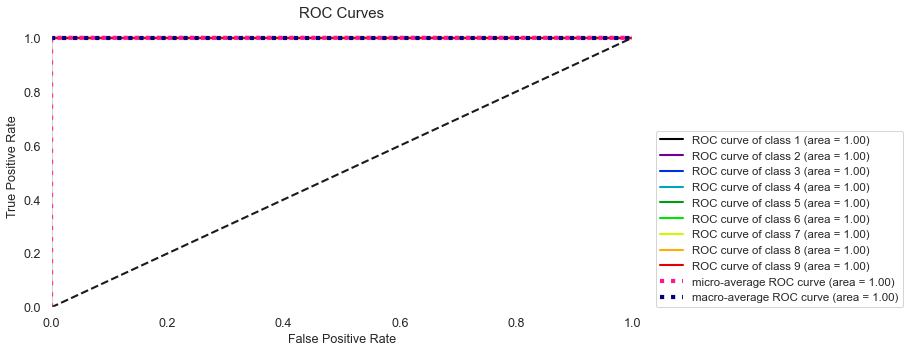

#############################################################################
                             Gradient Boosting Classifier                             
#############################################################################

*=*=*=*=*=*=  Gradient Boosting Training  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


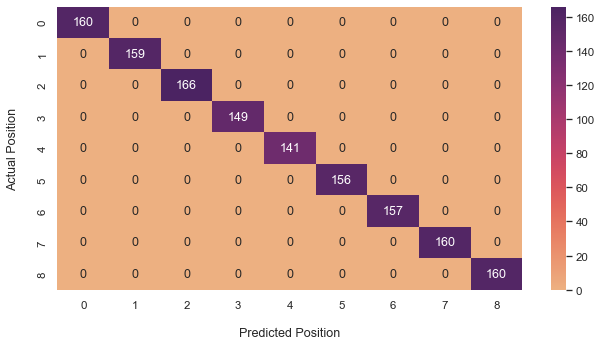


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       159
           3       1.00      1.00      1.00       166
           4       1.00      1.00      1.00       149
           5       1.00      1.00      1.00       141
           6       1.00      1.00      1.00       156
           7       1.00      1.00      1.00       157
           8       1.00      1.00      1.00       160
           9       1.00      1.00      1.00       160

    accuracy                           1.00      1408
   macro avg       1.00      1.00      1.00      1408
weighted avg       1.00      1.00      1.00      1408

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




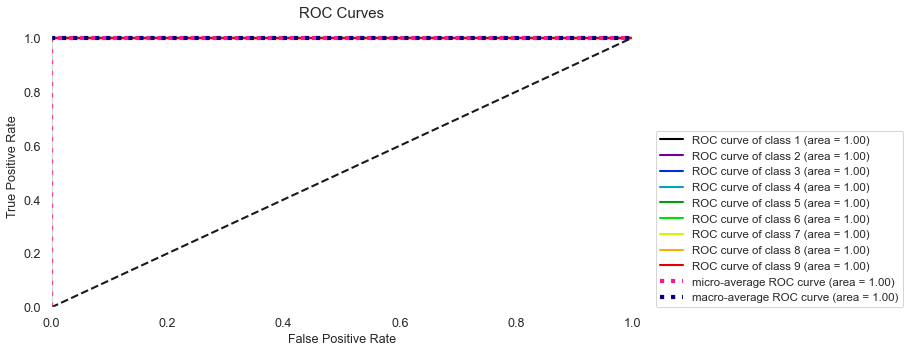

*=*=*=*=*= Gradient Boosting  Validation  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


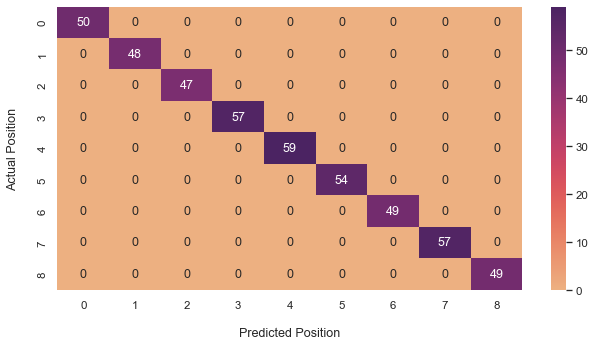


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        57
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        49
           8       1.00      1.00      1.00        57
           9       1.00      1.00      1.00        49

    accuracy                           1.00       470
   macro avg       1.00      1.00      1.00       470
weighted avg       1.00      1.00      1.00       470

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




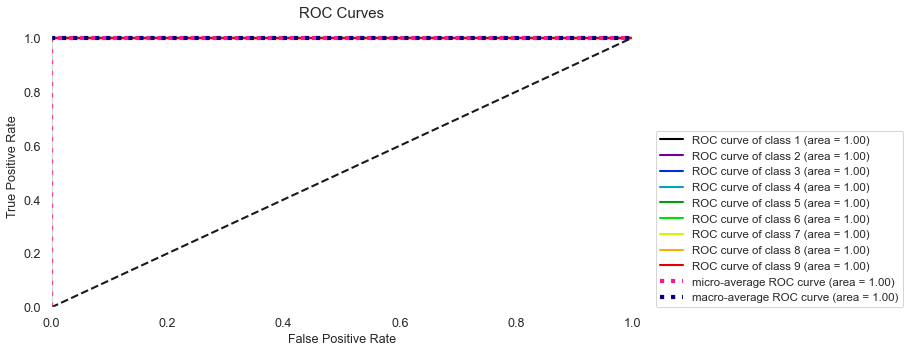

*=*=*=*=*=*=  Gradient Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


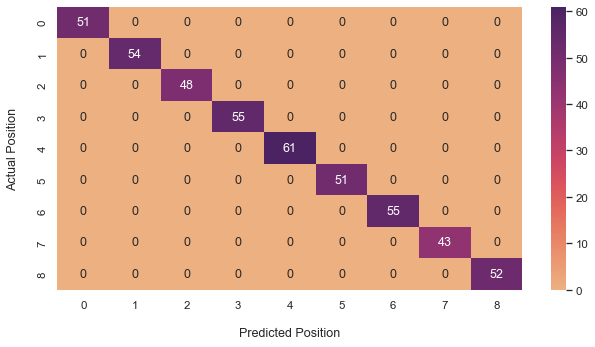


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        55
           5       1.00      1.00      1.00        61
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       1.00      1.00      1.00        52

    accuracy                           1.00       470
   macro avg       1.00      1.00      1.00       470
weighted avg       1.00      1.00      1.00       470

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




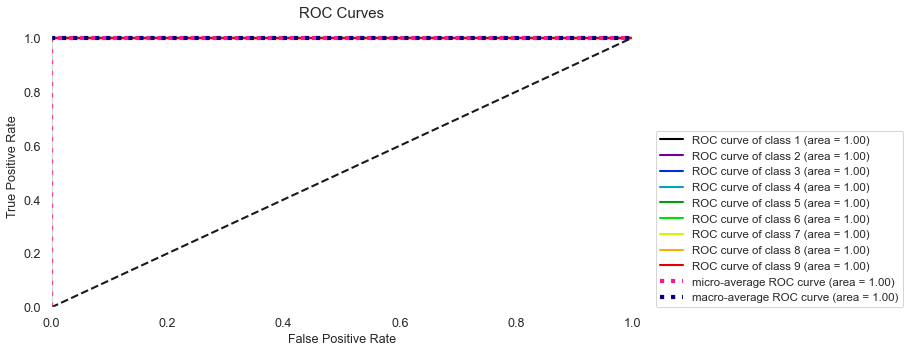

#############################################################################
                                XGBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  XGBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


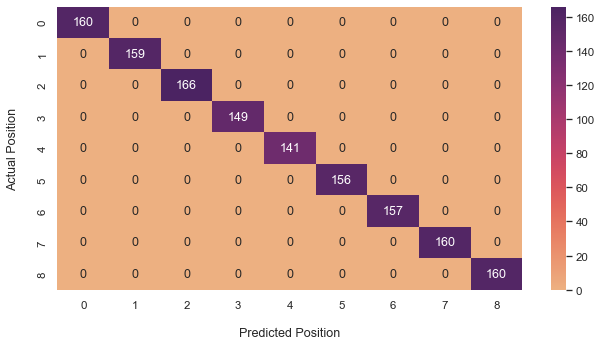


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       159
           3       1.00      1.00      1.00       166
           4       1.00      1.00      1.00       149
           5       1.00      1.00      1.00       141
           6       1.00      1.00      1.00       156
           7       1.00      1.00      1.00       157
           8       1.00      1.00      1.00       160
           9       1.00      1.00      1.00       160

    accuracy                           1.00      1408
   macro avg       1.00      1.00      1.00      1408
weighted avg       1.00      1.00      1.00      1408

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




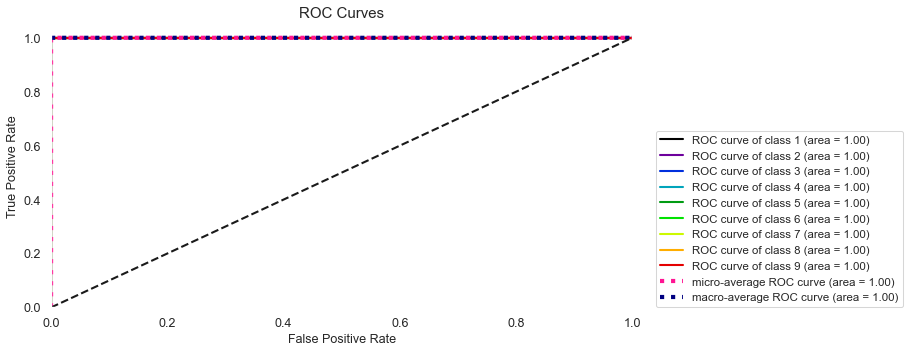

*=*=*=*=*=*=*=*=  XGBoost Validation  Dataset  Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


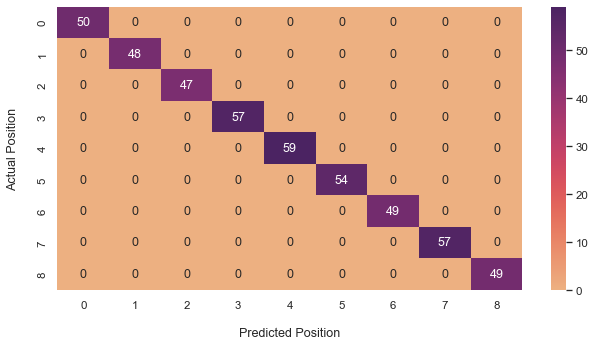


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        57
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        49
           8       1.00      1.00      1.00        57
           9       1.00      1.00      1.00        49

    accuracy                           1.00       470
   macro avg       1.00      1.00      1.00       470
weighted avg       1.00      1.00      1.00       470

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




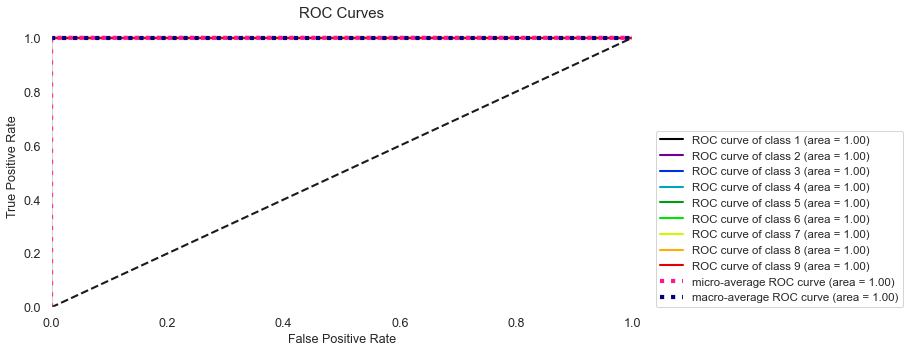

*=*=*=*=*=*=*=*=  XGBoost Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


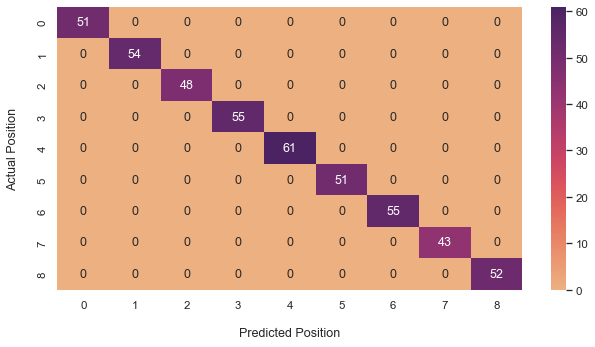


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        55
           5       1.00      1.00      1.00        61
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       1.00      1.00      1.00        52

    accuracy                           1.00       470
   macro avg       1.00      1.00      1.00       470
weighted avg       1.00      1.00      1.00       470

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




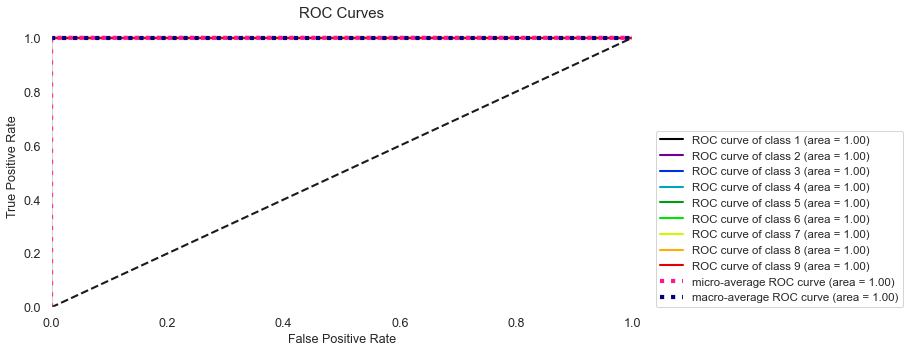

In [31]:
# Import Library
import numpy as np
import seaborn as sns
import scikitplot as skplt
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder 
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
 
from xgboost import XGBClassifier    
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, classification_report

plt.rcParams['figure.dpi'] = 75
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})


# Helper Function
def print_evaluate(true, predicted):
    acc = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    print(
        colored("==>",attrs=["bold"]),
        colored(" Accuracy: ","green",attrs=["bold"]),
        colored("{0:.2f} %".format(np.mean(acc)*100),attrs=['bold']) 
    )
    print(colored("\n\n Confusion Matrix: ","blue",attrs=["bold",'reverse', 'blink']))
    ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap='flare')
    ax.set_xlabel('\nPredicted Position')
    ax.set_ylabel('Actual Position\n')
    plt.show()
    print(colored("\n Classification Report: ","red",attrs=["bold",'reverse', 'blink']),'\n')
    print(colored(report,'yellow',attrs=['bold']))
    print(colored(38 *'*=',attrs=['bold']))
    # print('ROC-AUC score:',roc_auc_score(true, predicted))
    print('\n')
    
    

# Separate target from predictors
X = new_nine_runners_df_for_model.drop(['finishing_place'], axis=1)
y = new_nine_runners_df_for_model['finishing_place']


# Divide data into training and validation subsets
# X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.5, test_size=0.5,random_state=1)

# In the first step we will split the data in training and remaining dataset
X_train_full, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid_full, X_test_full, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [
    cname for cname in X_train_full.columns
    if X_train_full[cname].dtype == "object"
]


# Select numerical columns
numerical_cols = [
    cname for cname in X_train_full.columns 
    if X_train_full[cname].dtype in ['int64', 'float64']
]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()



# Handle Imbalance OverSampling
smote = SMOTE(random_state=1)


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Preprocessing for numerical data
numerical_transformer = Pipeline([
    ('std_scaler', PowerTransformer())
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


##############################################################################################################################################################
#                                                                        CatBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
cat_boost = CatBoostClassifier(silent=True)


# Create Pipeline
cat_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', cat_boost)
])

# Preprocessing of training data, fit model 
cat_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_cat_boost = cat_boost_pipeline.predict(X_train)
train_proba_cat_boost = cat_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_cat_boost = cat_boost_pipeline.predict(X_valid)
valid_proba_cat_boost = cat_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_cat_boost = cat_boost_pipeline.predict(X_test)
test_proba_cat_boost = cat_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m CatBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_cat_boost)
train_roc = roc_auc_score(y_train, train_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Validation  Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_cat_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(9 *'*=',attrs=['bold']),
    colored(' CatBoost Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(10 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_cat_boost)
test_roc = roc_auc_score(y_test, test_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                Gradient Boosting Classifier Classifier
##############################################################################################################################################################

# Simple Model Creation
gradient_boosting = GradientBoostingClassifier()


# Create Pipeline
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', gradient_boosting)
])

# Preprocessing of training data, fit model 
gradient_boosting_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_train)
train_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_valid)
valid_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)
test_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(27*' ', "\033[1;30;34m Gradient Boosting Classifier \033[0;0m", 27*" ")
print(77*'#')
print('')

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_gradient_boosting)
train_roc = roc_auc_score(y_train, train_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(5 *'*=',attrs=['bold']),
    colored('Gradient Boosting  Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_gradient_boosting)
valid_roc = roc_auc_score(y_valid, valid_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_gradient_boosting)
test_roc = roc_auc_score(y_test, test_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                     XGBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
xg_boost = XGBClassifier()


# Create Pipeline
xg_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', xg_boost)
])

# Preprocessing of training data, fit model 
xg_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_xg_boost = xg_boost_pipeline.predict(X_train)
train_proba_xg_boost = xg_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_xg_boost = xg_boost_pipeline.predict(X_valid)
valid_proba_xg_boost = xg_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_xg_boost = xg_boost_pipeline.predict(X_test)
test_proba_xg_boost = xg_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m XGBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_xg_boost)
train_roc = roc_auc_score(y_train, train_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_xg_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(7 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_xg_boost)
test_roc = roc_auc_score(y_test, test_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

#############################################################################
                                CatBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  CatBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


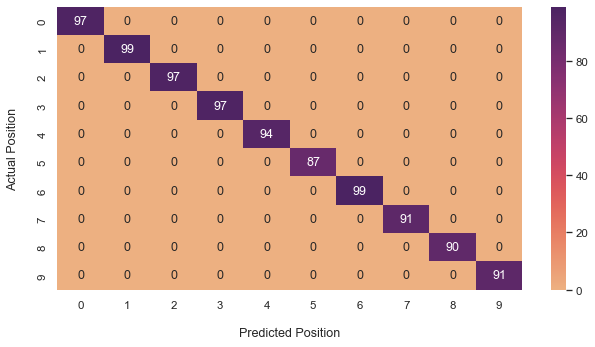


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00        99
           3       1.00      1.00      1.00        97
           4       1.00      1.00      1.00        97
           5       1.00      1.00      1.00        94
           6       1.00      1.00      1.00        87
           7       1.00      1.00      1.00        99
           8       1.00      1.00      1.00        91
           9       1.00      1.00      1.00        90
          10       1.00      1.00      1.00        91

    accuracy                           1.00       942
   macro avg       1.00      1.00      1.00       942
weighted avg       1.00      1.00      1.00       942

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




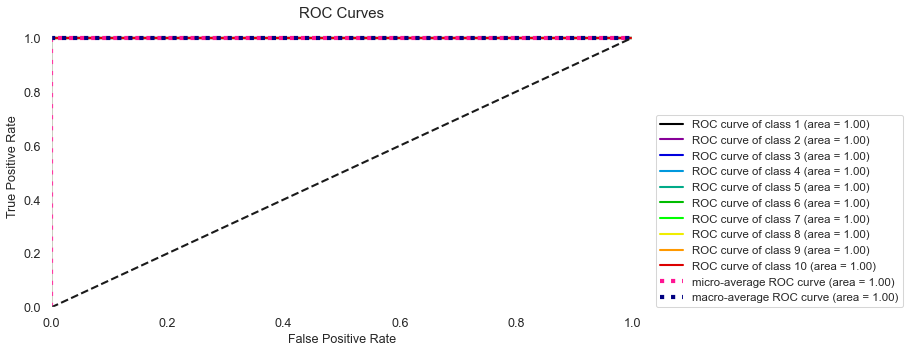

*=*=*=*=*=*=*=*=  CatBoost Validation  Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


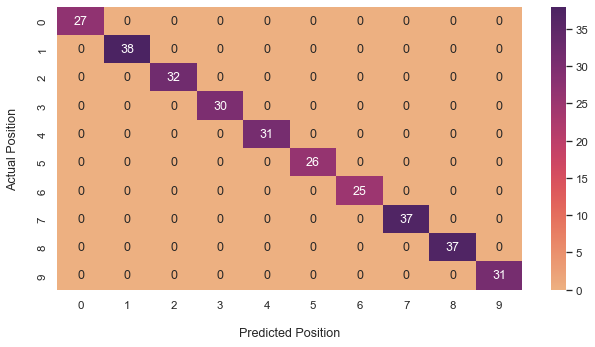


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00        37
          10       1.00      1.00      1.00        31

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




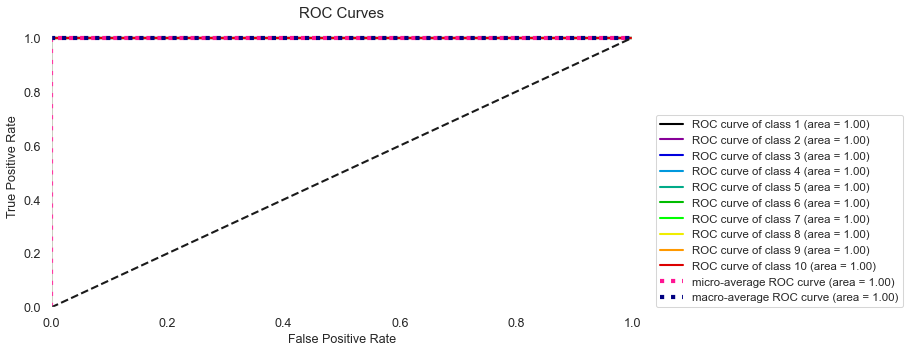

*=*=*=*=*=*=*=*=*=  CatBoost Test Dataset Evaluation:  *=*=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


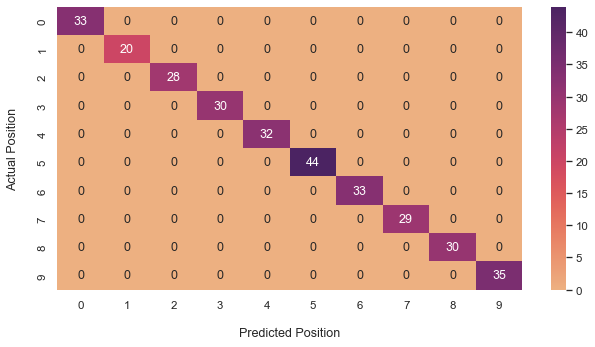


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        35

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




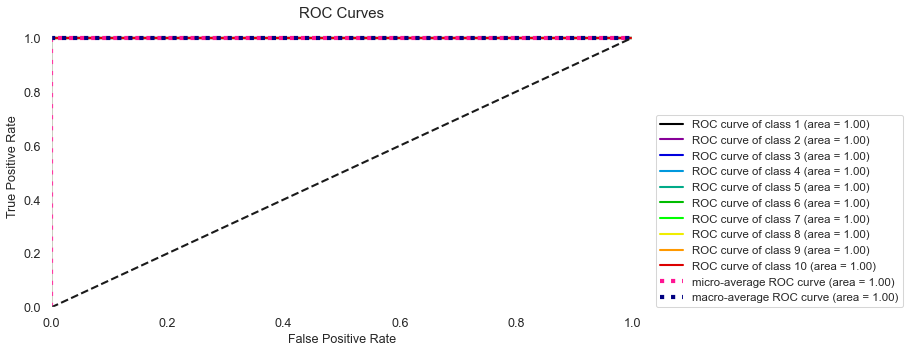

#############################################################################
                             Gradient Boosting Classifier                             
#############################################################################

*=*=*=*=*=*=  Gradient Boosting Training  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


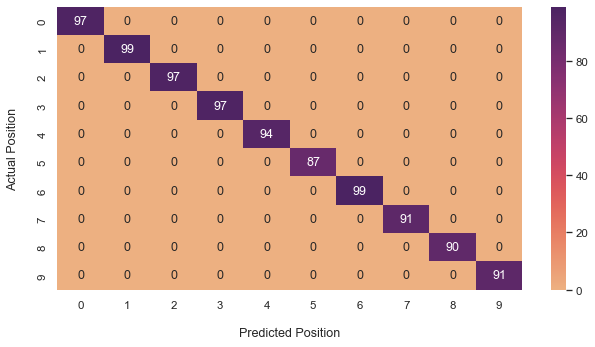


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00        99
           3       1.00      1.00      1.00        97
           4       1.00      1.00      1.00        97
           5       1.00      1.00      1.00        94
           6       1.00      1.00      1.00        87
           7       1.00      1.00      1.00        99
           8       1.00      1.00      1.00        91
           9       1.00      1.00      1.00        90
          10       1.00      1.00      1.00        91

    accuracy                           1.00       942
   macro avg       1.00      1.00      1.00       942
weighted avg       1.00      1.00      1.00       942

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




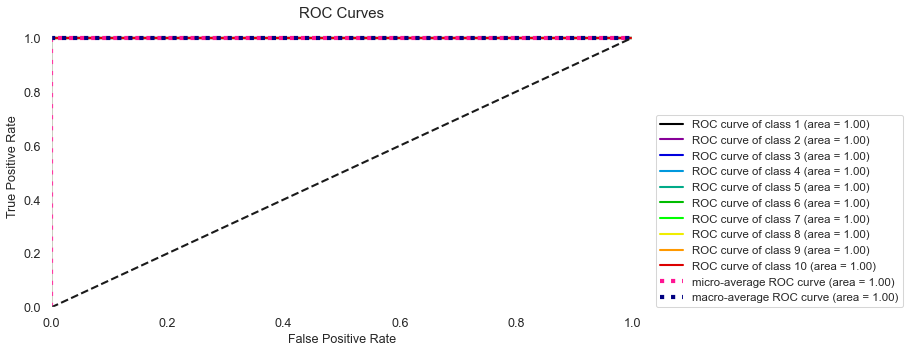

*=*=*=*=*= Gradient Boosting  Validation  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


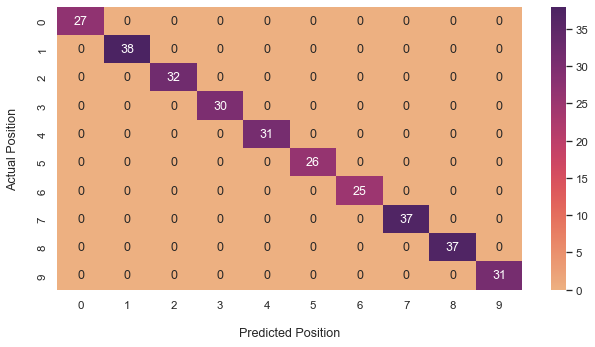


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00        37
          10       1.00      1.00      1.00        31

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




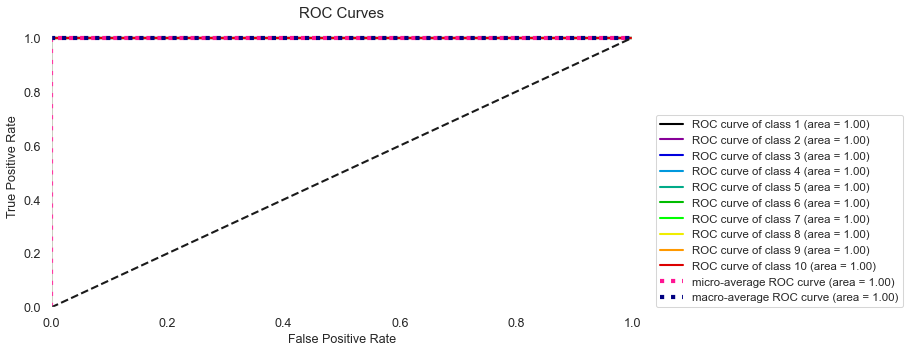

*=*=*=*=*=*=  Gradient Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


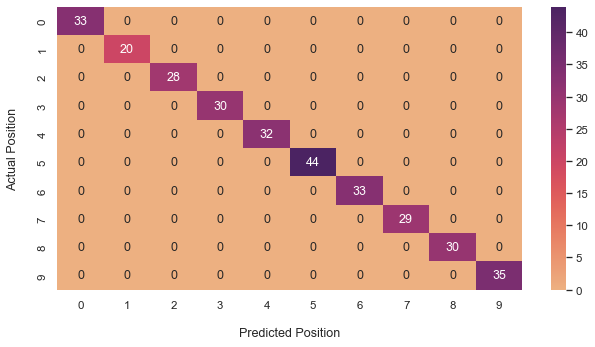


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        35

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




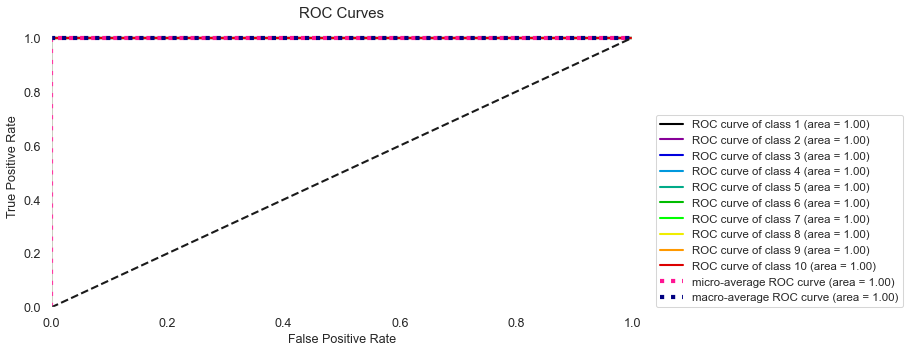

#############################################################################
                                XGBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  XGBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


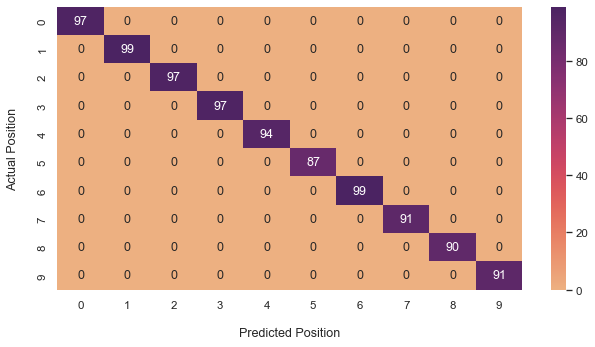


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00        99
           3       1.00      1.00      1.00        97
           4       1.00      1.00      1.00        97
           5       1.00      1.00      1.00        94
           6       1.00      1.00      1.00        87
           7       1.00      1.00      1.00        99
           8       1.00      1.00      1.00        91
           9       1.00      1.00      1.00        90
          10       1.00      1.00      1.00        91

    accuracy                           1.00       942
   macro avg       1.00      1.00      1.00       942
weighted avg       1.00      1.00      1.00       942

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




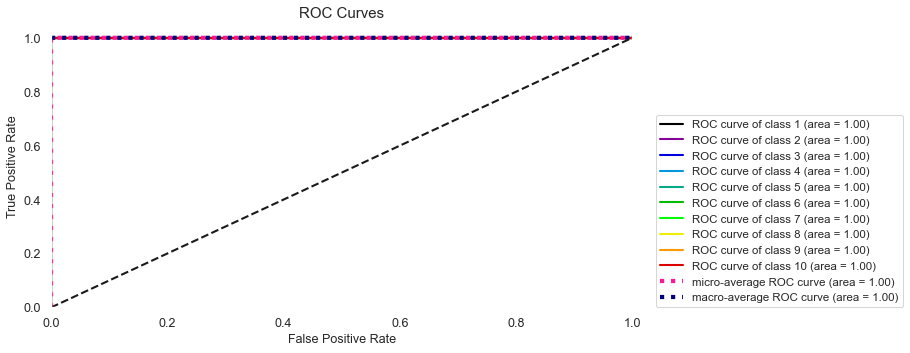

*=*=*=*=*=*=*=*=  XGBoost Validation  Dataset  Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


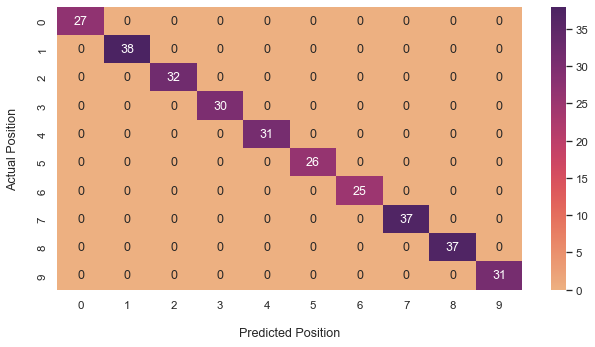


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00        37
          10       1.00      1.00      1.00        31

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




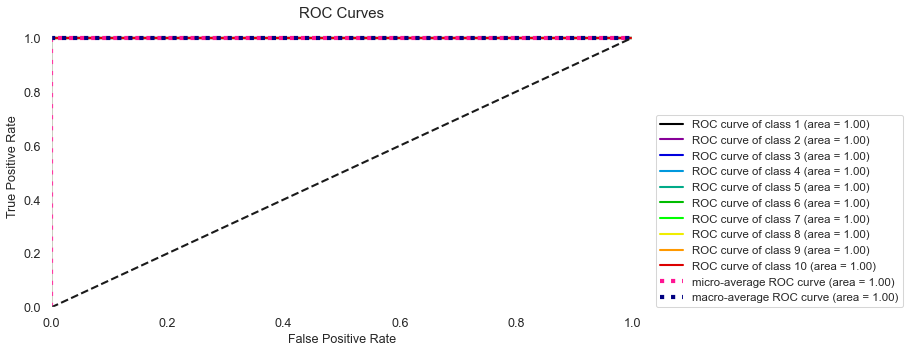

*=*=*=*=*=*=*=*=  XGBoost Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


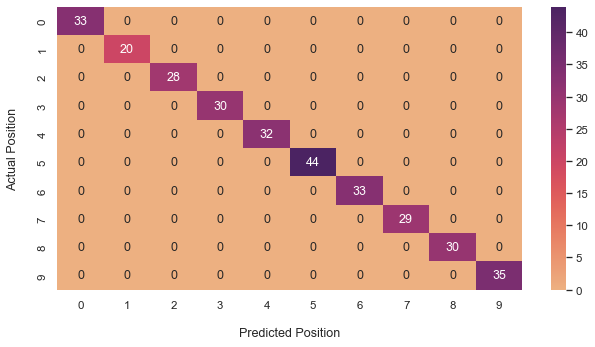


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        35

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




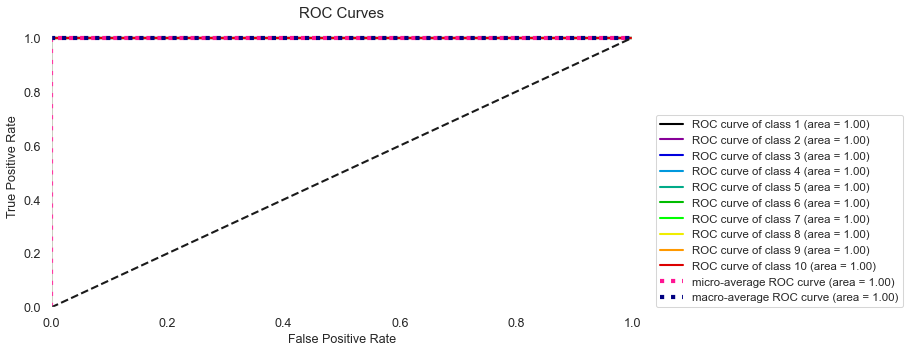

In [32]:
# Import Library
import numpy as np
import seaborn as sns
import scikitplot as skplt
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder 
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
 
from xgboost import XGBClassifier    
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, classification_report

plt.rcParams['figure.dpi'] = 75
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})


# Helper Function
def print_evaluate(true, predicted):
    acc = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    print(
        colored("==>",attrs=["bold"]),
        colored(" Accuracy: ","green",attrs=["bold"]),
        colored("{0:.2f} %".format(np.mean(acc)*100),attrs=['bold']) 
    )
    print(colored("\n\n Confusion Matrix: ","blue",attrs=["bold",'reverse', 'blink']))
    ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap='flare')
    ax.set_xlabel('\nPredicted Position')
    ax.set_ylabel('Actual Position\n')
    plt.show()
    print(colored("\n Classification Report: ","red",attrs=["bold",'reverse', 'blink']),'\n')
    print(colored(report,'yellow',attrs=['bold']))
    print(colored(38 *'*=',attrs=['bold']))
    # print('ROC-AUC score:',roc_auc_score(true, predicted))
    print('\n')
    
    

# Separate target from predictors
X = new_ten_runners_df_for_model.drop(['finishing_place'], axis=1)
y = new_ten_runners_df_for_model['finishing_place']


# Divide data into training and validation subsets
# X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=1)

# In the first step we will split the data in training and remaining dataset
X_train_full, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid_full, X_test_full, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [
    cname for cname in X_train_full.columns
    if X_train_full[cname].dtype == "object"
]


# Select numerical columns
numerical_cols = [
    cname for cname in X_train_full.columns 
    if X_train_full[cname].dtype in ['int64', 'float64']
]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


# Handle Imbalance OverSampling
smote = SMOTE(random_state=1)


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Preprocessing for numerical data
numerical_transformer = Pipeline([
    ('std_scaler', PowerTransformer())
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


##############################################################################################################################################################
#                                                                        CatBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
cat_boost = CatBoostClassifier(silent=True)


# Create Pipeline
cat_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', cat_boost)
])

# Preprocessing of training data, fit model 
cat_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_cat_boost = cat_boost_pipeline.predict(X_train)
train_proba_cat_boost = cat_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_cat_boost = cat_boost_pipeline.predict(X_valid)
valid_proba_cat_boost = cat_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_cat_boost = cat_boost_pipeline.predict(X_test)
test_proba_cat_boost = cat_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m CatBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_cat_boost)
train_roc = roc_auc_score(y_train, train_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Validation  Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_cat_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(9 *'*=',attrs=['bold']),
    colored(' CatBoost Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(10 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_cat_boost)
test_roc = roc_auc_score(y_test, test_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                Gradient Boosting Classifier Classifier
##############################################################################################################################################################

# Simple Model Creation
gradient_boosting = GradientBoostingClassifier()


# Create Pipeline
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', gradient_boosting)
])

# Preprocessing of training data, fit model 
gradient_boosting_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_train)
train_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_valid)
valid_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)
test_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(27*' ', "\033[1;30;34m Gradient Boosting Classifier \033[0;0m", 27*" ")
print(77*'#')
print('')

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_gradient_boosting)
train_roc = roc_auc_score(y_train, train_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(5 *'*=',attrs=['bold']),
    colored('Gradient Boosting  Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_gradient_boosting)
valid_roc = roc_auc_score(y_valid, valid_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_gradient_boosting)
test_roc = roc_auc_score(y_test, test_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                     XGBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
xg_boost = XGBClassifier()


# Create Pipeline
xg_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', xg_boost)
])

# Preprocessing of training data, fit model 
xg_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_xg_boost = xg_boost_pipeline.predict(X_train)
train_proba_xg_boost = xg_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_xg_boost = xg_boost_pipeline.predict(X_valid)
valid_proba_xg_boost = xg_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_xg_boost = xg_boost_pipeline.predict(X_test)
test_proba_xg_boost = xg_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m XGBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_xg_boost)
train_roc = roc_auc_score(y_train, train_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_xg_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(7 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_xg_boost)
test_roc = roc_auc_score(y_test, test_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

In [33]:
# new_ddf = ddf[[
#     'track_id','jockey','race_type','furlongs',
#     'course_type','track_condition','season','weight_carried',
#     'american_odds','finishing_place'
# ]]

In [34]:
# new = new_ddf.drop_duplicates().reset_index()

In [35]:
# new.loc[(new['finishing_place'] == 1), 'finishing_place'] = 1
# new.loc[(new['finishing_place'] == 2), 'finishing_place'] = 1
# new.loc[(new['finishing_place'] == 3), 'finishing_place'] = 1

# new.loc[(new['finishing_place'] == 4), 'finishing_place'] = 0
# new.loc[(new['finishing_place'] == 5), 'finishing_place'] = 0
# new.loc[(new['finishing_place'] == 6), 'finishing_place'] = 0
# new.loc[(new['finishing_place'] == 7), 'finishing_place'] = 0
# new.loc[(new['finishing_place'] == 8), 'finishing_place'] = 0
# new.loc[(new['finishing_place'] == 9), 'finishing_place'] = 0
# new.loc[(new['finishing_place'] == 10), 'finishing_place'] = 0
# new.loc[(new['finishing_place'] == 11), 'finishing_place'] = 0
# new.loc[(new['finishing_place'] == 12), 'finishing_place'] = 0
# new.loc[(new['finishing_place'] == 13), 'finishing_place'] = 0
# new.loc[(new['finishing_place'] == 14), 'finishing_place'] = 0

# new.finishing_place.value_counts()

#############################################################################
                                CatBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  CatBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  99.92 %


 Confusion Matrix: 


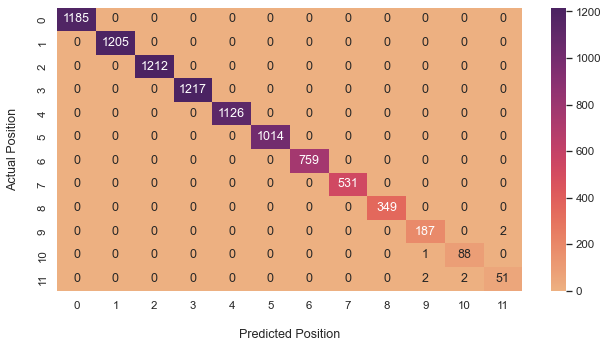


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1185
           2       1.00      1.00      1.00      1205
           3       1.00      1.00      1.00      1212
           4       1.00      1.00      1.00      1217
           5       1.00      1.00      1.00      1126
           6       1.00      1.00      1.00      1014
           7       1.00      1.00      1.00       759
           8       1.00      1.00      1.00       531
           9       1.00      1.00      1.00       349
          10       0.98      0.99      0.99       189
          11       0.98      0.99      0.98        89
          12       0.96      0.93      0.94        55

    accuracy                           1.00      8931
   macro avg       0.99      0.99      0.99      8931
weighted avg       1.00      1.00      1.00      8931

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




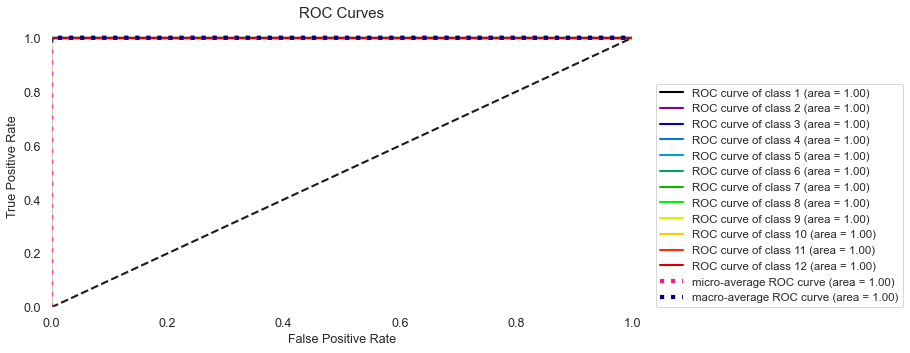

*=*=*=*=*=*=*=*=  CatBoost Validation  Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  98.15 %


 Confusion Matrix: 


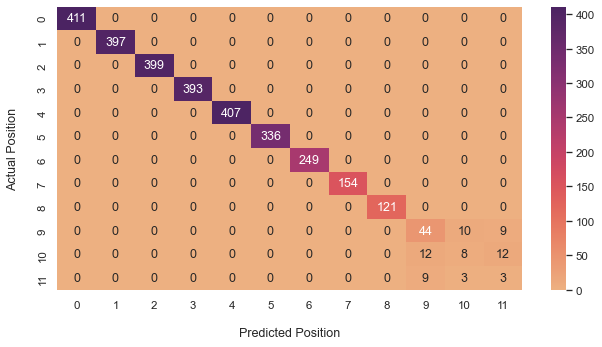


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       411
           2       1.00      1.00      1.00       397
           3       1.00      1.00      1.00       399
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       407
           6       1.00      1.00      1.00       336
           7       1.00      1.00      1.00       249
           8       1.00      1.00      1.00       154
           9       1.00      1.00      1.00       121
          10       0.68      0.70      0.69        63
          11       0.38      0.25      0.30        32
          12       0.12      0.20      0.15        15

    accuracy                           0.98      2977
   macro avg       0.85      0.85      0.85      2977
weighted avg       0.98      0.98      0.98      2977

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




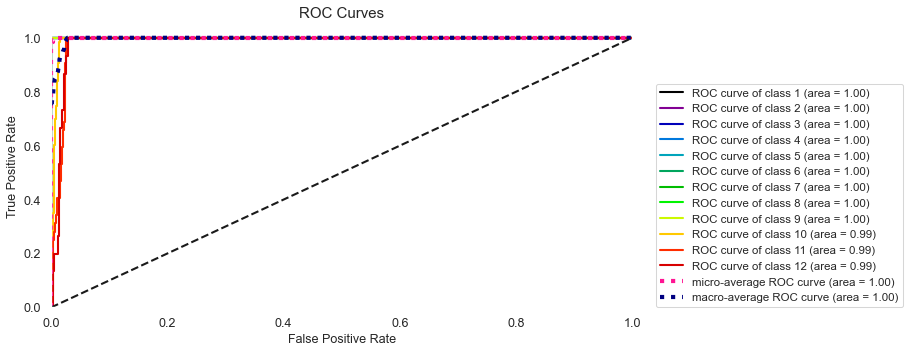

*=*=*=*=*=*=*=*=*=  CatBoost Test Dataset Evaluation:  *=*=*=*=*=*=*=*=*=*= 

==>  Accuracy:  98.09 %


 Confusion Matrix: 


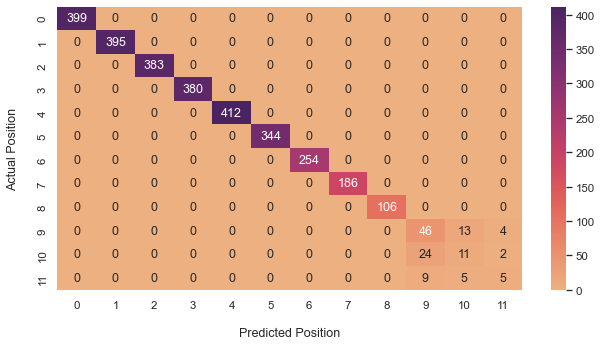


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       399
           2       1.00      1.00      1.00       395
           3       1.00      1.00      1.00       383
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       412
           6       1.00      1.00      1.00       344
           7       1.00      1.00      1.00       254
           8       1.00      1.00      1.00       186
           9       1.00      1.00      1.00       106
          10       0.58      0.73      0.65        63
          11       0.38      0.30      0.33        37
          12       0.45      0.26      0.33        19

    accuracy                           0.98      2978
   macro avg       0.87      0.86      0.86      2978
weighted avg       0.98      0.98      0.98      2978

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




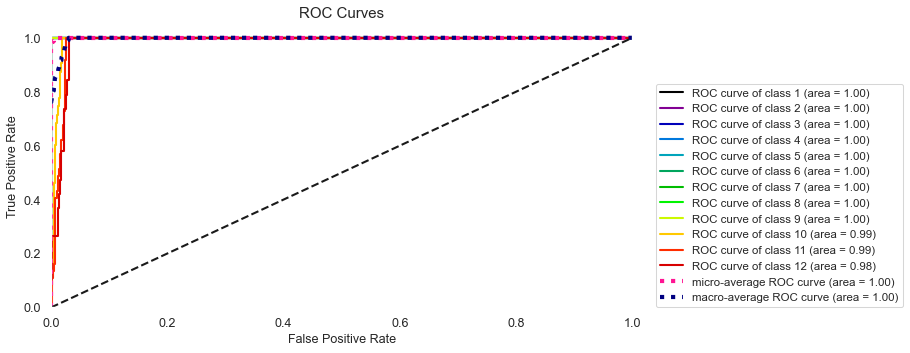

#############################################################################
                             Gradient Boosting Classifier                             
#############################################################################

*=*=*=*=*=*=  Gradient Boosting Training  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  99.00 %


 Confusion Matrix: 


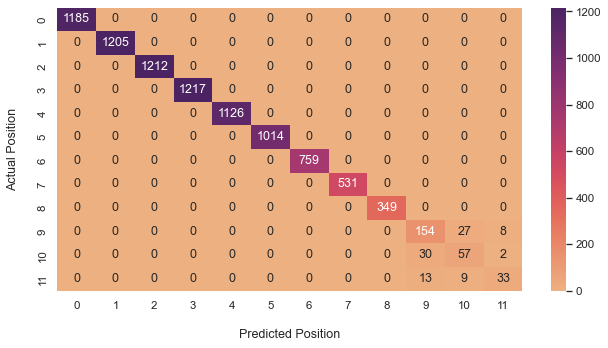


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1185
           2       1.00      1.00      1.00      1205
           3       1.00      1.00      1.00      1212
           4       1.00      1.00      1.00      1217
           5       1.00      1.00      1.00      1126
           6       1.00      1.00      1.00      1014
           7       1.00      1.00      1.00       759
           8       1.00      1.00      1.00       531
           9       1.00      1.00      1.00       349
          10       0.78      0.81      0.80       189
          11       0.61      0.64      0.63        89
          12       0.77      0.60      0.67        55

    accuracy                           0.99      8931
   macro avg       0.93      0.92      0.92      8931
weighted avg       0.99      0.99      0.99      8931

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




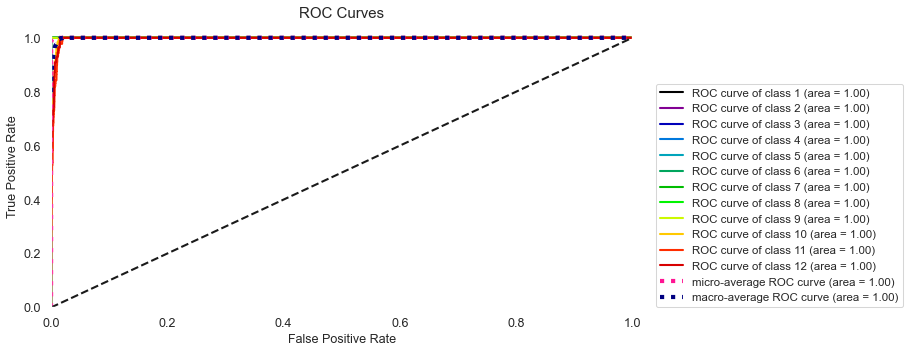

*=*=*=*=*= Gradient Boosting  Validation  Dataset  Evaluation:  *=*=*=*=*=*= 

==>  Accuracy:  98.02 %


 Confusion Matrix: 


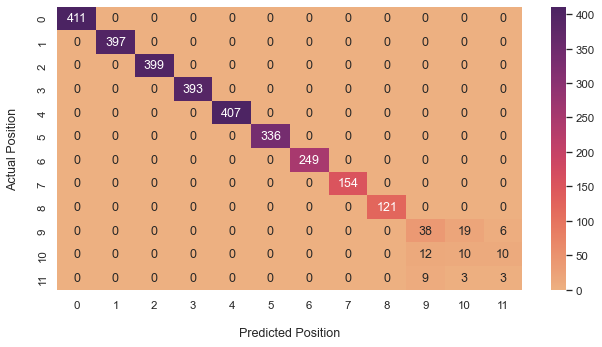


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       411
           2       1.00      1.00      1.00       397
           3       1.00      1.00      1.00       399
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       407
           6       1.00      1.00      1.00       336
           7       1.00      1.00      1.00       249
           8       1.00      1.00      1.00       154
           9       1.00      1.00      1.00       121
          10       0.64      0.60      0.62        63
          11       0.31      0.31      0.31        32
          12       0.16      0.20      0.18        15

    accuracy                           0.98      2977
   macro avg       0.84      0.84      0.84      2977
weighted avg       0.98      0.98      0.98      2977

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




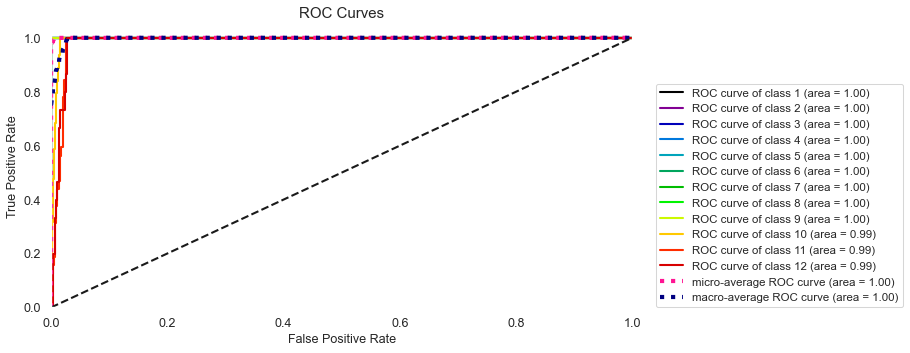

*=*=*=*=*=*=  Gradient Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  98.02 %


 Confusion Matrix: 


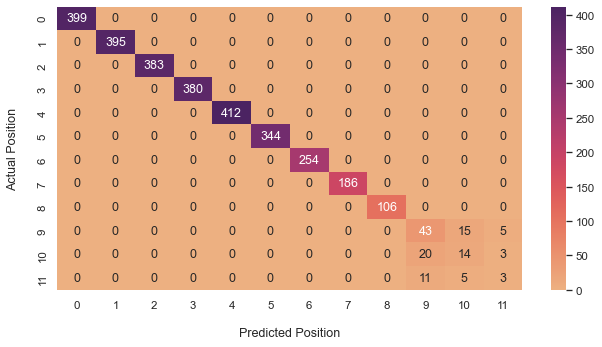


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       399
           2       1.00      1.00      1.00       395
           3       1.00      1.00      1.00       383
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       412
           6       1.00      1.00      1.00       344
           7       1.00      1.00      1.00       254
           8       1.00      1.00      1.00       186
           9       1.00      1.00      1.00       106
          10       0.58      0.68      0.63        63
          11       0.41      0.38      0.39        37
          12       0.27      0.16      0.20        19

    accuracy                           0.98      2978
   macro avg       0.86      0.85      0.85      2978
weighted avg       0.98      0.98      0.98      2978

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




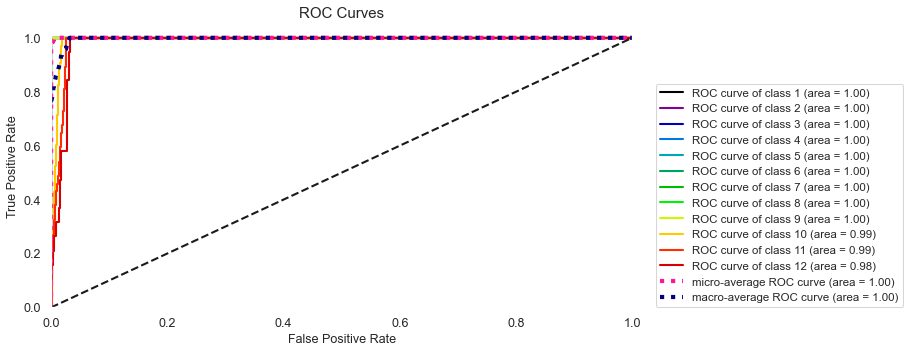

#############################################################################
                                XGBoost Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  XGBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  98.72 %


 Confusion Matrix: 


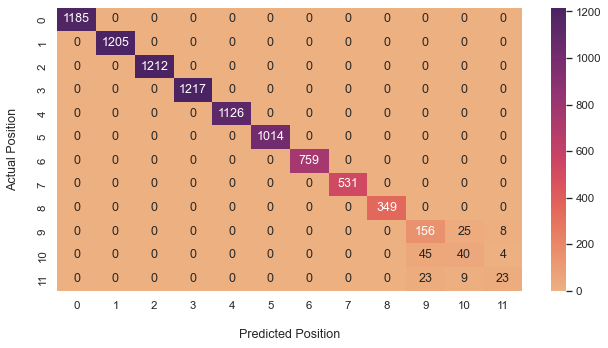


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1185
           2       1.00      1.00      1.00      1205
           3       1.00      1.00      1.00      1212
           4       1.00      1.00      1.00      1217
           5       1.00      1.00      1.00      1126
           6       1.00      1.00      1.00      1014
           7       1.00      1.00      1.00       759
           8       1.00      1.00      1.00       531
           9       1.00      1.00      1.00       349
          10       0.70      0.83      0.76       189
          11       0.54      0.45      0.49        89
          12       0.66      0.42      0.51        55

    accuracy                           0.99      8931
   macro avg       0.91      0.89      0.90      8931
weighted avg       0.99      0.99      0.99      8931

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




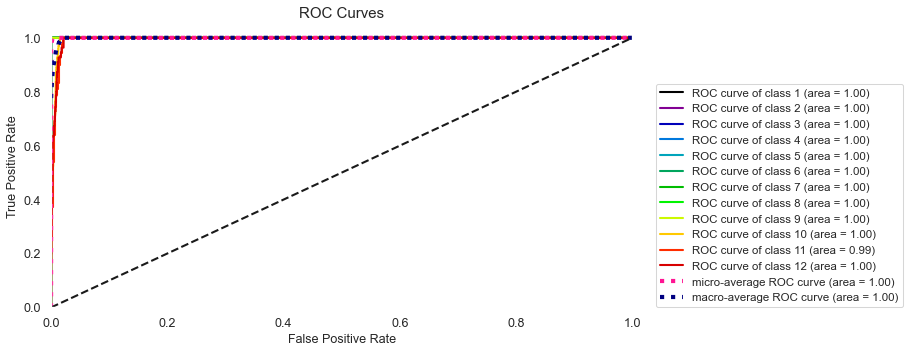

*=*=*=*=*=*=*=*=  XGBoost Validation  Dataset  Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  98.05 %


 Confusion Matrix: 


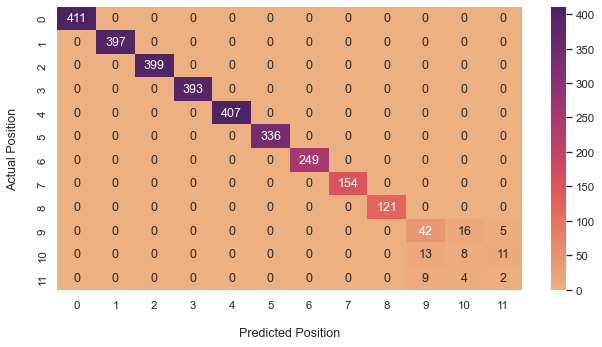


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       411
           2       1.00      1.00      1.00       397
           3       1.00      1.00      1.00       399
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       407
           6       1.00      1.00      1.00       336
           7       1.00      1.00      1.00       249
           8       1.00      1.00      1.00       154
           9       1.00      1.00      1.00       121
          10       0.66      0.67      0.66        63
          11       0.29      0.25      0.27        32
          12       0.11      0.13      0.12        15

    accuracy                           0.98      2977
   macro avg       0.84      0.84      0.84      2977
weighted avg       0.98      0.98      0.98      2977

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




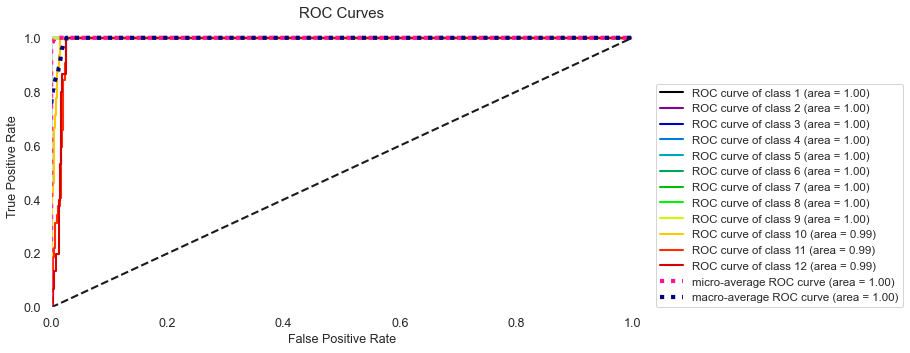

*=*=*=*=*=*=*=*=  XGBoost Boosting  Test Dataset Evaluation:  *=*=*=*=*=*=*= 

==>  Accuracy:  98.02 %


 Confusion Matrix: 


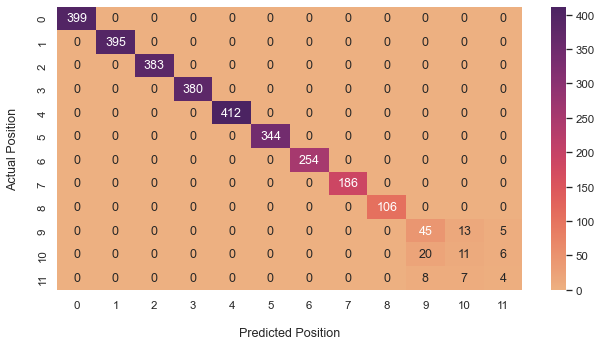


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       399
           2       1.00      1.00      1.00       395
           3       1.00      1.00      1.00       383
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       412
           6       1.00      1.00      1.00       344
           7       1.00      1.00      1.00       254
           8       1.00      1.00      1.00       186
           9       1.00      1.00      1.00       106
          10       0.62      0.71      0.66        63
          11       0.35      0.30      0.32        37
          12       0.27      0.21      0.24        19

    accuracy                           0.98      2978
   macro avg       0.85      0.85      0.85      2978
weighted avg       0.98      0.98      0.98      2978

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




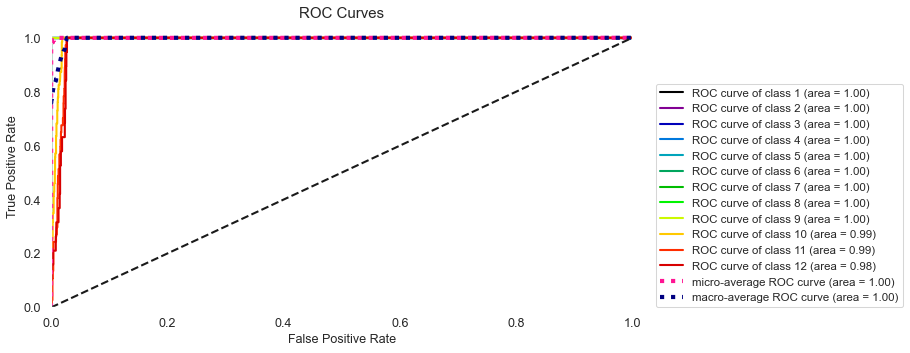

In [36]:
# Import Library
import numpy as np
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder 
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
 
from xgboost import XGBClassifier    
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, classification_report

plt.rcParams['figure.dpi'] = 75
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})


# Helper Function
def print_evaluate(true, predicted):
    acc = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    print(
        colored("==>",attrs=["bold"]),
        colored(" Accuracy: ","green",attrs=["bold"]),
        colored("{0:.2f} %".format(np.mean(acc)*100),attrs=['bold']) 
    )
    print(colored("\n\n Confusion Matrix: ","blue",attrs=["bold",'reverse', 'blink']))
    ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap='flare')
    ax.set_xlabel('\nPredicted Position')
    ax.set_ylabel('Actual Position\n')
    plt.show()
    print(colored("\n Classification Report: ","red",attrs=["bold",'reverse', 'blink']),'\n')
    print(colored(report,'yellow',attrs=['bold']))
    print(colored(38 *'*=',attrs=['bold']))
    # print('ROC-AUC score:',roc_auc_score(true, predicted))
    print('\n')
    
    

# Separate target from predictors
X = new_whole_df_for_model.drop(['finishing_place'], axis=1)
y = new_whole_df_for_model['finishing_place']


# Divide data into training, validation, and Testing subsets
# In the first step we will split the data in training and remaining dataset
X_train_full, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid_full, X_test_full, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [
    cname for cname in X_train_full.columns
    if X_train_full[cname].dtype == "object"
]


# Select numerical columns
numerical_cols = [
    cname for cname in X_train_full.columns 
    if X_train_full[cname].dtype in ['int64', 'float64']
]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


# Handle Imbalance OverSampling
smote = SMOTE(random_state=1)


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Preprocessing for numerical data
numerical_transformer = Pipeline([
    ('std_scaler', PowerTransformer())
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


##############################################################################################################################################################
#                                                                        CatBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
cat_boost = CatBoostClassifier(silent=True)


# Create Pipeline
cat_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', cat_boost)
])

# Preprocessing of training data, fit model 
cat_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_cat_boost = cat_boost_pipeline.predict(X_train)
train_proba_cat_boost = cat_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_cat_boost = cat_boost_pipeline.predict(X_valid)
valid_proba_cat_boost = cat_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_cat_boost = cat_boost_pipeline.predict(X_test)
test_proba_cat_boost = cat_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m CatBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_cat_boost)
train_roc = roc_auc_score(y_train, train_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Validation  Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_cat_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(9 *'*=',attrs=['bold']),
    colored(' CatBoost Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(10 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_cat_boost)
test_roc = roc_auc_score(y_test, test_proba_cat_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_cat_boost)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                Gradient Boosting Classifier Classifier
##############################################################################################################################################################

# Simple Model Creation
gradient_boosting = GradientBoostingClassifier()


# Create Pipeline
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', gradient_boosting)
])

# Preprocessing of training data, fit model 
gradient_boosting_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_train)
train_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_valid)
valid_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)
test_proba_gradient_boosting = gradient_boosting_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(27*' ', "\033[1;30;34m Gradient Boosting Classifier \033[0;0m", 27*" ")
print(77*'#')
print('')

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_gradient_boosting)
train_roc = roc_auc_score(y_train, train_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(5 *'*=',attrs=['bold']),
    colored('Gradient Boosting  Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(6 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_gradient_boosting)
valid_roc = roc_auc_score(y_valid, valid_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(6 *'*=',attrs=['bold']),
    colored(' Gradient Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_gradient_boosting)
test_roc = roc_auc_score(y_test, test_proba_gradient_boosting,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_gradient_boosting)
plt.legend(loc=(1.04,0))
plt.show()


##############################################################################################################################################################
#                                                                     XGBoost Classifier
##############################################################################################################################################################

# Simple Model Creation
xg_boost = XGBClassifier()


# Create Pipeline
xg_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', xg_boost)
])

# Preprocessing of training data, fit model 
xg_boost_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_xg_boost = xg_boost_pipeline.predict(X_train)
train_proba_xg_boost = xg_boost_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_xg_boost = xg_boost_pipeline.predict(X_valid)
valid_proba_xg_boost = xg_boost_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_xg_boost = xg_boost_pipeline.predict(X_test)
test_proba_xg_boost = xg_boost_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m XGBoost Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_xg_boost)
train_roc = roc_auc_score(y_train, train_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Validation  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_xg_boost)
valid_roc = roc_auc_score(y_valid, valid_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' XGBoost Boosting  Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(7 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_xg_boost)
test_roc = roc_auc_score(y_test, test_proba_xg_boost,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_xg_boost)
plt.legend(loc=(1.04,0))
plt.show()

#############################################################################
                                Random Forest Classifier                                
#############################################################################

*=*=*=*=*=*=*=*=  CatBoost Training  Dataset  Evaluation:  *=*=*=*=*=*=*=*=*= 

==>  Accuracy:  100.00 %


 Confusion Matrix: 


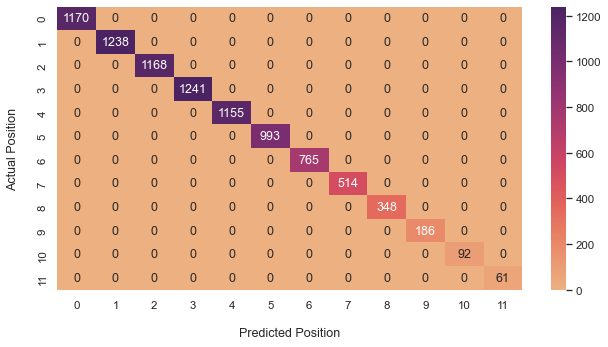


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1170
           2       1.00      1.00      1.00      1238
           3       1.00      1.00      1.00      1168
           4       1.00      1.00      1.00      1241
           5       1.00      1.00      1.00      1155
           6       1.00      1.00      1.00       993
           7       1.00      1.00      1.00       765
           8       1.00      1.00      1.00       514
           9       1.00      1.00      1.00       348
          10       1.00      1.00      1.00       186
          11       1.00      1.00      1.00        92
          12       1.00      1.00      1.00        61

    accuracy                           1.00      8931
   macro avg       1.00      1.00      1.00      8931
weighted avg       1.00      1.00      1.00      8931

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




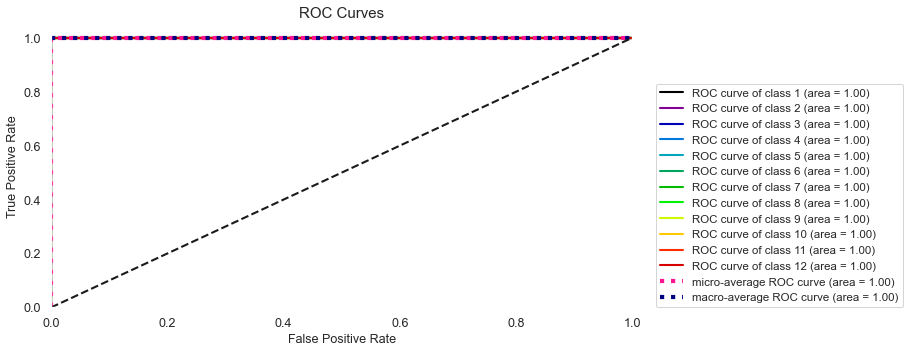

*=*=*=*=*=*=*=*=  CatBoost Validation  Dataset Evaluation:  *=*=*=*=*=*=*=*= 

==>  Accuracy:  84.28 %


 Confusion Matrix: 


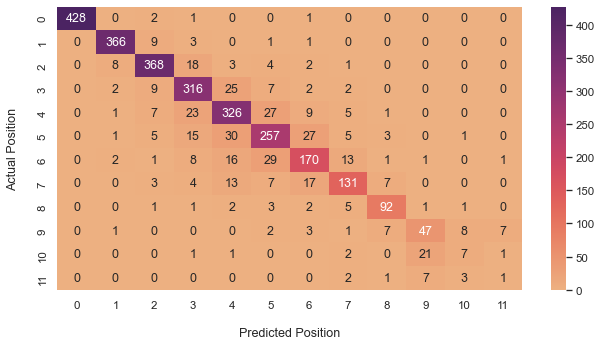


 Classification Report:  

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       432
           2       0.96      0.96      0.96       380
           3       0.91      0.91      0.91       404
           4       0.81      0.87      0.84       363
           5       0.78      0.82      0.80       399
           6       0.76      0.75      0.75       344
           7       0.73      0.70      0.71       242
           8       0.78      0.72      0.75       182
           9       0.82      0.85      0.84       108
          10       0.61      0.62      0.61        76
          11       0.35      0.21      0.26        33
          12       0.10      0.07      0.08        14

    accuracy                           0.84      2977
   macro avg       0.72      0.71      0.71      2977
weighted avg       0.84      0.84      0.84      2977

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




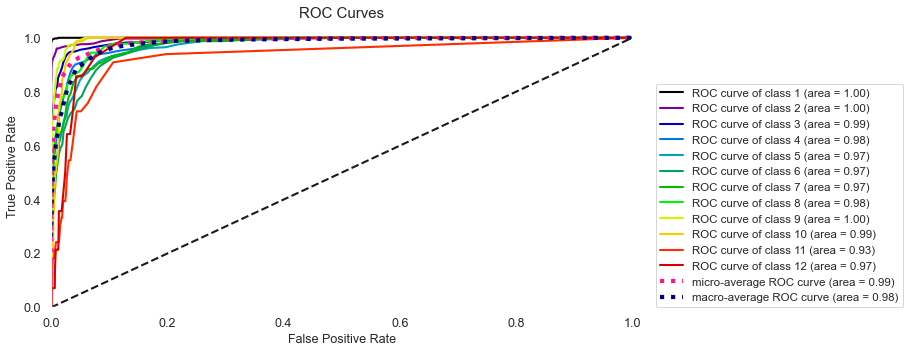

*=*=*=*=*=*=*=*=*=  CatBoost Test Dataset Evaluation:  *=*=*=*=*=*=*=*=*=*= 

==>  Accuracy:  83.55 %


 Confusion Matrix: 


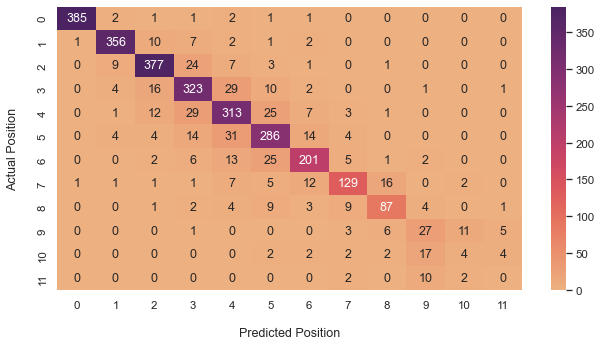


 Classification Report:  

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       393
           2       0.94      0.94      0.94       379
           3       0.89      0.89      0.89       422
           4       0.79      0.84      0.81       386
           5       0.77      0.80      0.78       391
           6       0.78      0.80      0.79       357
           7       0.82      0.79      0.80       255
           8       0.82      0.74      0.78       175
           9       0.76      0.72      0.74       120
          10       0.44      0.51      0.47        53
          11       0.21      0.12      0.15        33
          12       0.00      0.00      0.00        14

    accuracy                           0.84      2978
   macro avg       0.69      0.68      0.68      2978
weighted avg       0.83      0.84      0.83      2978

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=




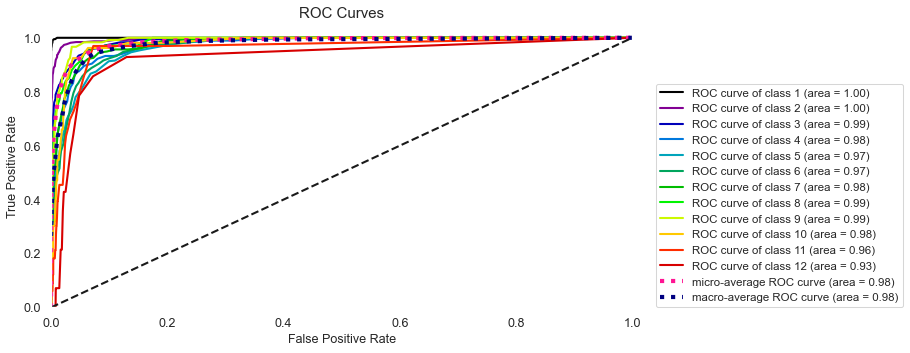

In [37]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder 
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
 
from xgboost import XGBClassifier    
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, classification_report

plt.rcParams['figure.dpi'] = 75
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})


# Helper Function
def print_evaluate(true, predicted):
    acc = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    print(
        colored("==>",attrs=["bold"]),
        colored(" Accuracy: ","green",attrs=["bold"]),
        colored("{0:.2f} %".format(np.mean(acc)*100),attrs=['bold']) 
    )
    print(colored("\n\n Confusion Matrix: ","blue",attrs=["bold",'reverse', 'blink']))
    ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap='flare')
    ax.set_xlabel('\nPredicted Position')
    ax.set_ylabel('Actual Position\n')
    plt.show()
    print(colored("\n Classification Report: ","red",attrs=["bold",'reverse', 'blink']),'\n')
    print(colored(report,'yellow',attrs=['bold']))
    print(colored(38 *'*=',attrs=['bold']))
    # print('ROC-AUC score:',roc_auc_score(true, predicted))
    print('\n')
    
    

# Separate target from predictors
X = new_whole_df_for_model.drop(['finishing_place'], axis=1)
y = new_whole_df_for_model['finishing_place']


# Divide data into training, validation, and Testing subsets
# In the first step we will split the data in training and remaining dataset
X_train_full, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid_full, X_test_full, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [
    cname for cname in X_train_full.columns
    if X_train_full[cname].dtype == "object"
]


# Select numerical columns
numerical_cols = [
    cname for cname in X_train_full.columns 
    if X_train_full[cname].dtype in ['int64', 'float64']
]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


# Handle Imbalance OverSampling
smote = SMOTE(random_state=1)


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Preprocessing for numerical data
numerical_transformer = Pipeline([
    ('std_scaler', PowerTransformer())
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


##############################################################################################################################################################
#                                                                      Random Forest Classifier 
##############################################################################################################################################################

# Simple Model Creation
random_forest_classifier = RandomForestClassifier(n_estimators=100,n_jobs=-1, verbose=0)


# Create Pipeline
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('over',smote),
    ('model', random_forest_classifier)
])

# Preprocessing of training data, fit model 
random_forest_pipeline.fit(X_train, y_train)

# Preprocessing of training data, get predictions
train_pred_random_forest = random_forest_pipeline.predict(X_train)
train_proba_random_forest = random_forest_pipeline.predict_proba(X_train)

# Preprocessing of validation data, get predictions
valid_pred_random_forest = random_forest_pipeline.predict(X_valid)
valid_proba_random_forest = random_forest_pipeline.predict_proba(X_valid)

# Preprocessing of validation data, get predictions
test_pred_random_forest = random_forest_pipeline.predict(X_test)
test_proba_random_forest = random_forest_pipeline.predict_proba(X_test)

# Evaluation on Training and Validation Dataset
print(77*'#')
print(30*' ', "\033[1;30;34m Random Forest Classifier \033[0;0m", 30*" ")
print(77*'#')
print('')

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Training  Dataset  Evaluation: ','cyan',attrs=['bold']),
    colored(9 *'*=',attrs=['bold']),
    '\n'
)

print_evaluate(y_train, train_pred_random_forest)
train_roc = roc_auc_score(y_train, train_proba_random_forest,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_train, train_proba_random_forest)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(8 *'*=',attrs=['bold']),
    colored(' CatBoost Validation  Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(8 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_valid, valid_pred_random_forest)
valid_roc = roc_auc_score(y_valid, valid_proba_random_forest,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_valid, valid_proba_random_forest)
plt.legend(loc=(1.04,0))
plt.show()

print(
    colored(9 *'*=',attrs=['bold']),
    colored(' CatBoost Test Dataset Evaluation: ','cyan',attrs=['bold']),
    colored(10 *'*=',attrs=['bold']),
    '\n'
)
print_evaluate(y_test, test_pred_random_forest)
test_roc = roc_auc_score(y_test, test_proba_random_forest,multi_class='ovr').astype(float)
skplt.metrics.plot_roc(y_test, test_proba_random_forest)
plt.legend(loc=(1.04,0))
plt.show()

In [38]:
from shap import TreeExplainer
from shap import summary_plot

In [39]:
explainer = TreeExplainer(random_forest_pipeline)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'imblearn.pipeline.Pipeline'>